# ÂàÜÊûêÂ∑ùÊôÆÁõ∏ÈóúÊñáÁ´†‰πãË©ûÂΩôÈóú‰øÇÂèä‰∏ªÈ°åÂàÜÊûê(Á¨¨ÂÖ´ÁµÑ)

# 1. ÊñáËæ≠ÂíåÊñá‰ª∂ÂàÜÊûê

### 1.1 Â•ó‰ª∂Ë™™Êòé
- pandasÔºö‰∏ÄÂÄãË≥áÊñôÂàÜÊûêÁöÑÂáΩÂºèÂ∫´ÔºåÊèê‰æõ‰∫Ü DataFrame Á≠âË≥áÊñôÊ†ºÂºèÔºåËàáË≥áÊñôËôïÁêÜÁöÑÂáΩÊï∏„ÄÇ
- numpyÔºöÁÇ∫ÁßëÂ≠∏ÈÅãÁÆóÊâÄÊèê‰æõÁöÑÂ•ó‰ª∂„ÄÇÊèê‰æõË®±Â§öÊï∏Â≠∏ÂÖ¨ÂºèÁöÑÂØ¶‰Ωú‰ª•ÂèäÈ´òÊïàÁéáÁöÑÈô£Âàó„ÄÅÁü©Èô£ÈÅãÁÆó„ÄÇ
- NLTKÔºöÂÖ®ÂêçÁÇ∫ Natural Language Tool KitÔºåËá™ÁÑ∂Ë™ûË®ÄËôïÁêÜÂ∑•ÂÖ∑„ÄÇ
- jiebaÔºö‰∏≠ÊñáÊñ∑Ë©ûÂ•ó‰ª∂„ÄÇ
- reÔºöÊ≠£Ë¶èË°®ÈÅîÂºèÂ•ó‰ª∂„ÄÇ
- mathÔºöÊï∏Â≠∏ÈÅãÁÆóÂ∑•ÂÖ∑„ÄÇ
- collectionsÔºöÊèê‰æõÈ°çÂ§ñÁöÑÊï∏ÊìöÈ°ûÂûã„ÄÇ
- matplotlibÔºöÁπ™ÂúñÂ∑•ÂÖ∑„ÄÇ
- networkxÔºöÁ∂≤Áµ°ÂúñÂª∫Êßã„ÄÅÁπ™Ë£ΩÂ∑•ÂÖ∑„ÄÇ
- CountVectorizer, TfidfTransformerÔºösklearn ‰∏≠Ë®àÁÆóË©ûÈ†ªËàá tf-idf ÁöÑÂ•ó‰ª∂„ÄÇ
- numpy.linalgÔºöÁü©Èô£ËàáÂêëÈáèÈÅãÁÆóÂ•ó‰ª∂„ÄÇ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import jieba
import jieba.analyse
import math
from nltk import ngrams, FreqDist
from collections import Counter, namedtuple

import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# ‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
# plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] # MacOS
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# ‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫ 
plt.rcParams['axes.unicode_minus'] = False

### 1.2 Ë≥áÊñôÂâçËôïÁêÜ
#### 1.2.1 Ë≥áÊñô‰æÜÊ∫ê
+ TarFlow ËíêÈõÜ PTT ËÇ°Á•®ÁâàÔºàStockÔºâÊñáÁ´†  
+ ÈóúÈçµÂ≠óÔºö„ÄåÂ∑ùÊôÆ„Äç„ÄÅ„ÄåÁæéÂúãÁ∏ΩÁµ±„Äç  
+ ÊôÇÈñìÔºö2025-01-21 ~ 2025-04-16  
+ Ë≥áÊñôÁ≠ÜÊï∏ÔºöÂÖ± 3467 ÁØáÊñáÁ´†

In [3]:
# ÂåØÂÖ•Ë≥áÊñô
df = pd.read_csv('./raw_data/ptt_stock_Trump.csv', encoding = 'UTF-8')
df.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          2  https://www.ptt.cc/bbs/Stock/M.1737419603.A.CC...   
2          3  https://www.ptt.cc/bbs/Stock/M.1737424473.A.6C...   
3          4  https://www.ptt.cc/bbs/Stock/M.1737424798.A.8A...   
4          5  https://www.ptt.cc/bbs/Stock/M.1737426377.A.E7...   

                   artTitle              artDate     artPoster artCatagory  \
0   [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43  MacBookAir12       Stock   
1         [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÊºîË™™ÂçÅÈáçÈªû‰∏ÄÊ¨°ÊéåÊè°  2025-01-21 08:33:20        xephon       Stock   
2    [Êñ∞ËÅû]Âø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñ  2025-01-21 09:54:30      a5687920       Stock   
3  [Êñ∞ËÅû]Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç  2025-01-21 09:59:56     leptoneta       Stock   
4    [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°  2025-01-21 10:26:14     leptoneta       Stock   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://udn.com/news/amp/story/1...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπî\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç„ÄÄ2Êúà1Êó•ÁîüÊïà\nhttps://www.ettod...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä© Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π\nhttps://netzero.cna.com...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "Êé®", "cmtPoster": "cysfmc", "cm...  175.181.186.182   
1  [{"cmtStatus": "‚Üí", "cmtPoster": "adngg579", "...    49.216.47.118   
2  [{"cmtStatus": "Êé®", "cmtPoster": "fujioqq", "c...    1.200.145.107   
3  [{"cmtStatus": "‚Üí", "cmtPoster": "house911", "...  220.128.223.151   
4  [{"cmtStatus": "‚Üí", "cmtPoster": "calmerrorans...  220.128.223.151   

          insertedDate dataSource  
0  2025-02-21 19:14:13        ptt  
1  2025-02-21 19:14:42        ptt  
2  2025-02-21 19:14:42        ptt  
3  2025-02-21 19:14:42        ptt  
4  2025-02-21 19:14:42        ptt

#### 1.2.2 Ë≥áÊñôÊ∏ÖÁêÜ
- ÂéªÈô§ÁâπÊÆäÂ≠óÂÖÉËàáÊ®ôÈªûÁ¨¶ËôüÔºåÂè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
- \u4e00-\u9fff ÁÇ∫ Unicode ‰∏≠ÊñáÊº¢Â≠óÂ≠óÁ¨¶ÁöÑÁØÑÂúç

In [4]:
MetaData = df.copy()

# ÂéªÈô§‰∏Ä‰∫õ‰∏çÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
MetaData = MetaData.drop(['artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource'], axis=1)
# ÈÅéÊøæÊéâÁº∫Â§±ÂÄº NaN ÂæåÔºåÂè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
MetaData['sentence'] = MetaData['artContent'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '', x) if isinstance(x, str) else '')

MetaData.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          2  https://www.ptt.cc/bbs/Stock/M.1737419603.A.CC...   
2          3  https://www.ptt.cc/bbs/Stock/M.1737424473.A.6C...   
3          4  https://www.ptt.cc/bbs/Stock/M.1737424798.A.8A...   
4          5  https://www.ptt.cc/bbs/Stock/M.1737426377.A.E7...   

                   artTitle              artDate  \
0   [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
1         [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÊºîË™™ÂçÅÈáçÈªû‰∏ÄÊ¨°ÊéåÊè°  2025-01-21 08:33:20   
2    [Êñ∞ËÅû]Âø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñ  2025-01-21 09:54:30   
3  [Êñ∞ËÅû]Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç  2025-01-21 09:59:56   
4    [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°  2025-01-21 10:26:14   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://udn.com/news/amp/story/1...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπî\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç„ÄÄ2Êúà1Êó•ÁîüÊïà\nhttps://www.ettod...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä© Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π\nhttps://netzero.cna.com...   

                                            sentence  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  
1  ÂéüÊñáÊ®ôÈ°åÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∑®Ë≠Ø‰ªª‰∏≠ÂéüÁ∂úÂêàÂ§ñÈõªÂéüÊñáÂÖßÂÆπÂ∑ùÊôÆÂë®‰∏ÄÁæéÂúãÁ∏ΩÁµ±Â∞±ËÅ∑ÊºîË™™ÊëòÈåÑÂ¶Ç‰∏ãÂ∑ù...  
2  ÂéüÊñáÊ®ôÈ°åÂø´Ë®äÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§ÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπîÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç‰∏òÂäõÈæçÂéüÊñáÂÖßÂÆπÁæéÂúã...  
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ßÂ¢®Ë•øÂì•Ë™≤ÂæµÈóúÁ®ÖÊúàÊó•ÁîüÊïàÊñ∞ËÅûÈõ≤Ë®òËÄÖÂê≥Áæé‰æùÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊó•‰∏≠ÂçàÂÆ£Ë™ìÂ∞±ËÅ∑ÂÜçÂ∫¶ÂÖ•‰∏ªÁôΩÂÆÆÊàê...  
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π‰∏≠Â§ÆÁ§æË®òËÄÖÊûóÂÆèÁø∞ÁæéÂúãÁ¨¨‰ΩçÁ∏ΩÁµ±Â∑ùÊôÆ‰ªäÂ§©ÂÆ£Ë™ìÂ∞±ËÅ∑‰ªñÂú®Â∞±ËÅ∑...

#### 1.2.3 ÊñáÁ´†Êñ∑Ë©ûËàáÊï¥ÁêÜ
Ê†πÊìöË≥áÊñôÈõÜÁâπËâ≤ÔºåÂä†ÂÖ•Ëá™ÂÆöÁæ©ÁöÑÊñ∑Ë©ûÂèäÂÅúÁî®Â≠ó

In [5]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')

# Âä†ÂÖ•Ëá™ÂÆöÁæ©Ë©ûÂΩô
jieba.add_word("Â∑ùÊôÆ")
jieba.add_word("Âè∞Á©çÈõª")
jieba.add_word("ÁõßÁâπÂ∞ºÂÖã")  # ÁæéÂúãÂïÜÂãôÈÉ®Èï∑
jieba.add_word("ÈÇ£ÊñØÈÅîÂÖã")  # ËÇ°Á•®Â∏ÇÂ†¥ÊåáÊï∏
jieba.add_word("ÈÅìÁìäÂ∑•Ê•≠")  # ËÇ°Á•®Â∏ÇÂ†¥ÊåáÊï∏
jieba.add_word("ÂúãÂÆâÂü∫Èáë")
jieba.add_word("ÂÖàÈÄ≤Ë£ΩÁ®ã")
jieba.add_word("Êæ§ÂÄ´ÊñØÂü∫")  # ÁÉèÂÖãËò≠Á∏ΩÁµ±

# Êñ∞Â¢û stopwords
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Êñ∞Â¢ûËá™ÂÆöÁæ©ÂÅúÁî®Â≠ó
other_stopwords = ['ÂéüÊñá', 'Ê®ôÈ°å', 'ÈÄ£Áµê', 'Ë®òËÄÖ', 'ÁΩ≤Âêç', 'ÂÖßÂÆπ', 'ÂøÉÂæó', 'Ë©ïË´ñ', 'ÁôºÂ∏É', 'ÊôÇÈñì']
stopWords += other_stopwords

Building prefix dict from d:\113-2 SMA\ËÆÄÊõ∏ÊúÉ\report2\dict\dict.txt.big ...
Loading model from cache C:\Users\HM-B01\AppData\Local\Temp\jieba.uc38b0eb146461e7dac235730a431b7c0.cache
Loading model cost 1.433 seconds.
Prefix dict has been built successfully.


In [6]:
# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    # ÈÄ≤Ë°åÊñ∑Ë©û
    seg_list = jieba.lcut(row)
    # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â∞èÊñº 1 ÁöÑË©ûÂΩô
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]

    return seg_list

In [7]:
data = MetaData.copy()

# Êñ∑Ë©û„ÄÅÂéªÈô§ÂÅúÁî®Â≠ó
data['word'] = data.sentence.apply(getToken)
# Â∞á word Ê¨Ñ‰ΩçÂ±ïÈñã
data = data.explode('word').reset_index(drop=True)

data.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
2          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
3          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
4          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   

                  artTitle              artDate  \
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
1  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
2  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
3  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
4  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
3  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
4  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   

                                            sentence word  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   Èù¢Êùø  
1  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   ÂÉπÊèö  
2  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   Ë∂ÖÂ§ß  
3  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   Â∞∫ÂØ∏  
4  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   ÈúÄÊ±Ç

‰ΩøÁî®ÊñáÂ≠óÈõ≤ÔºåË¶ñË¶∫ÂåñÊñ∑Ë©ûÂæåÁöÑÁµêÊûú

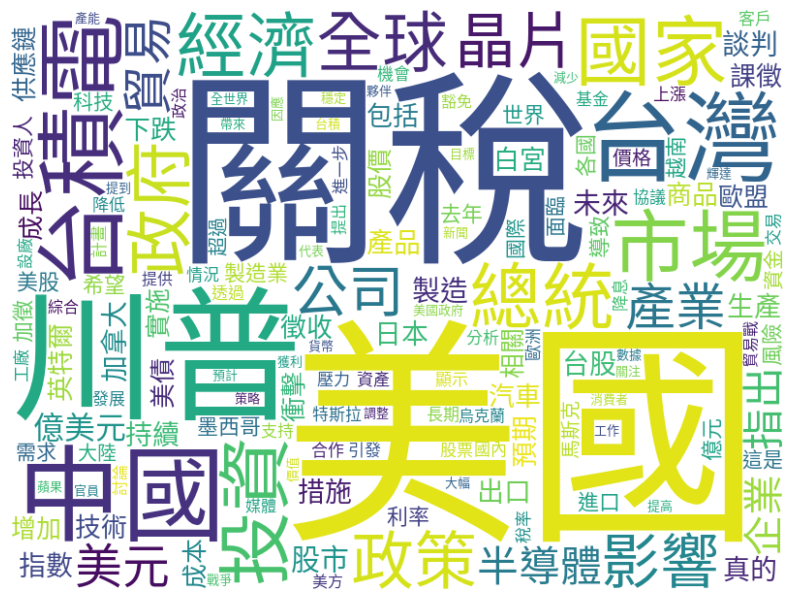

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Áµ±Ë®àÊØèÂÄãË©ûÂá∫ÁèæÁöÑÊ¨°Êï∏
word_freq = data['word'].value_counts().to_dict()

# Áî¢ÁîüÊñáÂ≠óÈõ≤
wc = WordCloud(font_path='./dict/SourceHanSansTW-Regular.otf',  # ÊåáÂÆö‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
               width=800, height=600, 
               background_color='white',
               max_words=150)

wc.generate_from_frequencies(word_freq)

# È°ØÁ§∫ÊñáÂ≠óÈõ≤
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 1.3 ÊâæÂá∫ÈáçË¶ÅË©ûÂΩôÔºà‰ª• TF-IDF ÁÇ∫‰æãÔºâ

#### 1.3.1 ‰ΩøÁî®ÂÖ¨Âºè

In [9]:
# Ë®àÁÆóÂÄãÊñáÁ´†ÁöÑÁ∏ΩË©ûÂΩôÊï∏
total_words = data.groupby(['system_id'], as_index=False).size().rename(columns={'size': 'total'})
total_words.head()

system_id  total
0          1    294
1          2    132
2          3     42
3          4    113
4          5    151

In [10]:
# Ë®àÁÆóÂêÑÊñáÁ´†ÁöÑÂêÑÂÄãË©ûÂΩôÊï∏
word_count = data.groupby(['system_id', 'word'], as_index = False).size()

word_count.rename(columns={'size': 'count'}, inplace=True)
word_count.sort_values('count', ascending=False).head()

system_id word  count
181784       1746  ÂÑÑÁæéÂÖÉ    104
265771       2681   ÁæéÂúã     92
37556         401   ‰∏≠Âúã     72
192144       1848   ÁæéÂúã     68
328745       3369   ‰∏≠Âúã     58

In [11]:
# Âêà‰Ωµ„ÄåÊØèÂÄãË©ûÂΩôÂú®ÊØèÁØáÊñáÁ´†‰∏≠Âá∫ÁèæÁöÑÊ¨°Êï∏„ÄçËàá„ÄåÊØèÁØáÊñáÁ´†ÁöÑË©ûÊï∏„Äç
data_merged = word_count.merge(total_words, on = 'system_id', how = 'left')
data_merged.head()

system_id word  count  total
0          1   ‰∏äÂ≠£      1    294
1          1   ‰∏äÂ∞á      1    294
2          1   ‰∏äÊº≤      1    294
3          1   ‰∏ãÊó¨      1    294
4          1  ‰∏çÊòéÊúó      1    294

In [12]:
# Ë®àÁÆó tf = Ë©ûÂΩôÂú®Ë©≤Êñá‰ª∂‰∏≠Âá∫ÁèæÊ¨°Êï∏ / Ë©≤Êñá‰ª∂‰∏≠Ë©ûÂΩôÁ∏ΩÊï∏ 
data_tf = data_merged.assign(tf = data_merged["count"] / data_merged["total"])
data_tf.head()

system_id word  count  total        tf
0          1   ‰∏äÂ≠£      1    294  0.003401
1          1   ‰∏äÂ∞á      1    294  0.003401
2          1   ‰∏äÊº≤      1    294  0.003401
3          1   ‰∏ãÊó¨      1    294  0.003401
4          1  ‰∏çÊòéÊúó      1    294  0.003401

In [13]:
# Ë®àÁÆóÊØèÂÄãË©ûÂΩôÂá∫ÁèæÂú®ÂπæÁØáÊñáÁ´†‰∏≠
idf_df = data_merged.groupby(['word'], as_index = False).size()

# Âêà‰ΩµÂà∞‰πãÂâçÁöÑ df ‰∏≠
data_idf = data_tf.merge(idf_df, on = 'word', how = 'left')

data_idf.head()

system_id word  count  total        tf  size
0          1   ‰∏äÂ≠£      1    294  0.003401     7
1          1   ‰∏äÂ∞á      1    294  0.003401    11
2          1   ‰∏äÊº≤      1    294  0.003401   252
3          1   ‰∏ãÊó¨      1    294  0.003401     6
4          1  ‰∏çÊòéÊúó      1    294  0.003401    22

In [14]:
# Ë®àÁÆó idf = log ( Á∏ΩÊñá‰ª∂Êï∏Èáè / ÂåÖÂê´Ë©≤Ë©ûÂΩôÁöÑÊñá‰ª∂Êï∏Èáè ) 
data_tf_idf = data_idf.assign(idf = data_idf["size"].apply(lambda size: math.log( len(total_words) / size, 10 ))).drop(["size"], axis=1)

data_tf_idf.head()

system_id word  count  total        tf       idf
0          1   ‰∏äÂ≠£      1    294  0.003401  2.694856
1          1   ‰∏äÂ∞á      1    294  0.003401  2.498561
2          1   ‰∏äÊº≤      1    294  0.003401  1.138553
3          1   ‰∏ãÊó¨      1    294  0.003401  2.761803
4          1  ‰∏çÊòéÊúó      1    294  0.003401  2.197531

In [15]:
# Ë®àÁÆó tf * idf
data_tf_idf = data_tf_idf.assign(tf_idf = data_tf_idf["tf"] * data_tf_idf["idf"])

data_tf_idf.sort_values('tf_idf', ascending = False).head(10)

system_id word  count  total        tf       idf    tf_idf
124375       1213   ÁÉèÂ∑≤      1      3  0.333333  3.539954  1.179985
124371       1212   ÂâõÂâõ      1      2  0.500000  1.733774  0.866887
99706         989   Âï™Âï™      2      8  0.250000  3.238924  0.809731
251727       2528   ÁèæÂ§ß      1      4  0.250000  3.238924  0.809731
251726       2528   ‰∏äÈöä      1      4  0.250000  3.238924  0.809731
251728       2528   Ë®≠ËÄÖ      1      4  0.250000  3.238924  0.809731
251729       2528  ÈÅ©ÂÖ¨ÊòØ      1      4  0.250000  3.238924  0.809731
315440       3246   ÈõªÊ¢Ø      1      4  0.250000  2.937894  0.734473
330278       3379   Áü≠ÂÇµ      2      7  0.285714  2.426010  0.693146
289414       2987   Êà∞Êûú      4     19  0.210526  3.238924  0.681879

In [16]:
# ÈÅ∏Âá∫ÊØèÂÄãÊñá‰ª∂Ôºåtf-idf ÂÄºÊúÄÂ§ßÁöÑÂâç‰∏âÂÄãË©û
group = data_tf_idf.groupby("system_id").apply(lambda x : x.nlargest(3, "tf_idf"))
group.head(15)

C:\Users\HM-B01\AppData\Local\Temp\ipykernel_12456\48416988.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group = data_tf_idf.groupby("system_id").apply(lambda x : x.nlargest(3, "tf_idf"))


system_id    word  count  total        tf       idf    tf_idf
system_id                                                                   
1         159          1      Èù¢Êùø     22    294  0.074830  2.217735  0.165953
          156          1      ÈõªË¶ñ      9    294  0.030612  1.916705  0.058675
          50           1      Â∞∫ÂØ∏      5    294  0.017007  2.840984  0.048316
2         179          2      ÂÜçÂ∫¶      5    132  0.037879  1.429364  0.054143
          171          2      ‰ªñÂ∞á      3    132  0.022727  1.799591  0.040900
          191          2      ÂúòÁµê      2    132  0.015152  2.261200  0.034261
3         268          3  ‰∏ñÁïåË°õÁîüÁµÑÁπî      2     42  0.047619  3.238924  0.154234
          291          3      ÈÄÄÂá∫      3     42  0.071429  1.916705  0.136907
          281          3      ÁôæÊ¢ù      1     42  0.023810  3.539954  0.084285
4         365          4      Ë™≤Âæµ      6    113  0.053097  0.952243  0.050562
          375          4      ÈÑ∞Âúã      2    113  0.017699  2.284681  0.040437
          354          4     Á¨¨‰∏ÄÂ§©      2    113  0.017699  2.238924  0.039627
5         446          5      Áü≥Ê≤π      6    151  0.039735  1.514648  0.060185
          469          5      ÈñãÊé°      3    151  0.019868  2.238924  0.044482
          473          5     ÈõªÂãïËªä      4    151  0.026490  1.600435  0.042396

#### 1.3.2 ‰ΩøÁî®Â•ó‰ª∂

In [17]:
stock_df = MetaData.copy()
stock_df.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          2  https://www.ptt.cc/bbs/Stock/M.1737419603.A.CC...   
2          3  https://www.ptt.cc/bbs/Stock/M.1737424473.A.6C...   
3          4  https://www.ptt.cc/bbs/Stock/M.1737424798.A.8A...   
4          5  https://www.ptt.cc/bbs/Stock/M.1737426377.A.E7...   

                   artTitle              artDate  \
0   [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
1         [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÊºîË™™ÂçÅÈáçÈªû‰∏ÄÊ¨°ÊéåÊè°  2025-01-21 08:33:20   
2    [Êñ∞ËÅû]Âø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñ  2025-01-21 09:54:30   
3  [Êñ∞ËÅû]Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç  2025-01-21 09:59:56   
4    [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°  2025-01-21 10:26:14   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://udn.com/news/amp/story/1...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπî\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç„ÄÄ2Êúà1Êó•ÁîüÊïà\nhttps://www.ettod...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä© Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π\nhttps://netzero.cna.com...   

                                            sentence  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  
1  ÂéüÊñáÊ®ôÈ°åÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∑®Ë≠Ø‰ªª‰∏≠ÂéüÁ∂úÂêàÂ§ñÈõªÂéüÊñáÂÖßÂÆπÂ∑ùÊôÆÂë®‰∏ÄÁæéÂúãÁ∏ΩÁµ±Â∞±ËÅ∑ÊºîË™™ÊëòÈåÑÂ¶Ç‰∏ãÂ∑ù...  
2  ÂéüÊñáÊ®ôÈ°åÂø´Ë®äÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§ÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπîÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç‰∏òÂäõÈæçÂéüÊñáÂÖßÂÆπÁæéÂúã...  
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ßÂ¢®Ë•øÂì•Ë™≤ÂæµÈóúÁ®ÖÊúàÊó•ÁîüÊïàÊñ∞ËÅûÈõ≤Ë®òËÄÖÂê≥Áæé‰æùÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊó•‰∏≠ÂçàÂÆ£Ë™ìÂ∞±ËÅ∑ÂÜçÂ∫¶ÂÖ•‰∏ªÁôΩÂÆÆÊàê...  
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π‰∏≠Â§ÆÁ§æË®òËÄÖÊûóÂÆèÁø∞ÁæéÂúãÁ¨¨‰ΩçÁ∏ΩÁµ±Â∑ùÊôÆ‰ªäÂ§©ÂÆ£Ë™ìÂ∞±ËÅ∑‰ªñÂú®Â∞±ËÅ∑...

In [18]:
# ‰øùÁïôÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
stock_df = stock_df.loc[:,["system_id", "sentence"]]

# Êñ∑Ë©û„ÄÅÂéªÈô§ÂÅúÁî®Â≠ó
stock_df['word'] = stock_df.sentence.apply(getToken).map(' '.join)

stock_df.head()

system_id                                           sentence  \
0          1  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   
1          2  ÂéüÊñáÊ®ôÈ°åÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∑®Ë≠Ø‰ªª‰∏≠ÂéüÁ∂úÂêàÂ§ñÈõªÂéüÊñáÂÖßÂÆπÂ∑ùÊôÆÂë®‰∏ÄÁæéÂúãÁ∏ΩÁµ±Â∞±ËÅ∑ÊºîË™™ÊëòÈåÑÂ¶Ç‰∏ãÂ∑ù...   
2          3  ÂéüÊñáÊ®ôÈ°åÂø´Ë®äÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§ÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπîÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç‰∏òÂäõÈæçÂéüÊñáÂÖßÂÆπÁæéÂúã...   
3          4  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ßÂ¢®Ë•øÂì•Ë™≤ÂæµÈóúÁ®ÖÊúàÊó•ÁîüÊïàÊñ∞ËÅûÈõ≤Ë®òËÄÖÂê≥Áæé‰æùÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊó•‰∏≠ÂçàÂÆ£Ë™ìÂ∞±ËÅ∑ÂÜçÂ∫¶ÂÖ•‰∏ªÁôΩÂÆÆÊàê...   
4          5  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π‰∏≠Â§ÆÁ§æË®òËÄÖÊûóÂÆèÁø∞ÁæéÂúãÁ¨¨‰ΩçÁ∏ΩÁµ±Â∑ùÊôÆ‰ªäÂ§©ÂÆ£Ë™ìÂ∞±ËÅ∑‰ªñÂú®Â∞±ËÅ∑...   

                                                word  
0  Èù¢Êùø ÂÉπÊèö Ë∂ÖÂ§ß Â∞∫ÂØ∏ ÈúÄÊ±Ç ÊúÄÊó∫ ÈõôËôé ÂêûË£ú‰∏∏ Á∂ìÊøüÊó•Â†± ÊùéÁè£Áëõ Êñ∞Á´π ÈõÜÈÇ¶ ÁßëÊäÄ Êò®Êó• ...  
1  Á∑®Ë≠Ø ‰∏≠Âéü Á∂úÂêà Â§ñÈõª Â∑ùÊôÆ Âë®‰∏Ä ÁæéÂúã Á∏ΩÁµ± Â∞±ËÅ∑ÊºîË™™ ÊëòÈåÑ Â∑ùÊôÆ ‰ªñÂ∞á ÊîπÈù© ÁæéÂúã Ë≤øÊòì...  
2  Âø´Ë®ä Â∑ùÊôÆ Ë°åÊîøÂëΩ‰ª§ ÁæéÂúã ÈÄÄÂá∫ ‰∏ñÁïåË°õÁîüÁµÑÁπî ‰∏òÂäõ ÁæéÂúã Áï∂ÈÅ∏ Á∏ΩÁµ± Â∑ùÊôÆ Âè∞ÁÅ£ ‰ªäÊó• Ê≠£...  
3  Â∑ùÊôÆ Êì¨Â∞ç Âä†ÊãøÂ§ß Â¢®Ë•øÂì• Ë™≤Âæµ ÈóúÁ®Ö ÁîüÊïà Êñ∞ËÅû Âê≥Áæé‰æù ÁæéÂúã Á∏ΩÁµ± Â∑ùÊôÆ ‰∏≠Âçà ÂÆ£Ë™ìÂ∞±ËÅ∑...  
4  Â∑ùÊôÆ Â∞±ËÅ∑ Êí§Èä∑ ÈõªÂãïËªä Ë£úÂä© Â§ßË¶èÊ®° ÈñãÊé° Áü≥Ê≤π ‰∏≠Â§ÆÁ§æ ÊûóÂÆèÁø∞ ÁæéÂúã Á¨¨‰Ωç Á∏ΩÁµ± Â∑ùÊôÆ ...

In [19]:
# Bag of Word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stock_df["word"])
vocabulary = vectorizer.get_feature_names_out()

# ËΩâÊàê dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

‰∏Ä‰∏Ä  ‰∏Ä‰∏Å  ‰∏Ä‰∏ä  ‰∏Ä‰∏ã‰∏Ä‰∏ã  ‰∏Ä‰∏ã‰∏ã  ‰∏Ä‰∏ãÂ≠ê  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ  ‰∏Ä‰∏≠  ‰∏Ä‰∏≤  ...  ÈæêÈõú  ÈæîÊòéÈë´  ÈæîÊòéÈë´Ë¶™  ÈæîÈõ≤‰∏π  \
0      0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
1      0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
2      0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
3      0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
4      0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
...   ..  ..  ..   ...  ...  ...  ...   ...  ..  ..  ...  ..  ...   ...  ...   
3462   0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
3463   0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
3464   0   0   0     0    0    1    0     0   0   0  ...   0    0     0    0   
3465   0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   
3466   0   0   0     0    0    0    0     0   0   0  ...   0    0     0    0   

      ÈæúÂ≠´  ÈæúÂ±±  ÈæúÁ∏Æ  ÈæúËãìËÜè  ÈæúËëó  ÈæúÈΩ°  
0      0   0   0    0   0   0  
1      0   0   0    0   0   0  
2      0   0   0    0   0   0  
3      0   0   0    0   0   0  
4      0   0   0    0   0   0  
...   ..  ..  ..  ...  ..  ..  
3462   0   0   0    0   0   0  
3463   0   0   0    0   0   0  
3464   0   0   0    0   0   0  
3465   0   0   0    0   0   0  
3466   0   0   0    0   0   0  

[3467 rows x 46575 columns]

In [20]:
transformer = TfidfTransformer()  

# Â∞áË©ûÈ†ªÁü©Èô£ X Áµ±Ë®àÊàê TF-IDF ÂÄº
tfidf = transformer.fit_transform(X)  

# ËΩâÊàê dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())
TFIDF_df

‰∏Ä‰∏Ä   ‰∏Ä‰∏Å   ‰∏Ä‰∏ä  ‰∏Ä‰∏ã‰∏Ä‰∏ã  ‰∏Ä‰∏ã‰∏ã       ‰∏Ä‰∏ãÂ≠ê  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ   ‰∏Ä‰∏≠   ‰∏Ä‰∏≤  ...   ÈæêÈõú  ÈæîÊòéÈë´  \
0     0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
4     0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...  ...   ...  ...       ...  ...   ...  ...  ...  ...  ...  ...   
3462  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
3463  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
3464  0.0  0.0  0.0   0.0  0.0  0.061242  0.0   0.0  0.0  0.0  ...  0.0  0.0   
3465  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   
3466  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0  0.0   

      ÈæîÊòéÈë´Ë¶™  ÈæîÈõ≤‰∏π   ÈæúÂ≠´   ÈæúÂ±±   ÈæúÁ∏Æ  ÈæúËãìËÜè   ÈæúËëó   ÈæúÈΩ°  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  
3462   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3463   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3464   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3465   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3466   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3467 rows x 46575 columns]

#### 1.3.3 Ê™¢Ë¶ñÁµêÊûú
##### ÊñπÊ≥ï 1ÔºöÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®ÊâÄÊúâÊñá‰ª∂Ë£°ÁöÑ TF-IDF Âπ≥ÂùáÂÄº

In [21]:
stock_tfidf = TFIDF_df.mean().to_frame().reset_index()
stock_tfidf.columns = ["word", "avg"]

stock_tfidf.sort_values('avg', ascending = False).head(10)

word       avg
33703   ÁæéÂúã  0.065889
43716   ÈóúÁ®Ö  0.057459
15671   Â∑ùÊôÆ  0.048373
1851    ‰∏≠Âúã  0.033687
9583   Âè∞Á©çÈõª  0.031494
9476    Âè∞ÁÅ£  0.030249
11361   ÂúãÂÆ∂  0.018977
23010   Êô∂Áâá  0.018124
19641   ÊäïË≥á  0.017464
16002   Â∏ÇÂ†¥  0.017059

- ÁæéÂúã„ÄÅÈóúÁ®Ö„ÄÅÂ∑ùÊôÆ ‚Üí Ê∂âÂèäÁæéÂúãË≤øÊòìÊîøÁ≠ñÂíåÂ∑ùÊôÆÊîøÂ∫úÁöÑÁ∂ìÊøüÊé™ÊñΩ
- Âè∞Á©çÈõª„ÄÅÊô∂Áâá„ÄÅÊäïË≥á„ÄÅÂ∏ÇÂ†¥ ‚Üí ÊäïË≥á‰∫∫Â∞çÊñºÂ∏ÇÂ†¥ËàáÊîøÁ≠ñÁí∞Â¢ÉÁöÑË®éË´ñÈáçÈªûÔºåÂçäÂ∞éÈ´îÁî¢Ê•≠ÂÖ∑ÊúâÈóúÈçµÂú∞‰Ωç
- ‰∏≠Âúã„ÄÅÂè∞ÁÅ£„ÄÅÂúãÂÆ∂ ‚Üí Ë®éË´ñÂêÑÂúãÂèóÂà∞ÁöÑÂΩ±Èüø

##### ÊñπÊ≥ï 2ÔºöÂèñÊØè‰ªΩÊñá‰ª∂Ë£° TF-IDF ÂÄºÊúÄÂ§ßÁöÑÂâç 10 ÂÄãÂ≠óË©ûÁï∂ÁÇ∫Â∏∏Áî®Â≠óË©ûÔºåÂÜçÂèñÊØè‰∏ÄÂÄãÂ≠óË©ûÂú®Â∏∏Áî®Â≠óË©û‰∏≠Âá∫ÁèæÈ†ªÁéá

In [22]:
toptens = TFIDF_df.copy()
toptens.insert(0, 'doc_id', toptens.index+1)

toptens

doc_id   ‰∏Ä‰∏Ä   ‰∏Ä‰∏Å   ‰∏Ä‰∏ä  ‰∏Ä‰∏ã‰∏Ä‰∏ã  ‰∏Ä‰∏ã‰∏ã       ‰∏Ä‰∏ãÂ≠ê  ‰∏Ä‰∏ãÂºµ  ‰∏Ä‰∏çÂ∞èÂøÉ   ‰∏Ä‰∏≠  ...   ÈæêÈõú  \
0          1  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
1          2  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
2          3  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
3          4  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
4          5  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
...      ...  ...  ...  ...   ...  ...       ...  ...   ...  ...  ...  ...   
3462    3463  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
3463    3464  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
3464    3465  0.0  0.0  0.0   0.0  0.0  0.061242  0.0   0.0  0.0  ...  0.0   
3465    3466  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   
3466    3467  0.0  0.0  0.0   0.0  0.0  0.000000  0.0   0.0  0.0  ...  0.0   

      ÈæîÊòéÈë´  ÈæîÊòéÈë´Ë¶™  ÈæîÈõ≤‰∏π   ÈæúÂ≠´   ÈæúÂ±±   ÈæúÁ∏Æ  ÈæúËãìËÜè   ÈæúËëó   ÈæúÈΩ°  
0     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...   ...  ...  ...  ...  ...  ...  ...  ...  
3462  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3463  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3464  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3465  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3466  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3467 rows x 46576 columns]

In [23]:
toptens = toptens.melt(id_vars = "doc_id", var_name = "word", value_name = 'tfidf')
toptens

doc_id word  tfidf
0               1   ‰∏Ä‰∏Ä    0.0
1               2   ‰∏Ä‰∏Ä    0.0
2               3   ‰∏Ä‰∏Ä    0.0
3               4   ‰∏Ä‰∏Ä    0.0
4               5   ‰∏Ä‰∏Ä    0.0
...           ...  ...    ...
161475520    3463   ÈæúÈΩ°    0.0
161475521    3464   ÈæúÈΩ°    0.0
161475522    3465   ÈæúÈΩ°    0.0
161475523    3466   ÈæúÈΩ°    0.0
161475524    3467   ÈæúÈΩ°    0.0

[161475525 rows x 3 columns]

In [24]:
(
    # ÂæûÊØèÁØáÊñáÁ´†ÊåëÈÅ∏Âá∫ tf-idf ÊúÄÂ§ßÁöÑÂâçÂçÅÂÄãË©û
    toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)
   
    # Ë®àÁÆóÊØèÂÄãË©ûË¢´ÈÅ∏‰∏≠ÁöÑÊ¨°Êï∏
    .groupby(['word'],as_index=False).size()

).sort_values('size', ascending=False).head(10) # ÊéíÂ∫èÁúãÂâçÂçÅÂêç

C:\Users\HM-B01\AppData\Local\Temp\ipykernel_12456\1666784609.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)


word  size
11826   ÁæéÂúã   474
15113   ÈóúÁ®Ö   453
3544   Âè∞Á©çÈõª   272
753     ‰∏≠Âúã   266
3504    Âè∞ÁÅ£   212
5678    Â∑ùÊôÆ   185
8223    Êô∂Áâá   146
11814   ÁæéÂÖÉ   102
7069    ÊäïË≥á   100
11805   ÁæéÂÇµ    91

ÊØîËºÉÂÖ©ÂÄãÊñπÊ≥ïÁµêÊûú‰∏çÂêå‰πãËôï
- ÊñπÊ≥ï‰∫åÂá∫Áèæ‰∫Ü„ÄåÁæéÂÖÉ„ÄçËàá„ÄåÁæéÂÇµ„ÄçÔºåÈ°ØÁ§∫Âú®Ë®±Â§öÊñáÁ´†‰∏≠ÔºåÈÄô‰∫õÈáëËûçÁõ∏ÈóúË©ûÂΩôÂ∏∏Ë¢´Ë¶ñÁÇ∫ÈáçÈªû„ÄÇ
- ÊñπÊ≥ï‰∏Ä‰∏≠ÊéíÂêçÂâçÂçÅÁöÑ„ÄåÂ∏ÇÂ†¥„ÄçËàá„ÄåÂúãÂÆ∂„ÄçÂâáÊú™Âá∫ÁèæÂú®ÊñπÊ≥ï‰∫åÁöÑÂâçÂçÅÂêç‰∏≠ÔºåÈ°ØÁ§∫ÈÄô‰∫õË©ûÂú®Êï¥È´îÊñáÁ´†‰∏≠ÈõñÁÑ∂ÊôÆÈÅçÂá∫ÁèæÔºå‰ΩÜ‰∏ç‰∏ÄÂÆöÂú®ÊØèÁØáÊñáÁ´†‰∏≠ÂÖ∑ÊúâÈ´òÊ¨äÈáç„ÄÇ

### 1.4 ÈÄèÈÅéÁµêÂ∑¥Êñ∑Ë©ûËàá N-gram Âπ´Âä©Âª∫Á´ãÊñ∑Ë©ûÂ≠óÂÖ∏

In [25]:
# Ë®≠ÂÆö ngram Êñ∑Ë©û function
def ngram_getToken(row, n):
    # ÈÄ≤Ë°åÊñ∑Ë©û
    seg_list = jieba.lcut(row)
    # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â∞èÊñº 1 ÁöÑË©ûÂΩô
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]

    # ngram Êñ∑Ë©û
    seg_list = ngrams(seg_list, n)
    seg_list = [" ".join(w) for w in list(seg_list)]
    
    return seg_list

#### Bigram

In [26]:
stock_bigram = MetaData.copy()

stock_bigram["word"] = stock_bigram['sentence'].apply(lambda row: ngram_getToken(row, 2))
stock_bigram = stock_bigram.explode('word')

stock_bigram.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   

                  artTitle              artDate  \
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   

                                            sentence   word  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Èù¢Êùø ÂÉπÊèö  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  ÂÉπÊèö Ë∂ÖÂ§ß  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Ë∂ÖÂ§ß Â∞∫ÂØ∏  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Â∞∫ÂØ∏ ÈúÄÊ±Ç  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  ÈúÄÊ±Ç ÊúÄÊó∫

Áµ±Ë®àÊúÄÂ∏∏Âá∫ÁèæÁöÑ bigram ÁµÑÂêà

In [27]:
# Ë®àÁÆóÊØèÂÄãÁµÑÂêàÂá∫ÁèæÁöÑÊ¨°Êï∏
stock_bigram_count = stock_bigram['word'].value_counts().reset_index()

stock_bigram_count.sort_values('count', ascending=False).head(10)

word  count
0  ÁæéÂúã Á∏ΩÁµ±   1290
1  Â∑ùÊôÆ ÈóúÁ®Ö   1194
2  Á∏ΩÁµ± Â∑ùÊôÆ   1159
3  ÈóúÁ®Ö ÊîøÁ≠ñ    776
4  Â∑ùÊôÆ ÊîøÂ∫ú    632
5  Ë™≤Âæµ ÈóúÁ®Ö    523
6  Âä†Âæµ ÈóúÁ®Ö    505
7  ÁæéÂúã ÈóúÁ®Ö    499
8  ÂæµÊî∂ ÈóúÁ®Ö    491
9  ÁæéÂúã Á∂ìÊøü    315

#### Bigram Ë¶ñË¶∫Âåñ
ÈáùÂ∞çÈáçÊñ∞Êñ∑Ë©ûÂæåÁöÑ bigram Âá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑÂâç 50 Â∞çÈÄ≤Ë°åË¶ñË¶∫ÂåñÔºåËßÄÂØüÊñáÁ´†ÁöÑÈóúÈçµË©ûÂ∞ç

In [28]:
stock_bigram['word'] = stock_bigram['word'].astype(str)

# ‰ΩøÁî® FreqDist ÂèñÂæó bigram Êñ∑Ë©û Ëàá bigram Âá∫ÁèæÈ†ªÁéá
bigramfdist = FreqDist(stock_bigram['word'].apply(lambda x: tuple(x.split(' '))))
bigramfdist.most_common(20)

[(('ÁæéÂúã', 'Á∏ΩÁµ±'), 1290),
 (('Â∑ùÊôÆ', 'ÈóúÁ®Ö'), 1194),
 (('Á∏ΩÁµ±', 'Â∑ùÊôÆ'), 1159),
 (('ÈóúÁ®Ö', 'ÊîøÁ≠ñ'), 776),
 (('Â∑ùÊôÆ', 'ÊîøÂ∫ú'), 632),
 (('Ë™≤Âæµ', 'ÈóúÁ®Ö'), 523),
 (('Âä†Âæµ', 'ÈóúÁ®Ö'), 505),
 (('ÁæéÂúã', 'ÈóúÁ®Ö'), 499),
 (('ÂæµÊî∂', 'ÈóúÁ®Ö'), 491),
 (('ÁæéÂúã', 'Á∂ìÊøü'), 315),
 (('ÈóúÁ®Ö', 'Êé™ÊñΩ'), 308),
 (('ÈóúÁ®Ö', 'Â∑ùÊôÆ'), 306),
 (('ÈóúÁ®Ö', 'ÁæéÂúã'), 285),
 (('‰∏≠Âúã', 'Â§ßÈô∏'), 267),
 (('Âè∞Á©çÈõª', 'ÁæéÂúã'), 245),
 (('ÁæéÂúã', 'Ë£ΩÈÄ†'), 243),
 (('ÁæéÂúã', 'ÊäïË≥á'), 242),
 (('Ë≤øÊòì', 'Â§•‰º¥'), 233),
 (('ÈóúÁ®Ö', 'ÂΩ±Èüø'), 221),
 (('Âä†ÊãøÂ§ß', 'Â¢®Ë•øÂì•'), 220)]

In [29]:
# Âª∫Á´ã bigram Âíå count ÁöÑ dictionary
d = {k:v for k,v in bigramfdist.most_common(50)}

In [30]:
# Create network plot 
G = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v) # nodesÔºöË©ûÂΩôÔºåweightÔºöÁµÑÂêàÂá∫ÁèæÈ†ªÁéá
    
# ÂèñÂæóË™øÊï¥ edge Ê¨äÈáç
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

‰ΩøÁî® adjustText Ëß£Ê±∫ÊñáÂ≠óÈÅÆÊìãÂïèÈ°å `pip install adjustText`

In [31]:
from adjustText import adjust_text

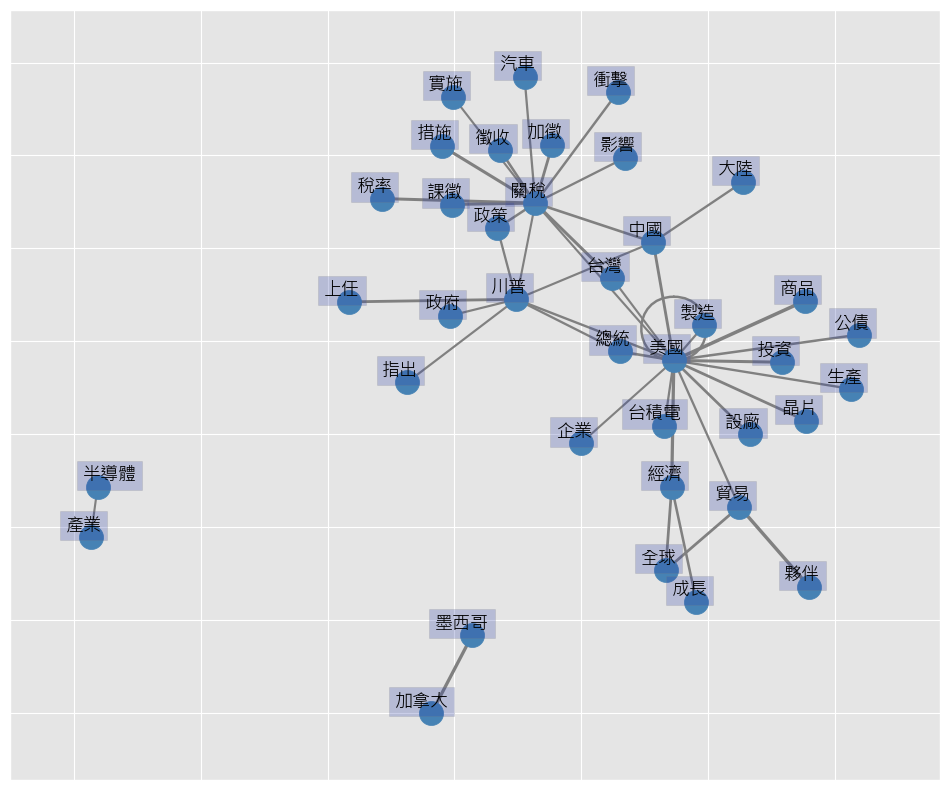

In [105]:
fig, ax = plt.subplots(figsize=(12, 10))
pos = nx.spring_layout(G, k=2, seed=3)

# Áï´Âúñ
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='gray',
                 node_color='#4682B4',
                 with_labels=False,
                 ax=ax)

# labelsÔºö‰ΩøÁî® adjustText ÈÅøÂÖçÈáçÁñä
texts = []
for key, value in pos.items():
    x, y = value[0], value[1]
    texts.append(ax.text(x, y,
                         s=key,
                         bbox=dict(facecolor='#2C3FA7', edgecolor='gray', alpha=0.25),
                         horizontalalignment='center', fontsize=13))

# Ëá™ÂãïË™øÊï¥ÊñáÂ≠ó‰ΩçÁΩÆÔºåÈÅøÂÖçÈáçÁñä
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.show()

- Èô§‰∫ÜË≥áÊñôÈõÜÈóúÈçµÂ≠ó„ÄåÂ∑ùÊôÆ„Äç„ÄÅ„ÄåÁæéÂúã„Äç„ÄåÁ∏ΩÁµ±„ÄçÂ§ñÔºåËÇ°Á•®ÁâàÁöÑË®éË´ñËÅöÁÑ¶Êñº„ÄåÂæµÊî∂„Äç„ÄÅ„ÄåÂä†Âæµ„Äç„ÄåÈóúÁ®Ö„ÄçÁöÑ„ÄåÊîøÁ≠ñ„Äç„ÄÇ
- ÁæéÂúã„ÄÅÁ∂ìÊøü„ÄÅÂÖ®ÁêÉ„ÄÅË≤øÊòì„ÄÅÂ§•‰º¥Á≠âÔºåË°®Á§∫Â∞çÂ∑ùÊôÆÊîøÁ≠ñ‰∏ãÁæéÂúãÁ∂ìÊøüÁãÄÊ≥Å‰ª•ÂèäÂÖ∂ËàáÂÖ∂‰ªñÂúãÂÆ∂Ë≤øÊòìÈóú‰øÇÁöÑÈóúÊ≥®„ÄÇ
- „ÄåÂ¢®Ë•øÂì•„Äç„ÄÅ„ÄåÂä†ÊãøÂ§ß„ÄçÔºåÊòØÂ∑ùÊôÆËá™Âè∞ÁÅ£ÊôÇÈñì 2025/01/21 ‰∏ä‰ªªÂæåÔºåÈóúÁ®ÖÊîøÁ≠ñÁöÑÁ¨¨‰∏ÄÊßçÔºå2025/3/3 ÂÆ£Â∏ÉÂ∞ç‰æÜËá™ÂÖ©ÂúãÁöÑÈÄ≤Âè£ÂïÜÂìÅÂæµÊî∂ 25% ÁöÑÈóúÁ®ÖÔºå‰∏¶Êñº 2025/3/4 ÁîüÊïà„ÄÇ2025/3/6 ÂÆ£Â∏ÉË±ÅÂÖçÈÉ®ÂàÜÂïÜÂìÅÔºà‰∏çÂåÖÊã¨ÊâÄÊúâËÉΩÊ∫êÁî¢ÂìÅÔºâ‰∏ÄÂÄãÊúà„ÄÇ
- „Äå‰∏≠Âúã„Äç„ÄÅ„ÄåÂ§ßÈô∏„Äç„ÄÅ„ÄåÂè∞ÁÅ£„Äç„ÄÅ„ÄåÁæéÂúã„ÄçÔºåË°®Á§∫‰∏≠Áæé„ÄÅÂè∞ÁæéË≤øÊòìÈóú‰øÇ„ÄÅÂú∞Á∑£ÊîøÊ≤ªÁöÑÂΩ±ÈüøÊàêÁÇ∫Ë®éË´ñÁÑ¶Èªû„ÄÇ
- „ÄåÂè∞Á©çÈõª„Äç„ÄÅ„ÄåÂçäÂ∞éÈ´î„Äç„ÄÅ„ÄåÁî¢Ê•≠„Äç„ÄÅ„ÄåÊô∂Áâá„Äç„ÄÅ„ÄåË®≠Âª†„ÄçÔºåÈóúÊ≥®Âè∞Á©çÈõªËµ¥ÁæéË®≠Âª†„ÄÅÂçäÂ∞éÈ´î‰æõÊáâÈèàÈáçÁµÑÂ∞çËÇ°Á•®Â∏ÇÂ†¥ÁöÑÂΩ±Èüø„ÄÇ
- „ÄåÁ∂ìÊøü„Äç„ÄÅ„ÄåÊàêÈï∑„Äç„ÄÅ„ÄåÊäïË≥á„Äç„ÄÅ„Äå‰ºÅÊ•≠„ÄçÔºåÈóúÊ≥®ÁæéÂúãÁ∂ìÊøüÊîøÁ≠ñÂ∞çÊï¥È´îÈáëËûçÂ∏ÇÂ†¥Êàñ‰ºÅÊ•≠ÊäïË≥áË°åÁÇ∫ÁöÑÊé®ÂãïËàáÊäëÂà∂‰ΩúÁî®„ÄÇ

#### Trigram

In [33]:
stock_trigram = MetaData.copy()

stock_trigram["word"] = stock_trigram.sentence.apply(lambda row: ngram_getToken(row, 3))
stock_trigram = stock_trigram.explode('word')

stock_trigram.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   

                  artTitle              artDate  \
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
0  [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   

                                            sentence      word  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Èù¢Êùø ÂÉπÊèö Ë∂ÖÂ§ß  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  ÂÉπÊèö Ë∂ÖÂ§ß Â∞∫ÂØ∏  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Ë∂ÖÂ§ß Â∞∫ÂØ∏ ÈúÄÊ±Ç  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  Â∞∫ÂØ∏ ÈúÄÊ±Ç ÊúÄÊó∫  
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...  ÈúÄÊ±Ç ÊúÄÊó∫ ÈõôËôé

Áµ±Ë®àÊúÄÂ∏∏Âá∫ÁèæÁöÑ trigram ÁµÑÂêà

In [34]:
# Ë®àÁÆóÊØèÂÄãÁµÑÂêàÂá∫ÁèæÁöÑÊ¨°Êï∏
stock_trigram_count = stock_trigram['word'].value_counts().reset_index()

stock_trigram_count.sort_values(['count', 'word'], ascending=False).head(15)

word  count
0      ÁæéÂúã Á∏ΩÁµ± Â∑ùÊôÆ   1107
1      Â∑ùÊôÆ ÈóúÁ®Ö ÊîøÁ≠ñ    269
2      Á∏ΩÁµ± Â∑ùÊôÆ ÈóúÁ®Ö    137
3      ÁæéÂúã ÈóúÁ®Ö ÊîøÁ≠ñ     87
4      Á∂úÂêà ÁæéÂúã Á∏ΩÁµ±     81
5      ÁæéÂúã Ë≤øÊòì ‰ª£Ë°®     75
6      Â∑ùÊôÆ ÊîøÂ∫ú ÈóúÁ®Ö     60
7   Âè∞Á©çÈõª Ëë£‰∫ãÈï∑ È≠èÂì≤ÂÆ∂     58
8      ÂïÜÂìÅ Âä†Âæµ ÈóúÁ®Ö     54
9      ÁæéÂúã Ë≤øÊòì Â§•‰º¥     51
11     Áü•ÊÉÖ ‰∫∫Â£´ ÈÄèÈú≤     49
10     Âè∞ÁÅ£ Ë™≤Âæµ ÈóúÁ®Ö     49
12    Ë≤ªÂüé ÂçäÂ∞éÈ´î ÊåáÊï∏     48
13    ÂúãÂÆ∂ ‰∏ªÂ∏≠ ÁøíËøëÂπ≥     47
14    Âè∞Á©çÈõª ÁæéÂúã ÊäïË≥á     47

- „ÄåÂè∞Á©çÈõª Ëë£‰∫ãÈï∑ È≠èÂì≤ÂÆ∂„Äç„ÄÅ„ÄåÂè∞Á©çÈõª ÁæéÂúã ÊäïË≥á„ÄçÔºåÈ°ØÁ§∫‰ΩøÁî®ËÄÖÈ´òÂ∫¶ÈóúÊ≥®Âè∞ÁÅ£ÂçäÂ∞éÈ´îÁî¢Ê•≠Âú®ÈóúÁ®ÖÊîøÁ≠ñ‰∏ãÁöÑËßíËâ≤ËàáÁôºÂ±ï„ÄÇ
- „ÄåË≤ªÂüé ÂçäÂ∞éÈ´î ÊåáÊï∏„ÄçÔºåÁæéËÇ°‰∏≠Ë°°ÈáèÂçäÂ∞éÈ´îÁî¢Ê•≠ÁöÑÊåáÊï∏ÔºåÈ°ØÁ§∫ËÇ°Á•®Â∏ÇÂ†¥ÈóúÂøÉË©≤Áî¢Ê•≠ËÆäÂåñ„ÄÇ
- „ÄåÁü•ÊÉÖ ‰∫∫Â£´ ÈÄèÈú≤„ÄçÔºåÂ∏∏Ë¶ãÊñºÊñ∞ËÅûÂºïËø∞‰æÜÊ∫êÁöÑÁî®Ë™ûÔºåÂ¢ûÂä†Ê∂àÊÅØ‰æÜÊ∫êÁöÑÊ¨äÂ®ÅÊÄßÊàñÂèØ‰ø°Â∫¶„ÄÇ

Ëß£Ê±∫ÂïèÈ°åÔºöÂéüÂßãÊéíÂ∫èÂÉÖÊ†πÊìö `count` Ê¨Ñ‰ΩçÈÄ≤Ë°åÔºåÁï∂Âá∫ÁèæÁõ∏ÂêåÊ¨°Êï∏ÔºàÂ¶Ç `count = 47`ÔºâÊôÇÔºå`index` ÁöÑÊéíÂàóÈ†ÜÂ∫èËàáÂØ¶ÈöõÂÖßÂÆπÈ†ÜÂ∫è‰∏ç‰∏ÄËá¥„ÄÇ‰æãÂ¶ÇÔºå`index = 14` ÁöÑ„ÄåÂè∞Á©çÈõª ÁæéÂúã ÊäïË≥á„ÄçÊúÉÊéíÂú® `index = 13` ÁöÑ„ÄåÂúãÂÆ∂ ‰∏ªÂ∏≠ ÁøíËøëÂπ≥„Äç‰πãÂâç„ÄÇÁÇ∫‰∫ÜËß£Ê±∫Ê≠§ÊÉÖÊ≥ÅÔºåÂ¢ûÂä†Á¨¨‰∫åÊéíÂ∫èÊ¨Ñ‰Ωç `word`Ôºå‰ª•Á¢∫‰øùÂú® `count` Áõ∏ÂêåÊôÇÔºå‰æùÁÖßË©ûÁµÑÂ≠óÂÖ∏Â∫èÁ©©ÂÆöÊéíÂ∫è„ÄÇ

### 1.5 Pairwise correlation
Ë®àÁÆóÂÖ©ÂÄãË©ûÂΩôÈñìÁöÑÁõ∏ÈóúÊÄß

In [35]:
data_cor = MetaData.copy()

# Êñ∑Ë©û„ÄÅÂéªÈô§ÂÅúÁî®Â≠ó
data_cor['word'] = data_cor.sentence.apply(getToken).map(' '.join)

data_cor.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          2  https://www.ptt.cc/bbs/Stock/M.1737419603.A.CC...   
2          3  https://www.ptt.cc/bbs/Stock/M.1737424473.A.6C...   
3          4  https://www.ptt.cc/bbs/Stock/M.1737424798.A.8A...   
4          5  https://www.ptt.cc/bbs/Stock/M.1737426377.A.E7...   

                   artTitle              artDate  \
0   [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
1         [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÊºîË™™ÂçÅÈáçÈªû‰∏ÄÊ¨°ÊéåÊè°  2025-01-21 08:33:20   
2    [Êñ∞ËÅû]Âø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñ  2025-01-21 09:54:30   
3  [Êñ∞ËÅû]Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç  2025-01-21 09:59:56   
4    [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°  2025-01-21 10:26:14   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://udn.com/news/amp/story/1...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπî\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç„ÄÄ2Êúà1Êó•ÁîüÊïà\nhttps://www.ettod...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä© Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π\nhttps://netzero.cna.com...   

                                            sentence  \
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   
1  ÂéüÊñáÊ®ôÈ°åÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∑®Ë≠Ø‰ªª‰∏≠ÂéüÁ∂úÂêàÂ§ñÈõªÂéüÊñáÂÖßÂÆπÂ∑ùÊôÆÂë®‰∏ÄÁæéÂúãÁ∏ΩÁµ±Â∞±ËÅ∑ÊºîË™™ÊëòÈåÑÂ¶Ç‰∏ãÂ∑ù...   
2  ÂéüÊñáÊ®ôÈ°åÂø´Ë®äÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§ÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπîÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç‰∏òÂäõÈæçÂéüÊñáÂÖßÂÆπÁæéÂúã...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ßÂ¢®Ë•øÂì•Ë™≤ÂæµÈóúÁ®ÖÊúàÊó•ÁîüÊïàÊñ∞ËÅûÈõ≤Ë®òËÄÖÂê≥Áæé‰æùÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊó•‰∏≠ÂçàÂÆ£Ë™ìÂ∞±ËÅ∑ÂÜçÂ∫¶ÂÖ•‰∏ªÁôΩÂÆÆÊàê...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π‰∏≠Â§ÆÁ§æË®òËÄÖÊûóÂÆèÁø∞ÁæéÂúãÁ¨¨‰ΩçÁ∏ΩÁµ±Â∑ùÊôÆ‰ªäÂ§©ÂÆ£Ë™ìÂ∞±ËÅ∑‰ªñÂú®Â∞±ËÅ∑...   

                                                word  
0  Èù¢Êùø ÂÉπÊèö Ë∂ÖÂ§ß Â∞∫ÂØ∏ ÈúÄÊ±Ç ÊúÄÊó∫ ÈõôËôé ÂêûË£ú‰∏∏ Á∂ìÊøüÊó•Â†± ÊùéÁè£Áëõ Êñ∞Á´π ÈõÜÈÇ¶ ÁßëÊäÄ Êò®Êó• ...  
1  Á∑®Ë≠Ø ‰∏≠Âéü Á∂úÂêà Â§ñÈõª Â∑ùÊôÆ Âë®‰∏Ä ÁæéÂúã Á∏ΩÁµ± Â∞±ËÅ∑ÊºîË™™ ÊëòÈåÑ Â∑ùÊôÆ ‰ªñÂ∞á ÊîπÈù© ÁæéÂúã Ë≤øÊòì...  
2  Âø´Ë®ä Â∑ùÊôÆ Ë°åÊîøÂëΩ‰ª§ ÁæéÂúã ÈÄÄÂá∫ ‰∏ñÁïåË°õÁîüÁµÑÁπî ‰∏òÂäõ ÁæéÂúã Áï∂ÈÅ∏ Á∏ΩÁµ± Â∑ùÊôÆ Âè∞ÁÅ£ ‰ªäÊó• Ê≠£...  
3  Â∑ùÊôÆ Êì¨Â∞ç Âä†ÊãøÂ§ß Â¢®Ë•øÂì• Ë™≤Âæµ ÈóúÁ®Ö ÁîüÊïà Êñ∞ËÅû Âê≥Áæé‰æù ÁæéÂúã Á∏ΩÁµ± Â∑ùÊôÆ ‰∏≠Âçà ÂÆ£Ë™ìÂ∞±ËÅ∑...  
4  Â∑ùÊôÆ Â∞±ËÅ∑ Êí§Èä∑ ÈõªÂãïËªä Ë£úÂä© Â§ßË¶èÊ®° ÈñãÊé° Áü≥Ê≤π ‰∏≠Â§ÆÁ§æ ÊûóÂÆèÁø∞ ÁæéÂúã Á¨¨‰Ωç Á∏ΩÁµ± Â∑ùÊôÆ ...

In [36]:
# Bag of WordÔºåÁØ©ÈÅ∏Ëá≥Â∞ëÂá∫ÁèæÂú® 5 ÁØáÊñáÁ´†‰ª•‰∏ä‰∏îË©ûÈ†ªÂâç 300 ÁöÑË©ûÂΩô
vectorizer = CountVectorizer(min_df = 5, max_features = 300)
X = vectorizer.fit_transform(data_cor["word"])
vocabulary = vectorizer.get_feature_names_out()

# ËΩâÊàê dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

‰∏ÄÂ†Ü  ‰∏ä‰ªª  ‰∏äÊº≤  ‰∏ãË∑å  ‰∏ãÈôç  ‰∏çÁ¢∫ÂÆöÊÄß  ‰∏ñÁïå  ‰∏≠Âúã  ‰∏≠ÂøÉ  ‰πãÈñì  ...  È†êÊúü  È†êÊ∏¨  È†êË®à  È†òÂüü  È°ØÁ§∫  È¢®Èö™  \
0      0   0   1   0   0     1   0   3   0   0  ...   3   0   0   0   0   0   
1      0   0   0   0   0     0   1   1   0   0  ...   0   1   0   0   0   0   
2      0   1   0   0   0     0   0   0   0   0  ...   0   0   0   0   0   0   
3      0   1   0   0   0     0   0   2   0   0  ...   0   0   0   0   0   0   
4      0   0   0   0   0     0   0   0   0   0  ...   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..   ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
3462   0   0   0   0   0     0   0   3   0   2  ...   0   0   0   0   0   0   
3463   0   0   0   0   0     0   0   1   0   0  ...   0   0   0   0   0   0   
3464   0   0   0   0   0     0   2   5   0   0  ...   0   0   0   0   1   0   
3465   0   0   0   1   0     0   0   0   0   0  ...   0   0   1   0   1   0   
3466   0   0   0   0   0     0   0   0   0   0  ...   0   0   0   0   0   0   

      È¶¨ÊñØÂÖã  È´òÈÅî  È≠èÂì≤ÂÆ∂  ÈªÉÈáë  
0       0   0    0   0  
1       0   0    0   0  
2       0   0    0   0  
3       0   0    0   0  
4       0   0    0   1  
...   ...  ..  ...  ..  
3462    0   0    0   0  
3463    0   0    0   0  
3464    0   0    0   0  
3465    0   0    0   0  
3466    0   0    0   0  

[3467 rows x 300 columns]

In [37]:
# Ë®àÁÆóË©û‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏
corr_matrix = np.corrcoef(DTM_df.T)

# ËΩâÊàê dataframe
Cor_df = pd.DataFrame(corr_matrix, index = DTM_df.columns, columns = DTM_df.columns)

Cor_df.insert(0, 'word1', Cor_df.columns)
Cor_df.reset_index(inplace = True, drop = True)

Cor_df

word1        ‰∏ÄÂ†Ü        ‰∏ä‰ªª        ‰∏äÊº≤        ‰∏ãË∑å        ‰∏ãÈôç      ‰∏çÁ¢∫ÂÆöÊÄß  \
0      ‰∏ÄÂ†Ü  1.000000  0.006877 -0.033671 -0.040586  0.015110 -0.028444   
1      ‰∏ä‰ªª  0.006877  1.000000  0.047469 -0.018628  0.031661  0.020316   
2      ‰∏äÊº≤ -0.033671  0.047469  1.000000  0.245096  0.064334  0.118884   
3      ‰∏ãË∑å -0.040586 -0.018628  0.245096  1.000000  0.096252  0.135169   
4      ‰∏ãÈôç  0.015110  0.031661  0.064334  0.096252  1.000000  0.096586   
..    ...       ...       ...       ...       ...       ...       ...   
295    È¢®Èö™ -0.012837  0.048508  0.051023  0.166328  0.121297  0.199682   
296   È¶¨ÊñØÂÖã -0.012645  0.102879  0.012953  0.045619  0.029562  0.016137   
297    È´òÈÅî -0.040168  0.059775  0.035946  0.056459  0.017745 -0.006043   
298   È≠èÂì≤ÂÆ∂ -0.024302  0.010834 -0.016160 -0.017957 -0.013539 -0.028200   
299    ÈªÉÈáë -0.009397 -0.007873  0.089000  0.027227  0.011081  0.034181   

           ‰∏ñÁïå        ‰∏≠Âúã        ‰∏≠ÂøÉ  ...        È†êÊúü        È†êÊ∏¨        È†êË®à  \
0    0.037125  0.002569 -0.022312  ... -0.047952 -0.015546 -0.055965   
1    0.030718  0.032446  0.024844  ...  0.037760 -0.015007  0.033419   
2    0.020396  0.025663  0.000723  ...  0.124644  0.103395  0.104626   
3   -0.027228  0.003077 -0.002357  ...  0.105846  0.064249  0.020278   
4    0.000619  0.107296 -0.009047  ...  0.121392  0.054547  0.059917   
..        ...       ...       ...  ...       ...       ...       ...   
295  0.063828  0.055506  0.029548  ...  0.143911  0.106161  0.055354   
296  0.009630  0.006269 -0.008564  ... -0.003007 -0.008326 -0.004406   
297 -0.008609  0.090206  0.037260  ...  0.038879  0.049403  0.057152   
298  0.011104 -0.035812  0.194585  ...  0.000252 -0.015893  0.035008   
299  0.024121 -0.008574 -0.014764  ...  0.049675  0.046840  0.013080   

           È†òÂüü        È°ØÁ§∫        È¢®Èö™       È¶¨ÊñØÂÖã        È´òÈÅî       È≠èÂì≤ÂÆ∂        ÈªÉÈáë  
0   -0.014745 -0.049427 -0.012837 -0.012645 -0.040168 -0.024302 -0.009397  
1   -0.004829  0.099362  0.048508  0.102879  0.059775  0.010834 -0.007873  
2    0.038206  0.154633  0.051023  0.012953  0.035946 -0.016160  0.089000  
3   -0.000052  0.188173  0.166328  0.045619  0.056459 -0.017957  0.027227  
4    0.020800  0.164352  0.121297  0.029562  0.017745 -0.013539  0.011081  
..        ...       ...       ...       ...       ...       ...       ...  
295  0.056771  0.174266  1.000000 -0.014286  0.032095 -0.003941  0.045426  
296  0.053277  0.035154 -0.014286  1.000000  0.033978 -0.018514 -0.008319  
297  0.013201  0.093239  0.032095  0.033978  1.000000  0.027604 -0.006882  
298  0.009696  0.003652 -0.003941 -0.018514  0.027604  1.000000 -0.010641  
299 -0.008069  0.000218  0.045426 -0.008319 -0.006882 -0.010641  1.000000  

[300 rows x 301 columns]

In [38]:
word_cor_df = Cor_df.melt(id_vars = 'word1', var_name = 'word2', value_name = 'cor')

# ÂéªÈô§ÂÖ©ÂÄãË©ûÁõ∏ÂêåÁöÑÊÉÖÊ≥Å
word_cor_df = word_cor_df[word_cor_df["word1"] != word_cor_df["word2"]]

word_cor_df.sort_values('cor', ascending=False).head(10)

word1 word2       cor
8814     ÊàêÈï∑   ÂÑÑÁæéÂÖÉ  0.640045
34229   ÂÑÑÁæéÂÖÉ    ÊàêÈï∑  0.640045
10242    Âà©Áéá    ÂÖ¨ÂÇµ  0.607598
12634    ÂÖ¨ÂÇµ    Âà©Áéá  0.607598
8704     ‰∏ãÈôç   ÂÑÑÁæéÂÖÉ  0.587241
1229    ÂÑÑÁæéÂÖÉ    ‰∏ãÈôç  0.587241
34204    ‰∏ãÈôç    ÊàêÈï∑  0.572128
1314     ÊàêÈï∑    ‰∏ãÈôç  0.572128
88977   ÁâπÊñØÊãâ   È¶¨ÊñØÂÖã  0.554596
53396   È¶¨ÊñØÂÖã   ÁâπÊñØÊãâ  0.554596

#### Âíå„ÄåÁâπÊñØÊãâ„Äç„ÄÅ„ÄåÂè∞Á©çÈõª„ÄçÁõ∏ÈóúÊÄßÊúÄÈ´òÁöÑ 10 ÂÄãË©ûÂΩô

In [39]:
tesla_sum = word_cor_df[(word_cor_df["word1"] == "ÁâπÊñØÊãâ")].sort_values(by = ['cor'], ascending = False).head(10)
tsmc_sum = word_cor_df[(word_cor_df["word1"] == "Âè∞Á©çÈõª")].sort_values(by = ['cor'], ascending = False).head(10)

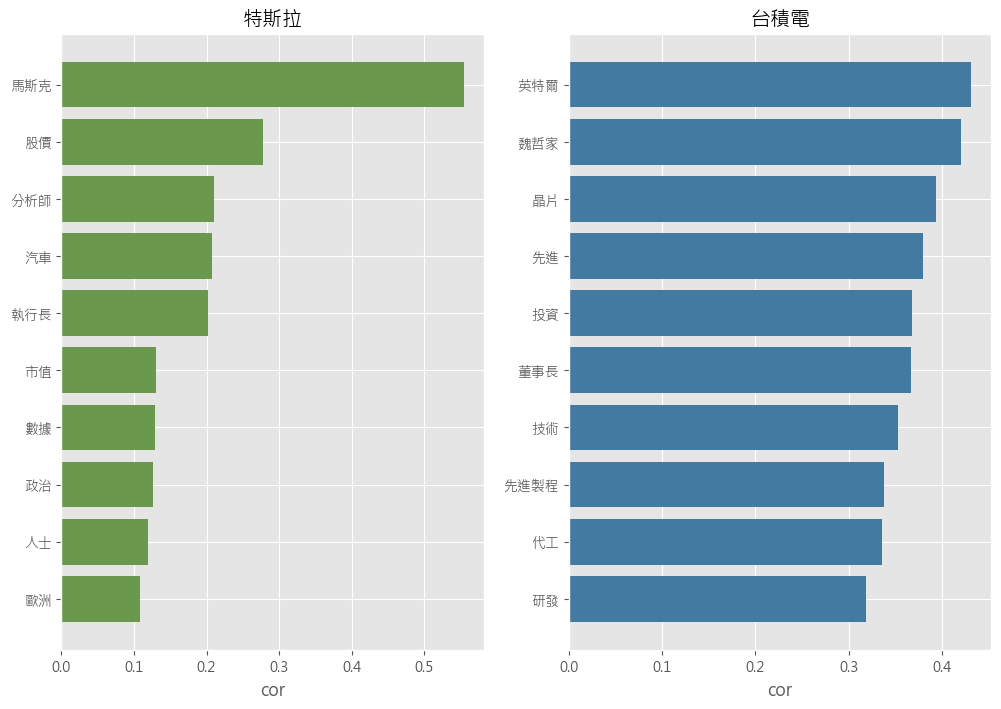

In [40]:
plt.figure(figsize=(12,8))

# ‰ΩøÁî® ggplot ‰∏ªÈ°åÊ®£Âºè
plt.style.use("ggplot")

plt.subplot(121)
plt.title('ÁâπÊñØÊãâ')
plt.xlabel('cor')
plt.barh(tesla_sum['word2'],tesla_sum['cor'],color="#6a994e")
plt.gca().invert_yaxis()

plt.subplot(122)
plt.title('Âè∞Á©çÈõª')
plt.xlabel('cor')
plt.barh(tsmc_sum['word2'],tsmc_sum['cor'],color="#427aa1")
plt.gca().invert_yaxis()

plt.show()

ÁâπÊñØÊãâÁöÑÈóúÈçµË©ûËÅöÁÑ¶Âú®‰∫∫Áâ©ÔºàÈ¶¨ÊñØÂÖãÔºâ„ÄÅÂ∏ÇÂ†¥ÂèçÊáâÔºàËÇ°ÂÉπÔºâËàáÂ§ñÈÉ®Áí∞Â¢ÉÔºàÊîøÊ≤ªÔºâ‰∏ä„ÄÇ
- È¶¨ÊñØÂÖã„ÄÅÂü∑Ë°åÈï∑ÔºöÈ°ØÁ§∫È¶¨ÊñØÂÖã‰ΩúÁÇ∫ÁâπÊñØÊãâÈùàÈ≠Ç‰∫∫Áâ©ÔºåËàáÂÖ¨Âè∏È´òÂ∫¶Á∂ÅÂÆö„ÄÇ
- ËÇ°ÂÉπ„ÄÅÂ∏ÇÂÄº„ÄÅÂàÜÊûêÂ∏´„ÄÅÊï∏ÊìöÔºöÂëàÁèæÊäïË≥áÂ∏ÇÂ†¥Â∞çÁâπÊñØÊãâÁöÑÈ´òÂ∫¶ÈóúÊ≥®„ÄÇ
- Ê±ΩËªäÔºöÊú¨Ê•≠ÈóúËÅØÔºåÂº∑Ë™øÁâπÊñØÊãâ‰ΩúÁÇ∫ÈõªÂãïËªäË£ΩÈÄ†ÂïÜÁöÑËßíËâ≤„ÄÇ
- ÊîøÊ≤ª„ÄÅ‰∫∫Â£´„ÄÅÊ≠êÊ¥≤ÔºöÂèØËÉΩÂèçÊò†ÂúãÈöõÊîøÁ≠ñ„ÄÅÊ≠êÊ¥≤Â∏ÇÂ†¥ÁöÑÂΩ±ÈüøËàáË®éË´ñÁÜ±Â∫¶„ÄÇ

Âè∞Á©çÈõªÁöÑÈóúËÅØË©ûÈõÜ‰∏≠Âú®Ë£ΩÁ®ãÊäÄË°ì„ÄÅÁ†îÁôºËÉΩÂäõËàáÁî¢Ê•≠Âú∞‰Ωç‰∏äÔºåÈ°ØÁ§∫ÂÆÉÂú®ÂçäÂ∞éÈ´îÈ†òÂüüÁöÑÊ†∏ÂøÉËßíËâ≤„ÄÇ
- Ëã±ÁâπÁàæ„ÄÅ‰ª£Â∑•ÔºöÂèçÊò†Âè∞Á©çÈõªËàáÂÖ®ÁêÉÊô∂ÁâáÂ§ßÂª†ÁöÑÂêà‰ΩúÊàñÁ´∂Áà≠Èóú‰øÇ„ÄÇ
- È≠èÂì≤ÂÆ∂„ÄÅËë£‰∫ãÈï∑Ôºö‰∫∫Áâ©‰ª£Ë°®ÔºåÈ°ØÁ§∫È†òÂ∞éÂ±§Âú®Áî¢Ê•≠Ë®éË´ñ‰∏≠ÁöÑÂèØË¶ãÂ∫¶„ÄÇ
- Êô∂Áâá„ÄÅÂÖàÈÄ≤„ÄÅÂÖàÈÄ≤Ë£ΩÁ®ã„ÄÅÁ†îÁôº„ÄÅÊäÄË°ìÔºöÂº∑Ë™øÂè∞Á©çÈõªÁöÑÊäÄË°ìÂØ¶ÂäõËàáÂâµÊñ∞ËÉΩÂäõ„ÄÇ
- ÊäïË≥áÔºöÂèØËÉΩÈóúËÅØË≥áÊú¨ÊîØÂá∫„ÄÅÊµ∑Â§ñË®≠Âª†ÔºàÂ¶ÇÁæéÂúã„ÄÅ‰∫ûÂà©Ê°ëÈÇ£ÔºâÁöÑË≠∞È°å„ÄÇ

#### ‰ΩøÁî®Ë©ûÂΩôÈóú‰øÇÂúñÁï´Âá∫‰ª•Ë©ûÈ†ªÂâç 50 ÁÇ∫ÁØÄÈªû‰∏îÁõ∏ÈóúÊÄßÈ´òÊñº 0.3 ÁöÑÁµÑÂêà

In [41]:
# ÈÄèÈÅé DTM ÊâæÂá∫Ë©ûÈ†ªÂâç 50 È´òÁöÑË©ûÂΩô
most_freq_df = DTM_df.sum().sort_values(ascending=False).head(50).reset_index().rename(columns={'index':'word', 0:'count'})

most_freq_word = most_freq_df['word'].tolist()

In [42]:
# ‰øùÁïôÂ≠òÂú®Ë©ûÈ†ªÂâç 50 È´ò‰πãË©ûÂΩôÁöÑÁµÑÂêà
filtered_df = word_cor_df[(word_cor_df['word1'].isin(most_freq_word)) & (word_cor_df['word2'].isin(most_freq_word))]

# ÁØ©ÈÅ∏Âá∫Áõ∏Èóú‰øÇÊï∏Â§ßÊñº 0.3 ÁöÑÁµÑÂêà
filtered_df = filtered_df[filtered_df['cor'] > 0.3]
filtered_df.reset_index(inplace=True, drop=True)
filtered_df

word1 word2       cor
0     ÊåáÊï∏    ‰∏ãË∑å  0.379070
1     Âá∫Âè£    ‰∏≠Âúã  0.304994
2     ÁæéÂúã    ‰∏≠Âúã  0.317112
3     ÂÖ®ÁêÉ   ‰æõÊáâÈèà  0.306073
4    ÂçäÂ∞éÈ´î   ‰æõÊáâÈèà  0.362371
..   ...   ...       ...
95    ÊîøÁ≠ñ    ÈóúÁ®Ö  0.331271
96    Áî¢ÂìÅ    ÈóúÁ®Ö  0.346581
97    ÁæéÂúã    ÈóúÁ®Ö  0.506168
98    Ë™≤Âæµ    ÈóúÁ®Ö  0.462989
99    Ë≤øÊòì    ÈóúÁ®Ö  0.444133

[100 rows x 3 columns]

In [43]:
# Create network plot 
g = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for i in range(len(filtered_df)):
    g.add_edge(filtered_df["word1"][i], filtered_df["word2"][i], weight=filtered_df["cor"][i])
    
# ÂèñÂæó edge Ê¨äÈáç
weights = [w[2]['weight']*5 for w in  g.edges(data=True)]

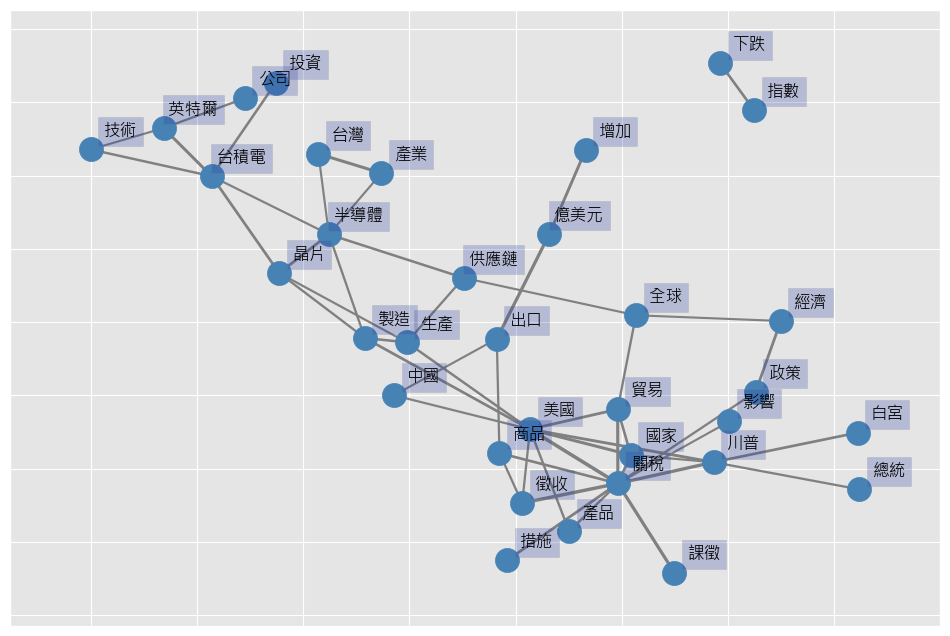

In [44]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

pos = nx.spring_layout(g, k=0.3)

# networks
nx.draw_networkx(g, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='#4682B4',
                 with_labels = False,
                 ax=ax)

# Â¢ûÂä† labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='#2C3FA7', edgecolor='gray', alpha=0.25),
            horizontalalignment='center', fontsize=12)

plt.show()

- ÁæéÂúã„ÄÅÂè∞ÁÅ£„ÄÅÁôΩÂÆÆ„ÄÅÂ∑ùÊôÆ„ÄÅ‰∏≠Âúã„ÄÅÁ∏ΩÁµ±ÔºåÈ°ØÁ§∫Âá∫ÈÄô‰∫õË©ûÂΩôÂèØËÉΩËàáÂúãÈöõË≤øÊòì„ÄÅÂ§ñ‰∫§ÊîøÁ≠ñÂíåÊîøÊ≤ªÂãïÊÖãÊúâÈóú„ÄÇ
- ÈóúÁ®Ö„ÄÅÊé™ÊñΩ„ÄÅÊîøÁ≠ñ„ÄÅÂæµÊî∂„ÄÅË™≤ÂæµÔºåÂº∑Ë™ø‰∫ÜË≤øÊòìÊîøÁ≠ñËàáÁ®ÖÊî∂ÁöÑÈóúËÅØÔºåÁâπÂà•ÊòØÂú®ÂúãÈöõË≤øÊòì‰∏≠ÂèØËÉΩÂá∫ÁèæÁöÑÂà∂Ë£ÅÂíåÁ∂ìÊøüÂà∂Á¥Ñ„ÄÇ
- ÂçäÂ∞éÈ´î„ÄÅÊô∂Áâá„ÄÅË£ΩÈÄ†„ÄÅÊäÄË°ì„ÄÅÁîüÁî¢„ÄÅÁî¢Ê•≠„ÄÅÂÖ¨Âè∏„ÄÅÊäïË≥á„ÄÅÂïÜÂìÅ„ÄÅ ‰æõÊáâÈèàÔºåÈ°ØÁ§∫Âá∫ÈóúÊ≥®ÂçäÂ∞éÈ´îÁî¢Ê•≠„ÄÅÁßëÊäÄÂÖ¨Âè∏ÁöÑÁôºÂ±ï„ÄÅ‰ª•ÂèäÁõ∏ÈóúÊäÄË°ìÁöÑÊàêÈï∑„ÄÇ
- Âè∞Á©çÈõª„ÄÅËã±ÁâπÁàæÔºåÁâπÂà•ÊèêÂà∞ÁßëÊäÄÂ∑®È†≠ÔºåÊöóÁ§∫‰∫ÜÈóúÊñºÊô∂Áâá„ÄÅÂçäÂ∞éÈ´îÈ†òÂüüÁöÑÁ´∂Áà≠ÂíåÊäÄË°ìÁôºÂ±ï„ÄÇ
- Á∂ìÊøü„ÄÅÂÖ®ÁêÉ„ÄÅÊåáÊï∏„ÄÅ‰∏ãË∑å„ÄÅÂΩ±ÈüøÔºåË°®ÊòéÊ∂âÂèäÂà∞ÂÖ®ÁêÉÁ∂ìÊøüÂΩ¢Âã¢ÁöÑËÆäÂãïÔºåÁâπÂà•ÊòØÂ∏ÇÂ†¥ÊåáÊï∏ÂíåÁ∂ìÊøü‰∏ãË°åÂ£ìÂäõ„ÄÇ
- ÂÑÑÁæéÂÖÉ„ÄÅÂ¢ûÂä†ÔºåË®éË´ñÈóúÁ®ÖÂà∂Â∫¶‰∏ãÔºåÂêÑÂúãÂæµÊî∂ÁöÑÊØî‰æãÂèäÈÄ≤Âá∫Âè£Ë≤øÊòìÈÄÜÂ∑ÆÁöÑÁõ∏ÈóúÊÉÖÂΩ¢„ÄÇ

### 1.6 Ë®àÁÆóÊñáÁ´†Áõ∏‰ººÂ∫¶

In [45]:
data_cos = data_cor.copy()
data_cos.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...   
1          2  https://www.ptt.cc/bbs/Stock/M.1737419603.A.CC...   
2          3  https://www.ptt.cc/bbs/Stock/M.1737424473.A.6C...   
3          4  https://www.ptt.cc/bbs/Stock/M.1737424798.A.8A...   
4          5  https://www.ptt.cc/bbs/Stock/M.1737426377.A.E7...   

                   artTitle              artDate  \
0   [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏  2025-01-21 08:05:43   
1         [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÊºîË™™ÂçÅÈáçÈªû‰∏ÄÊ¨°ÊéåÊè°  2025-01-21 08:33:20   
2    [Êñ∞ËÅû]Âø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñ  2025-01-21 09:54:30   
3  [Êñ∞ËÅû]Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç  2025-01-21 09:59:56   
4    [Êñ∞ËÅû]Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°  2025-01-21 10:26:14   

                                          artContent  \
0  ÂéüÊñáÊ®ôÈ°åÔºö\nTV Èù¢ÊùøÂÉπÊèö Ë∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ ÈõôËôéÂêûË£ú‰∏∏\n\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps:...   
1  ÂéüÊñáÊ®ôÈ°åÔºö\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://udn.com/news/amp/story/1...   
2  ÂéüÊñáÊ®ôÈ°åÔºö\n\nÂø´Ë®äÔºèÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§„ÄÄÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπî\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ß„ÄÅÂ¢®Ë•øÂì•„ÄåË™≤Âæµ25%ÈóúÁ®Ö„Äç„ÄÄ2Êúà1Êó•ÁîüÊïà\nhttps://www.ettod...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä© Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π\nhttps://netzero.cna.com...   

                                            sentence  \
0  ÂéüÊñáÊ®ôÈ°åÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏ÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∂ìÊøüÊó•Â†±Ë®òËÄÖÊùéÁè£ÁëõÊñ∞Á´πÂ†±Â∞é...   
1  ÂéüÊñáÊ®ôÈ°åÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤ÂêçÁ∑®Ë≠Ø‰ªª‰∏≠ÂéüÁ∂úÂêàÂ§ñÈõªÂéüÊñáÂÖßÂÆπÂ∑ùÊôÆÂë®‰∏ÄÁæéÂúãÁ∏ΩÁµ±Â∞±ËÅ∑ÊºîË™™ÊëòÈåÑÂ¶Ç‰∏ãÂ∑ù...   
2  ÂéüÊñáÊ®ôÈ°åÂø´Ë®äÂ∑ùÊôÆÁ∞ΩË°åÊîøÂëΩ‰ª§ÂÆ£Â∏ÉÁæéÂúãÈÄÄÂá∫‰∏ñÁïåË°õÁîüÁµÑÁπîÂéüÊñáÈÄ£ÁµêÁôºÂ∏ÉÊôÇÈñìË®òËÄÖÁΩ≤Âêç‰∏òÂäõÈæçÂéüÊñáÂÖßÂÆπÁæéÂúã...   
3  Â∑ùÊôÆÊì¨Â∞çÂä†ÊãøÂ§ßÂ¢®Ë•øÂì•Ë™≤ÂæµÈóúÁ®ÖÊúàÊó•ÁîüÊïàÊñ∞ËÅûÈõ≤Ë®òËÄÖÂê≥Áæé‰æùÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊó•‰∏≠ÂçàÂÆ£Ë™ìÂ∞±ËÅ∑ÂÜçÂ∫¶ÂÖ•‰∏ªÁôΩÂÆÆÊàê...   
4  Â∑ùÊôÆÂ∞±ËÅ∑ÂÆ£Â∏ÉÊí§Èä∑ÈõªÂãïËªäË£úÂä©Â§ßË¶èÊ®°ÈñãÊé°Áü≥Ê≤π‰∏≠Â§ÆÁ§æË®òËÄÖÊûóÂÆèÁø∞ÁæéÂúãÁ¨¨‰ΩçÁ∏ΩÁµ±Â∑ùÊôÆ‰ªäÂ§©ÂÆ£Ë™ìÂ∞±ËÅ∑‰ªñÂú®Â∞±ËÅ∑...   

                                                word  
0  Èù¢Êùø ÂÉπÊèö Ë∂ÖÂ§ß Â∞∫ÂØ∏ ÈúÄÊ±Ç ÊúÄÊó∫ ÈõôËôé ÂêûË£ú‰∏∏ Á∂ìÊøüÊó•Â†± ÊùéÁè£Áëõ Êñ∞Á´π ÈõÜÈÇ¶ ÁßëÊäÄ Êò®Êó• ...  
1  Á∑®Ë≠Ø ‰∏≠Âéü Á∂úÂêà Â§ñÈõª Â∑ùÊôÆ Âë®‰∏Ä ÁæéÂúã Á∏ΩÁµ± Â∞±ËÅ∑ÊºîË™™ ÊëòÈåÑ Â∑ùÊôÆ ‰ªñÂ∞á ÊîπÈù© ÁæéÂúã Ë≤øÊòì...  
2  Âø´Ë®ä Â∑ùÊôÆ Ë°åÊîøÂëΩ‰ª§ ÁæéÂúã ÈÄÄÂá∫ ‰∏ñÁïåË°õÁîüÁµÑÁπî ‰∏òÂäõ ÁæéÂúã Áï∂ÈÅ∏ Á∏ΩÁµ± Â∑ùÊôÆ Âè∞ÁÅ£ ‰ªäÊó• Ê≠£...  
3  Â∑ùÊôÆ Êì¨Â∞ç Âä†ÊãøÂ§ß Â¢®Ë•øÂì• Ë™≤Âæµ ÈóúÁ®Ö ÁîüÊïà Êñ∞ËÅû Âê≥Áæé‰æù ÁæéÂúã Á∏ΩÁµ± Â∑ùÊôÆ ‰∏≠Âçà ÂÆ£Ë™ìÂ∞±ËÅ∑...  
4  Â∑ùÊôÆ Â∞±ËÅ∑ Êí§Èä∑ ÈõªÂãïËªä Ë£úÂä© Â§ßË¶èÊ®° ÈñãÊé° Áü≥Ê≤π ‰∏≠Â§ÆÁ§æ ÊûóÂÆèÁø∞ ÁæéÂúã Á¨¨‰Ωç Á∏ΩÁµ± Â∑ùÊôÆ ...

In [46]:
transformer = TfidfTransformer()  
print(transformer) 
# Â∞áË©ûÈ†ªÁü©Èô£ X Áµ±Ë®àÊàê TF-IDF ÂÄº
tfidf = transformer.fit_transform(X)  

# ËΩâÊàê dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())
TFIDF_df

TfidfTransformer()


‰∏ÄÂ†Ü        ‰∏ä‰ªª        ‰∏äÊº≤        ‰∏ãË∑å   ‰∏ãÈôç      ‰∏çÁ¢∫ÂÆöÊÄß        ‰∏ñÁïå        ‰∏≠Âúã  \
0     0.0  0.000000  0.051644  0.000000  0.0  0.052103  0.000000  0.087809   
1     0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.133338  0.088150   
2     0.0  0.379297  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
3     0.0  0.111519  0.000000  0.000000  0.0  0.000000  0.000000  0.120518   
4     0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
...   ...       ...       ...       ...  ...       ...       ...       ...   
3462  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.224331   
3463  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.199370   
3464  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.140848  0.232788   
3465  0.0  0.000000  0.000000  0.095927  0.0  0.000000  0.000000  0.000000   
3466  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

       ‰∏≠ÂøÉ        ‰πãÈñì  ...        È†êÊúü       È†êÊ∏¨        È†êË®à   È†òÂüü        È°ØÁ§∫   È¢®Èö™  \
0     0.0  0.000000  ...  0.131724  0.00000  0.000000  0.0  0.000000  0.0   
1     0.0  0.000000  ...  0.000000  0.16174  0.000000  0.0  0.000000  0.0   
2     0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   
3     0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   
4     0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   
...   ...       ...  ...       ...      ...       ...  ...       ...  ...   
3462  0.0  0.287105  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   
3463  0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   
3464  0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.076532  0.0   
3465  0.0  0.000000  ...  0.000000  0.00000  0.105802  0.0  0.101101  0.0   
3466  0.0  0.000000  ...  0.000000  0.00000  0.000000  0.0  0.000000  0.0   

      È¶¨ÊñØÂÖã   È´òÈÅî  È≠èÂì≤ÂÆ∂        ÈªÉÈáë  
0     0.0  0.0  0.0  0.000000  
1     0.0  0.0  0.0  0.000000  
2     0.0  0.0  0.0  0.000000  
3     0.0  0.0  0.0  0.000000  
4     0.0  0.0  0.0  0.133791  
...   ...  ...  ...       ...  
3462  0.0  0.0  0.0  0.000000  
3463  0.0  0.0  0.0  0.000000  
3464  0.0  0.0  0.0  0.000000  
3465  0.0  0.0  0.0  0.000000  
3466  0.0  0.0  0.0  0.000000  

[3467 rows x 300 columns]

In [47]:
cosine_matrix = cosine_similarity(tfidf.toarray(), tfidf.toarray())

In [48]:
cos_df = pd.DataFrame(cosine_matrix[0], columns = ['cos_similarity'])
cos_df

cos_similarity
0           1.000000
1           0.037527
2           0.020777
3           0.050122
4           0.087444
...              ...
3462        0.038165
3463        0.057867
3464        0.117287
3465        0.165541
3466        0.085128

[3467 rows x 1 columns]

In [49]:
cos_df = cos_df.merge(data_cos, how = 'left', left_index=True, right_index=True)
cos_df.loc[:,["cos_similarity", "artTitle", "artUrl"]].sort_values(by=['cos_similarity'], ascending=False).head(10)

cos_similarity                         artTitle  \
0           1.000000          [Êñ∞ËÅû]TVÈù¢ÊùøÂÉπÊèöË∂ÖÂ§ßÂ∞∫ÂØ∏ÈúÄÊ±ÇÊúÄÊó∫ÈõôËôéÂêûË£ú‰∏∏   
189         0.689754             Re:[ÁàÜÂç¶]Â∑ùÊôÆ2/18Ëµ∑ÂæµÊî∂Êô∂ÁâáÈóúÁ®Ö   
386         0.579162                    [Êñ∞ËÅû]Â§ßÊë©ÊåâËÆöÁæ§Ââµ„ÄÅËÅØË©†   
1471        0.561095                 [Êñ∞ËÅû]Ë®òÊÜ∂È´îËøéÊò•Â§©ÁæéÂÖâÂÆ£Â∏ÉÊº≤ÂÉπ   
1958        0.539998          [Êñ∞ËÅû]ÊÜÇÈ´òÈóúÁ®ÖÂÖàÂõ§Ë≤®ÔºÅ„ÄÄ‰∏âÊòüÈõªÂ≠êÂÇ≥Ë™øÊº≤Ë®òÊÜ∂È´î   
1150        0.536257                    [Êñ∞ËÅû]‰∏≠ÈãºÁõÆÊ®ôÂÉπ30ÂÖÉÔºÅ   
2279        0.536115       Re:[Ë´ãÁõä]Â∑ùÊôÆÊÑèÂúñÊ†πÊú¨‰∏çÂú®Ëß£Ê±∫Á∂ìÊøüËÄåÊòØÂúãÂÇµÊÄéËæ¶?   
2325        0.533993                  Re:[ÂøÉÂæó]ÁæéÂúãÊúÄÁµÇÈÇÑÊòØÊúÉË¥è   
674         0.511400  [Êñ∞ËÅû]TVÈù¢ÊùøÂ†±ÂÉπÈÄÜÂã¢Êº≤‰∏çÂÅúÂÖ®Â∞∫ÂØ∏ÂãÅÊèöÁæ§ÂâµÁõ¥Ë®Ä„ÄåÂ∞çÂè∞Âª†ÊúâÂà©„Äç   
495         0.481570     [Êñ∞ËÅû]ÁæéÂúãÈõûËõãÂÉπÊ†ºÊåÅÁ∫åÈ£ÜÂçáÂÜçÂâµÊ≠∑Âè≤Êñ∞È´ò‰∏¶Êé®ÂçáCPIÊï∏Êìö   

                                                 artUrl  
0     https://www.ptt.cc/bbs/Stock/M.1737417946.A.13...  
189   https://www.ptt.cc/bbs/Stock/M.1738399337.A.6D...  
386   https://www.ptt.cc/bbs/Stock/M.1738888834.A.6C...  
1471  https://www.ptt.cc/bbs/Stock/M.1743040260.A.4E...  
1958  https://www.ptt.cc/bbs/Stock/M.1743789079.A.E0...  
1150  https://www.ptt.cc/bbs/Stock/M.1741605777.A.6D...  
2279  https://www.ptt.cc/bbs/Stock/M.1743994854.A.15...  
2325  https://www.ptt.cc/bbs/Stock/M.1744007008.A.B7...  
674   https://www.ptt.cc/bbs/Stock/M.1739920007.A.0C...  
495   https://www.ptt.cc/bbs/Stock/M.1739438788.A.BF...

### 1.7 Âª∫Á´ã Ngram È†êÊ∏¨Ê®°Âûã

In [50]:
predict = MetaData.copy()
sen_tokens = predict.sentence.apply(getToken).tolist()

In [51]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        # Âä†‰∏äÈñãÈ†≠ÂíåÁµêÂ∞æ tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # Ë®àÁÆóÂàÜÂ≠ê
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # Ë®àÁÆóÂàÜÊØç
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]
        
    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)
    
    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})
            
        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)
        
    return ngram_prediction

In [52]:
# Bigram È†êÊ∏¨Ê®°ÂûãÁÇ∫‰æã
bi_prediction = ngram(sen_tokens, N=2)

In [53]:
text = 'Á∏ΩÁµ±'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: Â∑ùÊôÆ, probability: 0.494
next word: Ë≥¥Ê∏ÖÂæ∑, probability: 0.0247
next word: ÊãúÁôª, probability: 0.0162
next word: Êæ§ÂÄ´ÊñØÂü∫, probability: 0.0145
next word: ÈóúÁ®Ö, probability: 0.0132


In [54]:
text = 'ÁæéÂÇµ'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: Â∏ÇÂ†¥, probability: 0.0339
next word: Âà©ÊÅØ, probability: 0.031
next word: ÊããÂîÆ, probability: 0.0268
next word: ÈÅïÁ¥Ñ, probability: 0.024
next word: ÁæéÂúã, probability: 0.0212


# 2. Êñá‰ª∂ÂàÜÈ°û

‰∏ªË¶Å‰ΩøÁî®ÊñáÁ´†ËΩâDTM(document term matrix)ÁöÑÊñπÂºèÔºåÂ∞áÊñáÁ´†Áî®‰∏çÂêåÁöÑÂ≠óË©ûÂàÜÂ∏ÉË°®Á§∫ÔºåÂÜçÂà©Áî®pythonÁöÑsklearnÂ•ó‰ª∂ÔºåÂ•óÁî®Ê±∫Á≠ñÊ®π„ÄÅlogistic regressionÁ≠âÊñπÂºèË®ìÁ∑¥Ê®°ÂûãÔºå‰ª•ÂàÜËæ®‰∏çÂêåÁöÑÊñá‰ª∂„ÄÇÊú¨ÁØá Jupyter Notebook Â∞áÂ±ïÁ§∫„Äå‰∏≠Êñá„ÄçÁöÑÊñá‰ª∂ÂàÜÈ°ûÔºå‰ΩøÁî®ËÅØÂêàÊñ∞ËÅûÁ∂≤ÁöÑÂõõÂÄãÁâàÂà•ÊñáÁ´†ÂÅöÁ§∫ÁØÑÈÄ≤Ë°åÂàÜÈ°ûÂô®Ë®ìÁ∑¥ÂíåË©ï‰º∞ÔºåÊúÄÂæåÂú®Áî®‰ª•Ë®ìÁ∑¥Â•ΩÁöÑÂàÜÈ°ûÂô®Â∞çPTTËÇ°Á•®ÁâàÁöÑÊñáÁ´†ÈÄ≤Ë°åÂàÜÈ°ûÂô®„ÄÇ

**ÂàÜÊûêÁõÆÊ®ô**
+ Ë≥áÊñôÂÖßÂÆπÔºö
    + Ë≥áÊñô‰æÜÊ∫êÔºöËÅØÂêàÊñ∞ËÅûÁ∂≤
    + ÁâàÂà•ÔºöË¶ÅËÅû„ÄÅËÇ°Â∏Ç„ÄÅÁî¢Á∂ì„ÄÅÂÖ®ÁêÉ

* ÂàÜÊûê‰∏ªÈ°åÔºöÂ∞áËÅØÂêàÊñ∞ËÅûÁ∂≤ÂõõÂÄãÁâàÂà•ÁöÑÊñáÁ´†ÂêàËµ∑‰æÜÔºåË®ìÁ∑¥Ê®°ÂûãËÉΩÈ†êÊ∏¨Êñ∞ËÅûÁâàÂà•ÔºåÂÜçÁî®ÂàÜÈ°ûÊ®°ÂûãÈÄ≤Ë°åÊñá‰ª∂ÁöÑÁâàÂà•ÂàÜÈ°û„ÄÇ

### 2.1 ËºâÂÖ•Â•ó‰ª∂

In [55]:
import re
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, KFold
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    RocCurveDisplay
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [56]:
# ‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
# plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] # MacOS
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# ‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫ 
plt.rcParams['axes.unicode_minus'] = False

### 2.2 ÊñáÂ≠óÂâçËôïÁêÜ
`udn3.csv` Ë£°Èù¢ÂåÖÂê´‰∫ÜË¶ÅÂàÜÊûêÁöÑ udn Êñ∞ËÅûË≥áÊñô„ÄÇ
- ÁâàÂà•ÔºöË¶ÅËÅû„ÄÅËÇ°Â∏Ç„ÄÅÁî¢Á∂ì„ÄÅÂÖ®ÁêÉ
- ÊôÇÈñìÁØÑÂúçÔºö2025/02/20 ~ 2025/03/20
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

In [57]:
# ÂåØÂÖ•Ë≥áÊñô
udn = pd.read_csv("raw_data/udn3.csv")
udn.head(3)

system_id                          artTitle              artDate  \
0          1          ÁæéÈÄÄÂ∞áÁ±≤ÁæéÂè∞Âä†Âº∑ËÅØË®ìÂêà‰Ωú ÁôºÊèÆ„Äå2+2=5„ÄçÊà∞Âäõ  2025-02-21 21:58:00   
1          2  ÊàëÂúãÈò≤È†êÁÆóÁõÆÊ®ôÈÅîGDP3%‰ª•‰∏ä ÈªÉ‰ªÅÔºöÂè∞ÁÅ£ÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÊñπÂêëÈåØË™§  2025-02-22 18:51:00   
2          3          ÁæéËªçÂ∞ëÂ∞áÂèÉËàáÊº¢ÂÖâÂÖµÊé®Ôºü Â∞àÂÆ∂ÔºöÊúâÂâç‰æãÂèØÂπ≥Â∏∏ÂøÉÁúãÂæÖ  2025-02-22 19:33:00   

  artCatagory                                    artUrl  \
0          Ë¶ÅËÅû  https://udn.com/news/story/10930/8563859   
1          Ë¶ÅËÅû  https://udn.com/news/story/10930/8565217   
2          Ë¶ÅËÅû  https://udn.com/news/story/10930/8565244   

                                          artContent  artSecondCategory  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫ÔºåÁî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÔºåÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâ...                NaN   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÔºåÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóÔºåËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞GDP3%‰ª•‰∏ä„ÄÇÂúã...                NaN   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÔºåÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâå„ÄÇÂúãÈò≤Èô¢...                NaN   

  dataSource  artSecondCatagory  
0        UDN                NaN  
1        UDN                NaN  
2        UDN                NaN

In [58]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"number of posts: {udn.shape[0]}")
print(f"date range: {(udn['artDate'].min(), udn['artDate'].max())}")
print(f"category: \n{udn['artCatagory'].value_counts()}")

number of posts: 5829
date range: ('2025-02-20 00:13:00', '2025-03-20 23:25:00')
category: 
artCatagory
ÂÖ®ÁêÉ    4194
ËÇ°Â∏Ç     723
Áî¢Á∂ì     648
Ë¶ÅËÅû     264
Name: count, dtype: int64


#### 2.2.1 Êñ∑Âè•
Âà©Áî®ÂïèËôü„ÄÅÂè•ËôüÊàñÈ©öÂòÜËôüÁ≠âÁ¨¶ËôüÊñ∑Âè•ÔºåÊàñÊòØÂ¶ÇÊûúÂá∫Áèæ‰∏≠ÊñáÊàñÊòØËã±ÊñáÁöÑÁúÅÁï•ËôüÔºåÂÉèÊòØ `...` ‰πüÊúÉÊñ∑Âè•ÔºåÊúÄÂæåË®≠ÂÆöÊúÉÂéªÈô§ÁµêÂ∞æÁöÑÁ©∫ÁôΩÁ¨¶Ëôü„ÄÇ

In [59]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢û stopwords
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

In [60]:
# ÈÅéÊøæ nan ÁöÑË≥áÊñô
udn = udn.dropna(subset=['artTitle'])
udn = udn.dropna(subset=['artContent'])
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
 #ËºâÂÖ•ÊàñÂÆöÁæ©ÂÅúÁî®Â≠óÊ∏ÖÂñÆÔºàÂê´ÊâãÂãïÂä†ÁöÑÔºâ
stopwords_manual = ["Â∑ùÊôÆ"]
stopWords.extend(stopwords_manual)  # Â∞áÊâãÂãïÂä†ÂÖ•ÁöÑË©ûÁ¥çÂÖ•ÂÅúÁî®Â≠ó
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)

udn.head(3)

system_id                   artTitle              artDate artCatagory  \
0          1           ÁæéÈÄÄÂ∞áÁ±≤ÁæéÂè∞Âä†Âº∑ËÅØË®ìÂêà‰ΩúÁôºÊèÆÊà∞Âäõ  2025-02-21 21:58:00          Ë¶ÅËÅû   
1          2  ÊàëÂúãÈò≤È†êÁÆóÁõÆÊ®ôÈÅî‰ª•‰∏äÈªÉ‰ªÅÂè∞ÁÅ£ÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÊñπÂêëÈåØË™§  2025-02-22 18:51:00          Ë¶ÅËÅû   
2          3      ÁæéËªçÂ∞ëÂ∞áÂèÉËàáÊº¢ÂÖâÂÖµÊé®Â∞àÂÆ∂ÊúâÂâç‰æãÂèØÂπ≥Â∏∏ÂøÉÁúãÂæÖ  2025-02-22 19:33:00          Ë¶ÅËÅû   

                                     artUrl  \
0  https://udn.com/news/story/10930/8563859   
1  https://udn.com/news/story/10930/8565217   
2  https://udn.com/news/story/10930/8565244   

                                          artContent  artSecondCategory  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâÂ¶ÇÈõô...                NaN   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞‰ª•‰∏äÂúãÊ∞ëÈª®Á´ãÂßîÈªÉ‰ªÅ‰ªäÂ§©...                NaN   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâåÂúãÈò≤Èô¢Êà∞Áï•...                NaN   

  dataSource  artSecondCatagory  
0        UDN                NaN  
1        UDN                NaN  
2        UDN                NaN

ÊñáÁ´†ÁöÑÊ®ôÈ°å `artTitle` ÂíåÂÖßÊñá `sentence` ÈÉΩÊúÉÁ¥çÂÖ•ÂàÜÊûêÁöÑÂÖßÂÆπÔºåÊàêÁÇ∫Êñ∞ÁöÑ `content` Ê¨Ñ‰Ωç„ÄÇ

In [61]:
# Áïô‰∏ã content
udn["content"] = udn["artTitle"] + udn["artContent"]
udn = udn[["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head()

content  \
0  ÁæéÈÄÄÂ∞áÁ±≤ÁæéÂè∞Âä†Âº∑ËÅØË®ìÂêà‰ΩúÁôºÊèÆÊà∞ÂäõÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥...   
1  ÊàëÂúãÈò≤È†êÁÆóÁõÆÊ®ôÈÅî‰ª•‰∏äÈªÉ‰ªÅÂè∞ÁÅ£ÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÊñπÂêëÈåØË™§Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™...   
2  ÁæéËªçÂ∞ëÂ∞áÂèÉËàáÊº¢ÂÖâÂÖµÊé®Â∞àÂÆ∂ÊúâÂâç‰æãÂèØÂπ≥Â∏∏ÂøÉÁúãÂæÖÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰Ωç...   
3  ÁæéËß£ÂáçÂ∞çÂè∞ËªçÊè¥Â≠∏ËÄÖÂè∞ÁÅ£ÂÆâÂÖ®ÊòØÂ∑ùÊôÆÂ∞ç‰∏≠Êà∞Áï•ÈáçÈªûË∑ØÈÄèÁ§æÂ†±Â∞éÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊîøÂ∫úÈáãÂá∫ÂÖàÂâçÂáçÁµêÁöÑÂÑÑÁæéÂÖÉÂ§ñ...   
4  ÁæéÂ≠∏ËÄÖËªçÊè¥Âè∞ÁÅ£ÊáâË®≠Ê¢ù‰ª∂‰øÉÊèêÈ´òÂúãÈò≤ÊîØÂá∫ËàáÊîπÈù©ÂÖ©ÂêçÁæéÂúãÂ≠∏ËÄÖ‰ªäÂ§©ÁôºË°®Â∞àÊñáÂª∫Ë≠∞ÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÂ∞áÂ∞çÂè∞ÁÅ£ÁöÑ...   

                                     artUrl artCatagory  
0  https://udn.com/news/story/10930/8563859          Ë¶ÅËÅû  
1  https://udn.com/news/story/10930/8565217          Ë¶ÅËÅû  
2  https://udn.com/news/story/10930/8565244          Ë¶ÅËÅû  
3  https://udn.com/news/story/10930/8565329          Ë¶ÅËÅû  
4  https://udn.com/news/story/10930/8571966          Ë¶ÅËÅû

In [62]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"total docs: {udn.shape[0]}")

total docs: 5829


#### 2.2.2 Êñ∑Ë©û
Âà™ÊéâÊ¨°Êï∏Â§™Â∞ëÁöÑ„ÄÅÊ®ôÈªûÁ¨¶Ëôü„ÄÅÂÅúÁî®Â≠ó

In [72]:
# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº 1 ÁöÑË©ûÂΩô
    return seg_list

In [74]:
udn["words"] = udn["content"].apply(getToken).map(" ".join)
udn.head()

content  \
0  ÁæéÈÄÄÂ∞áÁ±≤ÁæéÂè∞Âä†Âº∑ËÅØË®ìÂêà‰ΩúÁôºÊèÆÊà∞ÂäõÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥...   
1  ÊàëÂúãÈò≤È†êÁÆóÁõÆÊ®ôÈÅî‰ª•‰∏äÈªÉ‰ªÅÂè∞ÁÅ£ÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÊñπÂêëÈåØË™§Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™...   
2  ÁæéËªçÂ∞ëÂ∞áÂèÉËàáÊº¢ÂÖâÂÖµÊé®Â∞àÂÆ∂ÊúâÂâç‰æãÂèØÂπ≥Â∏∏ÂøÉÁúãÂæÖÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰Ωç...   
3  ÁæéËß£ÂáçÂ∞çÂè∞ËªçÊè¥Â≠∏ËÄÖÂè∞ÁÅ£ÂÆâÂÖ®ÊòØÂ∑ùÊôÆÂ∞ç‰∏≠Êà∞Áï•ÈáçÈªûË∑ØÈÄèÁ§æÂ†±Â∞éÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊîøÂ∫úÈáãÂá∫ÂÖàÂâçÂáçÁµêÁöÑÂÑÑÁæéÂÖÉÂ§ñ...   
4  ÁæéÂ≠∏ËÄÖËªçÊè¥Âè∞ÁÅ£ÊáâË®≠Ê¢ù‰ª∂‰øÉÊèêÈ´òÂúãÈò≤ÊîØÂá∫ËàáÊîπÈù©ÂÖ©ÂêçÁæéÂúãÂ≠∏ËÄÖ‰ªäÂ§©ÁôºË°®Â∞àÊñáÂª∫Ë≠∞ÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÂ∞áÂ∞çÂè∞ÁÅ£ÁöÑ...   

                                     artUrl artCatagory  \
0  https://udn.com/news/story/10930/8563859          Ë¶ÅËÅû   
1  https://udn.com/news/story/10930/8565217          Ë¶ÅËÅû   
2  https://udn.com/news/story/10930/8565244          Ë¶ÅËÅû   
3  https://udn.com/news/story/10930/8565329          Ë¶ÅËÅû   
4  https://udn.com/news/story/10930/8571966          Ë¶ÅËÅû   

                                               words  
0  ÁæéÈÄÄ Â∞áÁ±≤ ÁæéÂè∞ Âä†Âº∑ ËÅØË®ì Âêà‰Ωú ÁôºÊèÆ Êà∞Âäõ ÁæéÂúã Êµ∑Ëªç ÈÄÄÂΩπ Â∞ëÂ∞á ËíôÂì•È¶¨Âà© ‰ªäÂ§© Ë°®Á§∫...  
1  ÂúãÈò≤ È†êÁÆó ÁõÆÊ®ô ÈÅî‰ª• ‰∏äÈªÉ ‰ªÅÂè∞ÁÅ£ ÂÆâÂÖ® Â§ñ‰∫§ÊîøÁ≠ñ ÊñπÂêë ÈåØË™§ Ë≥¥Ê∏ÖÂæ∑ Á∏ΩÁµ± Êó•Ââç ËàâË°å ...  
2  ÁæéËªç Â∞ëÂ∞á ÂèÉËàá Êº¢ÂÖâ Â∞àÂÆ∂ Ââç‰æã Âπ≥Â∏∏ÂøÉ ÁúãÂæÖ ÂúãÈò≤ÈÉ®Èï∑ È°ßÁ´ã ÈõÑË¶ñ Êº¢ÂÖâ ÊºîÁøí Âúñ‰∏ä Êé®...  
3  Ëß£Âáç Â∞çÂè∞ ËªçÊè¥ Â≠∏ËÄÖ Âè∞ÁÅ£ ÂÆâÂÖ® ÊôÆÂ∞ç Êà∞Áï•ÈáçÈªû Ë∑ØÈÄèÁ§æ Â†±Â∞é ÁæéÂúã Á∏ΩÁµ± ÊîøÂ∫ú ÈáãÂá∫ ÂÖà...  
4  Â≠∏ËÄÖ ËªçÊè¥ Âè∞ÁÅ£ ÊáâË®≠ Ê¢ù‰ª∂ ÊèêÈ´ò ÂúãÈò≤ ÊîØÂá∫ ÊîπÈù© ÂÖ©Âêç ÁæéÂúã Â≠∏ËÄÖ ‰ªäÂ§© ÁôºË°® Â∞àÊñá Âª∫...

#### 2.2.3 Ë≥áÊñôÈõÜÂü∫Êú¨Ê™¢Ë¶ñ

In [75]:
# Ê™¢Ë¶ñË≥áÊñôÂÖßÂÆπ
print(f"total posts: {len(udn['artUrl'].unique())}")
print(f"category: \n{udn['artCatagory'].value_counts()}")

total posts: 5829
category: 
artCatagory
ÂÖ®ÁêÉ    4194
ËÇ°Â∏Ç     723
Áî¢Á∂ì     648
Ë¶ÅËÅû     264
Name: count, dtype: int64


### 2.3 ÂàÜÈ°ûÊ®°ÂûãÁöÑË®ìÁ∑¥ÊµÅÁ®ã
#### 2.3.1 Ê†πÊìö 7:3 ÁöÑÊØî‰æãÂàáÂàÜË≥áÊñôÈõÜ
Âà©Áî® sklearn ‰∏≠ÁöÑ train_test_split ÂáΩÊï∏Â∞á `raw_data` Èö®Ê©üÂàáÊàê 7:3ÔºåË®≠ÁΩÆ random_state ËÆìÊØèÊ¨°ÂàáÂàÜÁöÑÁµêÊûú‰∏ÄËá¥„ÄÇ`y_train` Âíå `y_test` ÂàÜÂà•ÁÇ∫Ë®ìÁ∑¥Ë≥áÊñôÂíåÊ∏¨Ë©¶Ë≥áÊñôÁöÑÈ†êÊ∏¨ÁõÆÊ®ô„ÄÇ

In [76]:
data = udn
X = data["words"]
y = data["artCatagory"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=666
)

print(X_train.head())
print(y_train.head())

1612    ÈñãÁæÖ ÈáçÂïü Ë´áÂà§ ÂïÜË®é ‰ª•Ëâ≤Âàó ÂìàÁë™ÊñØ ÈöéÊÆµ ÂÅúÁÅ´ Âä†Ëñ© Ë°ùÁ™Å ÊúâÊúõ ËêΩÂπï ÂêÑÊñπ ‰ªäÂ§© ÂüÉÂèä...
4081    ÊîøÂ∫ú ÂâäÊ∏õ ÊîØÂá∫ ËÄÉÊÖÆ ÈóúÈñâ ÈÉ®ÂàÜ ÁæéÂúã ÈßêÂ§ñ È†ò‰∫ãÈ§® Êï∏Âêç ÁæéÂúã ÂÆòÂì° ‰ªäÂ§© Ë°®Á§∫ ÁæéÂúãÂúã...
1059    ÈóúÁ®Ö Â∞á‰æÜ Ë•≤Áæé Ë≤øÊòìÈÄÜÂ∑Æ ‰∫ûÂ§™ Á¨¨‰∏âÂè∞ Âç±Èö™ Ë≤øÊòìÈÄÜÂ∑Æ ÁæéÂúã Á∏ΩÁµ± ‰∏ÄÂ§ß Á∂ìÊøü ÁÖ©ÊÉ± ÁæéÂúã...
1622    ËÅØÂêàÂúã ÈáçÈáë ‰øùË≠∑ ÁîüÊÖãÁ≥ª ÂÖ®ÁêÉ Ë∂ÖÈÅé ÂúãÂÆ∂ ÂêåÊÑè Âπ¥Ââç ÊØèÂπ¥ Êí•Âá∫ ÂÑÑÁæéÂÖÉ Áî®Êñº ÈÄÜËΩâ Â§±...
652     ‰ª∞Ë≥¥ ÊòüÈèà Êèê‰æõ Êà∞Â†¥ ÊÉÖÂ†± Êö´ÂÅú ËªçÊè¥ Áõ∏Èóú ÂΩ±Èüø ‰∏ÄÊ¨° ÂÖ©Âêç ÁôΩÂÆÆ ÂÆòÂì° Ë°®Á§∫ ÁæéÂúã Á∏Ω...
Name: words, dtype: object
1612    ÂÖ®ÁêÉ
4081    ÂÖ®ÁêÉ
1059    ÂÖ®ÁêÉ
1622    ÂÖ®ÁêÉ
652     ÂÖ®ÁêÉ
Name: artCatagory, dtype: object


In [77]:
# Áúã‰∏Ä‰∏ãÂêÑÂÄãË≥áÊñôÈõÜÂàáÂàÜÁöÑÊØî‰æãÔºåÊáâË©≤Ë¶Å‰∏ÄËá¥
print(
    f"raw data percentage :\n{data['artCatagory'].value_counts(normalize=True) * 100}"
)
print(f"\ntrain percentage :\n{y_train.value_counts(normalize=True) * 100}")
print(f"\ntest percentage :\n{y_test.value_counts(normalize=True) * 100}")

raw data percentage :
artCatagory
ÂÖ®ÁêÉ    71.950592
ËÇ°Â∏Ç    12.403500
Áî¢Á∂ì    11.116830
Ë¶ÅËÅû     4.529079
Name: proportion, dtype: float64

train percentage :
artCatagory
ÂÖ®ÁêÉ    72.156863
ËÇ°Â∏Ç    11.985294
Áî¢Á∂ì    11.495098
Ë¶ÅËÅû     4.362745
Name: proportion, dtype: float64

test percentage :
artCatagory
ÂÖ®ÁêÉ    71.469411
ËÇ°Â∏Ç    13.379074
Áî¢Á∂ì    10.234420
Ë¶ÅËÅû     4.917095
Name: proportion, dtype: float64


#### 2.3.2 ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
ÁÇ∫ËÆìÊ®°ÂûãË©ï‰º∞ËÉΩÂ§†Êõ¥Á©©ÂÆö cross-validation 

In [78]:
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
## pipeline: Ë≥áÊñôËôïÁêÜ vectorizer + ÂàÜÈ°ûÂô® clf
## Áî±Êñº cross-validation ÊúÉËá™ÂãïÂ∞áË≥áÊñôÂàÜÊàê train/testÔºåÂõ†Ê≠§ input Âè™Ë¶ÅÁµ¶ X, y Âç≥ÂèØ

def train_cv(vectorizer, clf, X, y):

    ## train classifier
    vec_X = vectorizer.fit_transform(X).toarray()
    
    ## get cv results
    cv_results = cross_validate(clf, vec_X, y, cv=5, return_estimator=True)
    y_pred = cross_val_predict(clf, vec_X, y, cv=5)
    y_pred_proba = cross_val_predict(clf, vec_X, y, cv=5, method="predict_proba")
    
    ## Accuracy, Precision, Recall, F1-score
    cls_report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))

    classes = cv_results['estimator'][0].classes_
    
    ## Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title= str(clf) + "Confusion matrix",
    )
    plt.yticks(rotation=0)

    clf.fit(vec_X, y)
    # return the model object
    return cls_report

              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.96      0.99      0.98      2944
          Áî¢Á∂ì       0.86      0.76      0.81       469
          ËÇ°Â∏Ç       0.89      0.90      0.89       489
          Ë¶ÅËÅû       0.84      0.62      0.72       178

    accuracy                           0.94      4080
   macro avg       0.89      0.82      0.85      4080
weighted avg       0.94      0.94      0.94      4080



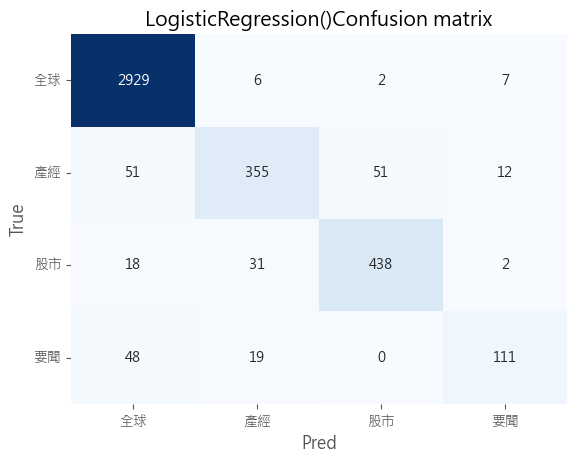

In [79]:
# ÂÖàÁî® LogisticRegressionÔºåÊ∏¨Ë©¶ function ËÉΩ‰∏çËÉΩË∑ë
vectorizer = TfidfVectorizer(max_features=1000)
clf = LogisticRegression()
result = train_cv(vectorizer, clf, X_train, y_train)

 È°ûÂà•‰∏çÂπ≥Ë°°Ôºàclass imbalanceÔºâÂïèÈ°åÔºåÊúÉËÆìÊ®°ÂûãÂ∞ç„ÄåÂ§öÊï∏È°ûÂà•„ÄçÈÅéÂ∫¶ÂÅèÂ•ΩÔºåËÄåÂøΩÁï•‰∫ÜÂ∞ëÊï∏È°ûÂà•Ôºà‰æãÂ¶ÇÈÄôË£°ÁöÑ„ÄåË¶ÅËÅû„ÄçÂíå„ÄåÁî¢Á∂ì„ÄçÔºâ„ÄÇ

 Ë™øÊï¥Ê®£Êú¨Ê¨äÈáç `class_weight='balanced'`ÔºåÊúÉÊ†πÊìöÊ®£Êú¨Êï∏Ëá™ÂãïË™øÊï¥Ôºö

              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.99      0.97      0.98      2944
          Áî¢Á∂ì       0.83      0.81      0.82       469
          ËÇ°Â∏Ç       0.88      0.92      0.90       489
          Ë¶ÅËÅû       0.68      0.88      0.76       178

    accuracy                           0.94      4080
   macro avg       0.85      0.89      0.87      4080
weighted avg       0.95      0.94      0.94      4080



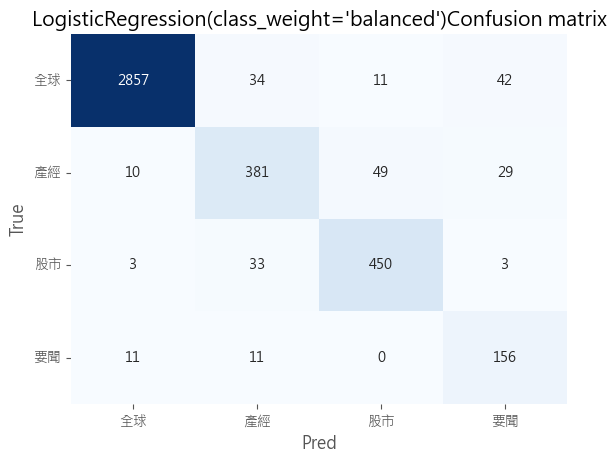

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Âª∫Á´ãÂêëÈáèÂô®ÔºàTF-IDFÔºåÊúÄÂ§ö 1000 ÂÄãË©ûÔºâ
vectorizer = TfidfVectorizer(max_features=1000)

# Âä†ÂÖ• class_weight='balanced' ÁöÑÂàÜÈ°ûÂô®
clf = LogisticRegression(class_weight='balanced')

# ÂëºÂè´‰Ω†ÁöÑ‰∫§ÂèâÈ©óË≠âË®ìÁ∑¥ÂáΩÂºèÔºàÂÅáË®≠‰Ω†Â∑≤Á∂ìÊúâÂÆöÁæ©Â•ΩÁöÑ train_cvÔºâ
result2 = train_cv(vectorizer, clf, X_train, y_train)

Âπ≥Ë°°ÂæåÔºö
Âä†‰∏ä `class_weight='balanced'` ÁöÑÁµêÊûúÔºåÂú®Êï¥È´îÂàÜÈ°ûÊïàÊûú‰∏äÂ∞çÂ∞ëÊï∏È°ûÂà•ÊòéÈ°ØÊØîËºÉÂ•Ω
ÂÉèÊòØ `macro avg` ÊòØÂêÑÈ°ûÂà•Âπ≥ÂùáÔºå‰∏çËÄÉÊÖÆÊ®£Êú¨ÊØî‰æãÔºåÊõ¥ËÉΩÂèçÊò†Â∞ëÊï∏È°ûÂà•ÁöÑÊïàÊûúÔºÅÂπ≥Ë°°ÂæåË°®ÁèæÊõ¥Â•Ω

Âú®Áî¢Á∂ì / Ë¶ÅËÅû ÁöÜÊúâÈ°ØËëó `recall` ÊèêÂçá

#### 2.3.3 ÊØîËºÉ‰∏çÂêåÊ®°ÂûãÊïàÊûú

now training: clf_logistic
              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.99      0.97      0.98      2944
          Áî¢Á∂ì       0.83      0.81      0.82       469
          ËÇ°Â∏Ç       0.88      0.92      0.90       489
          Ë¶ÅËÅû       0.68      0.88      0.76       178

    accuracy                           0.94      4080
   macro avg       0.85      0.89      0.87      4080
weighted avg       0.95      0.94      0.94      4080

now training: clf_dtree
              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.97      0.97      0.97      2944
          Áî¢Á∂ì       0.74      0.75      0.75       469
          ËÇ°Â∏Ç       0.85      0.81      0.83       489
          Ë¶ÅËÅû       0.64      0.63      0.64       178

    accuracy                           0.91      4080
   macro avg       0.80      0.79      0.80      4080
weighted avg       0.91      0.91      0.91      4080

now training: clf_svm
              precision  

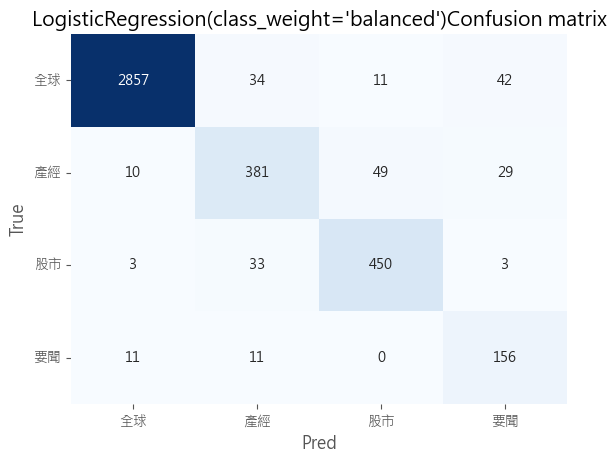

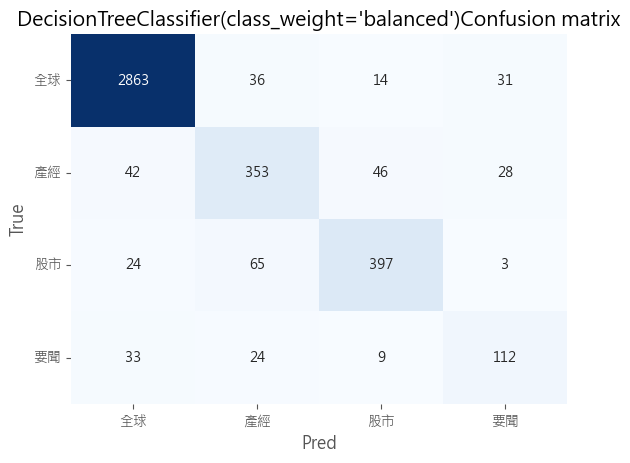

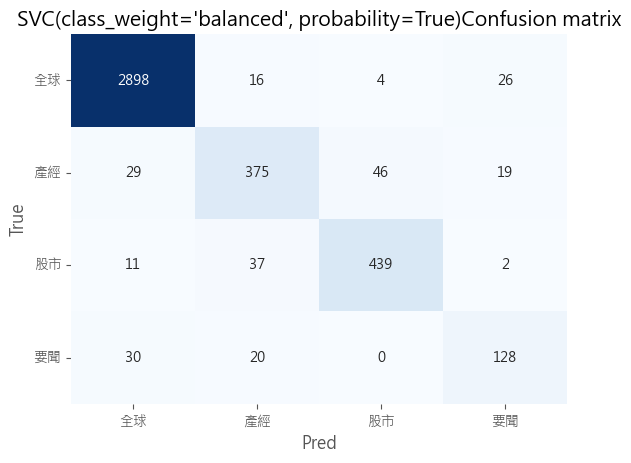

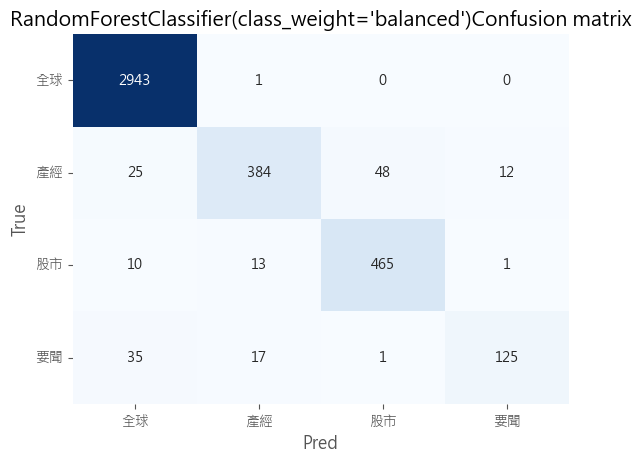

In [81]:
# Ê∫ñÂÇôË®ìÁ∑¥Ë≥áÊñô
X = data["words"]
y = data["artCatagory"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=666
)
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêàÔºàÊúâÂπ≥Ë°°Ôºâ
model_set = dict()
model_set['clf_logistic'] = LogisticRegression(class_weight='balanced')
model_set['clf_dtree'] = DecisionTreeClassifier(class_weight='balanced')
model_set['clf_svm'] = svm.SVC(probability=True, class_weight='balanced')
model_set['clf_rf'] = RandomForestClassifier(class_weight='balanced')
# ÂÆöÁæ© vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
# Â≠òÁµêÊûú
result_set = dict()

for k, model in model_set.items():
    print("="*100)
    print(f"now training: {k}")
    result_set[k] = train_cv(vectorizer, model, X_train, y_train)
    print("="*100)

+ ÊâæÂá∫ `f1-score` Ë°®ÁèæÊúÄÂ•ΩÁöÑÊ®°ÂûãÊòØÂì™ÂÄãÔºå‰ΩúÁÇ∫ÊàëÂÄëÊúÄÁµÇÂæóÂà∞ÁöÑÂàÜÈ°ûÂô®

In [82]:
max = 0
best_model_name = ""
best_model_metric = "f1-score"

## choose max f1-score model from result_set
for k, v in result_set.items():
    if v['weighted avg'][best_model_metric] > max:
        max = v['weighted avg'][best_model_metric]
        best_model_name = k
print(f"best model: {best_model_name}")
pprint(result_set[best_model_name])

best model: clf_rf
{'accuracy': 0.9600490196078432,
 'macro avg': {'f1-score': 0.8938042787413085,
               'precision': 0.9281337271222553,
               'recall': 0.8678977721807446,
               'support': 4080.0},
 'weighted avg': {'f1-score': 0.9584805798980196,
                  'precision': 0.9591138409401511,
                  'recall': 0.9600490196078432,
                  'support': 4080.0},
 'ÂÖ®ÁêÉ': {'f1-score': 0.9880812489508142,
        'precision': 0.9767673415200796,
        'recall': 0.9996603260869565,
        'support': 2944.0},
 'Áî¢Á∂ì': {'f1-score': 0.8687782805429864,
        'precision': 0.9253012048192771,
        'recall': 0.8187633262260128,
        'support': 469.0},
 'ËÇ°Â∏Ç': {'f1-score': 0.9272183449651047,
        'precision': 0.9046692607003891,
        'recall': 0.950920245398773,
        'support': 489.0},
 'Ë¶ÅËÅû': {'f1-score': 0.7911392405063291,
        'precision': 0.9057971014492754,
        'recall': 0.702247191011236,
        'suppo

Ë°®ÁèæÊúÄÂ•ΩÁöÑÊòØ `RandomForestClassifier`

In [83]:
y_pred = model_set['clf_rf'].predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.99      1.00      0.99      1250
          Áî¢Á∂ì       0.90      0.85      0.88       179
          ËÇ°Â∏Ç       0.93      0.96      0.95       234
          Ë¶ÅËÅû       0.96      0.79      0.87        86

    accuracy                           0.97      1749
   macro avg       0.94      0.90      0.92      1749
weighted avg       0.97      0.97      0.97      1749



In [84]:
model_set['clf_rf'].predict(vectorizer.transform(["Âè∞Á©çÈõª ËÇ°Á•® Â§ßÂ≠∏ÊïôÊéà"]).toarray())

array(['Áî¢Á∂ì'], dtype=object)

* ÊúÄ‰Ω≥ÁöÑ model ÁÇ∫ SVMÔºåÂÖ∂‰∏≠ Decision Tree ÁöÑË°®ÁèæËºÉÂ∑ÆÂ§ñÔºåÂÖ∂È§ò‰∏âÂÄã model ÔºàLogistic„ÄÅSVM„ÄÅRandom ForestÔºâË°®ÁèæÂ∑Æ‰∏çÂ§ö„ÄÇ
* Âè¶Â§ñ‰πüÂèØ‰ª•ÂòóË©¶Áî®Áõ¥Êé•ÁöÑË©ûÈ†ªË°®‰ΩúÁÇ∫ `vectorizer`ÔºåÊØîËºÉÁúãÁúãÁõ∏ËºÉ tfidfÔºåÊòØÂê¶ÊïàÊûúÊõ¥Â•Ω„ÄÇ

### 2.4 ÂàÜÊûêÂèØËß£ÈáãÊ®°ÂûãÁöÑÁµêÊûú
#### 2.4.1 ÂêÑÂ≠óË©ûÁâπÂæµÁöÑËø¥Ê≠∏‰øÇÊï∏
Â∞çÊñºÁ∑öÊÄßÁöÑÊ®°ÂûãÔºåÂèØ‰ª•ËóâÁî±Áõ∏Èóú‰øÇÊï∏ÔºåÊü•ÁúãË≥áÊñôÁâπÂæµÔºàË©ûÔºâÂ∞çÊñºÂà§Êñ∑ÂàÜÈ°ûÁöÑÂΩ±Èüø
+ Ëø¥Ê≠∏‰øÇÊï∏Ôºàcoefficient estimatesÔºâÂèçÊò†‰∫ÜÊØèÂÄãÁâπÂæµÂ∞çÈ†êÊ∏¨ÁµêÊûúÁöÑÂΩ±ÈüøÁ®ãÂ∫¶ÂíåÊñπÂêë„ÄÇ‚ÄãÁï∂ÂÖ∂‰ªñËÆäÊï∏‰øùÊåÅ‰∏çËÆäÊôÇÔºåÊüê‰∏ÄÁâπÂæµÁöÑÂÄºÂ¢ûÂä†‰∏ÄÂÄãÂñÆ‰ΩçÔºà‰æãÂ¶ÇË©ûÈ†ªÂ¢ûÂä†1ÔºâÔºåÂÖ∂Â∞çÊáâÁöÑËø¥Ê≠∏‰øÇÊï∏Ë°®Á§∫Ë©≤ÁâπÂæµÂ∞ç‰∫ã‰ª∂ÁôºÁîüÊ©üÁéáÁöÑÂΩ±Èüø„ÄÇ
+ Ë®àÁÆóÂæåÂæóÂà∞ÂãùÁÆóÊØîÔºàodds ratioÔºâÔºåÈÄôË°®Á§∫Ë©≤ÁâπÂæµÊØèÂ¢ûÂä†‰∏ÄÂÄãÂñÆ‰ΩçÔºå‰∫ã‰ª∂ÁôºÁîüÁöÑÂãùÁÆóÔºàoddsÔºâÁõ∏Â∞çÊñºÊú™Â¢ûÂä†ÊôÇÁöÑÂÄçÊï∏ËÆäÂåñ„ÄÇ
+ ÈÄôË£°Ëàâ logistic regression + cv tokenizer ÁÇ∫‰æã

In [85]:
def plot_coef(logistic_reg_model, feature_names, top_n=10):
    # ÈÅ∏Âá∫ÊüêÂÄãÈ°ûÂà•ÁöÑÂâç 10 Â§ßÂΩ±ÈüøÂäõÂ≠óË©û
    log_odds = logistic_reg_model.coef_.T
    coef_df = pd.DataFrame(
        log_odds, 
        columns=logistic_reg_model.classes_, index=feature_names
    )
    for label in coef_df.columns:
        select_words = (
            coef_df[[label]]
            .sort_values(by=label, ascending=False)
            .iloc[np.r_[0:top_n, -top_n:0]]
        )
        word = select_words.index
        count = select_words[label]
        category_colors = np.where(
            select_words[label] >= 0, "darkseagreen", "rosybrown"
        )  # Ë®≠ÂÆöÈ°èËâ≤

        fig, ax = plt.subplots(figsize=(8, top_n*0.8))  # Ë®≠ÂÆöÁï´Â∏É
        plt.rcParams["axes.unicode_minus"] = False

        ax.barh(word, count, color=category_colors)
        ax.invert_yaxis()
        ax.set_title(
            "Coeff increase/decrease odds ratio of „Äå" + label + "„Äç label the most",
            loc="left",
            size=16,
        )
        ax.set_ylabel("word", size=14)
        ax.set_xlabel("odds ratio", size=14)

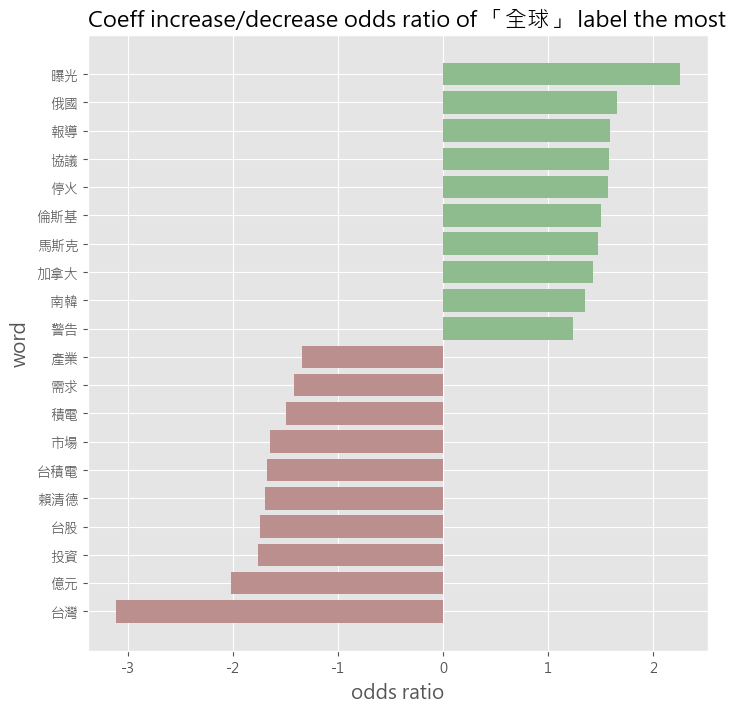

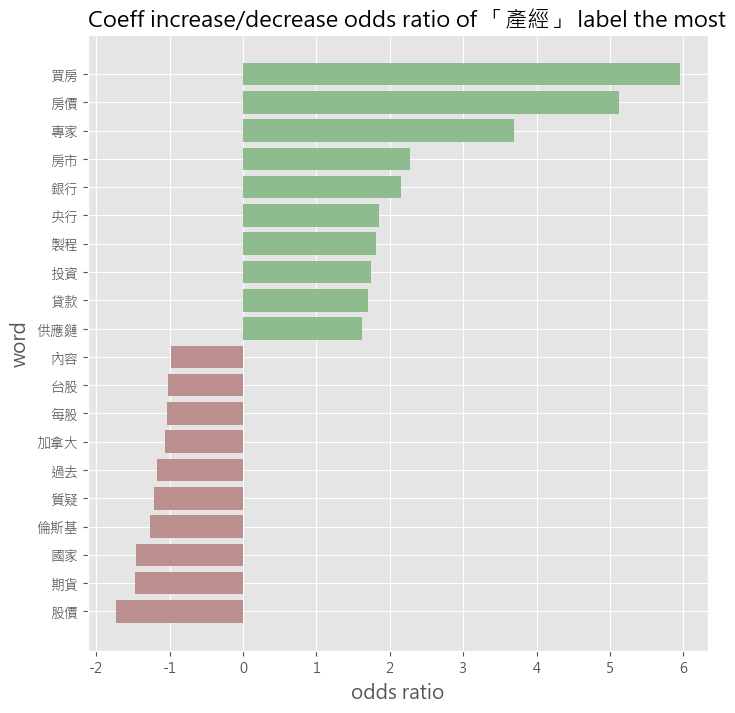

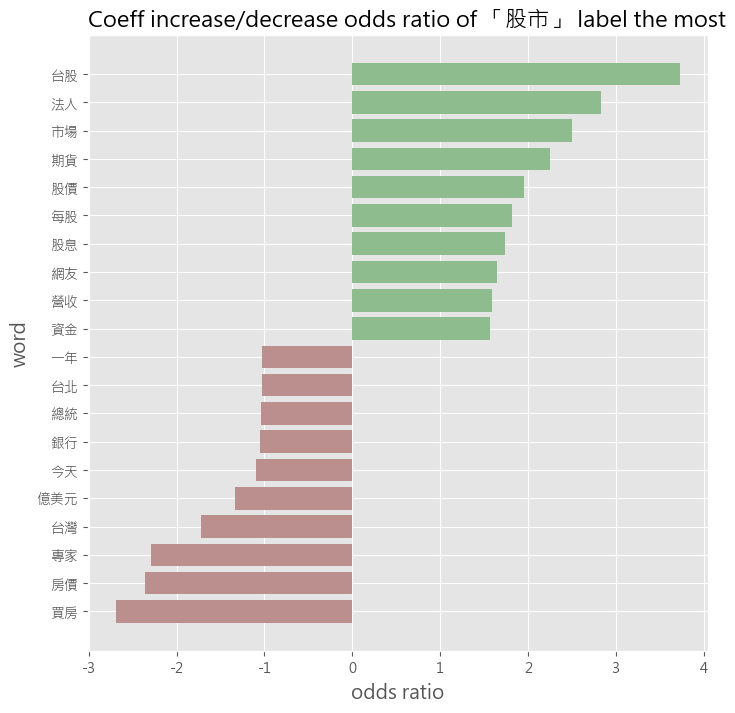

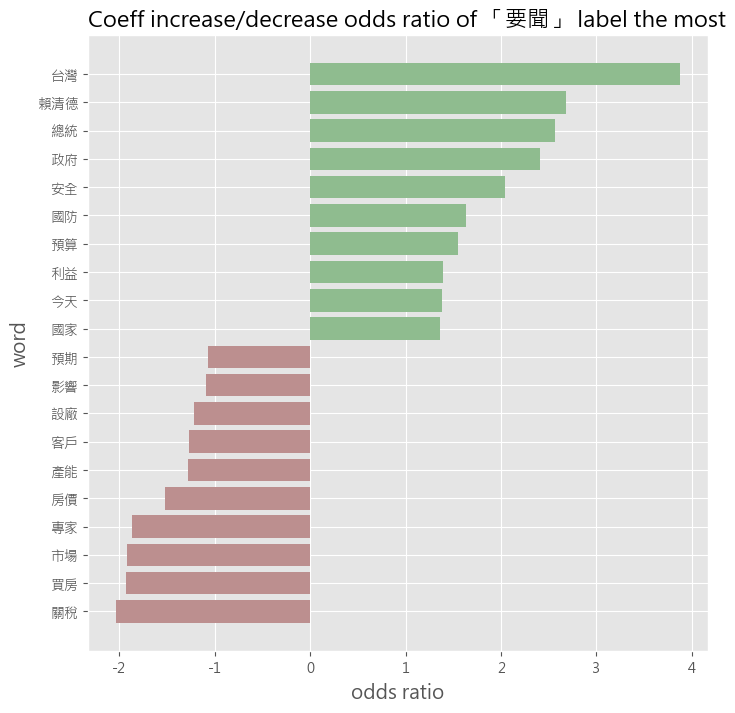

In [86]:
plot_coef(logistic_reg_model=model_set['clf_logistic'], feature_names=vectorizer.get_feature_names_out(), top_n=10)

‰∏ªÈ°åË©ûËß£ÈáãÔºö
„ÄêÂÖ®ÁêÉ„Äë
Ê≠£ÂêëË©ûÔºöÂÉèÊòØ„ÄåÊõùÂÖâ„Äç„ÄÅ„ÄåÂ∑ùÊôÆ„Äç„ÄÅ„Äå‰øÑÂúã„Äç„ÄÅ„ÄåÂÅúÁÅ´„Äç„ÄÅ„ÄåÂ†±Â∞é„Äç„ÄÅ„ÄåÈ¶¨ÊñØÂÖã„ÄçÁ≠âÔºåÈÄô‰∫õÂ≠óË©ûÂ∏∏Ë¶ãÊñºÂúãÈöõÊñ∞ËÅûËàáÂú∞Á∑£ÊîøÊ≤ªÂ†±Â∞é‰∏≠„ÄÇÈ°ØÁ§∫„ÄåÂÖ®ÁêÉ„ÄçÈ°ûÊñáÁ´†Ê∂µËìãË®±Â§öÂúãÈöõ‰∫∫Áâ©„ÄÅÂúãÈöõË°ùÁ™Å„ÄÅÈáçÂ§ßÊîøÊ≤ª‰∫ã‰ª∂„ÄÇ
Ë≤†ÂêëË©ûÔºö„ÄåÂè∞ÁÅ£„Äç„ÄÅ„ÄåÂÑÑÂÖÉ„Äç„ÄÅ„ÄåÊäïË≥á„Äç„ÄÅ„ÄåÂè∞ËÇ°„Äç„ÄÅ„ÄåÈ¥ªÊµ∑„ÄçÁ≠âÊòéÈ°ØÂÅèÂêëÊú¨Âú∞Ë≤°Á∂ìË≠∞È°å„ÄÇ

„ÄêÁî¢Á∂ì„Äë
Ê≠£ÂêëË©ûÔºö„ÄåË≤∑Êàø„Äç„ÄÅ„ÄåÊàøÂÉπ„Äç„ÄÅ„ÄåÂ∞àÂÆ∂„Äç„ÄÅ„ÄåÊàøÂ∏Ç„Äç„ÄÅ„ÄåÂ§ÆË°å„Äç„ÄÅ„ÄåË≤∏Ê¨æ„Äç„ÄÅ„ÄåÊäïË≥á„Äç„ÄÅ„ÄåË£ΩÁ®ã„ÄçÁ≠âË©ûÔºåÂúçÁπûÂú®ÊàøÂ∏ÇÂãïÊÖã„ÄÅÁ∂ìÊøüÊîøÁ≠ñ„ÄÅË£ΩÈÄ†Ê•≠Á≠âÊ†∏ÂøÉË≠∞È°å„ÄÇ
„ÄåÂ∑ùÊôÆ„Äç„ÄÅ„ÄåÂä†ÊãøÂ§ß„Äç„ÄÅ„ÄåÂúãÂÆ∂„Äç„ÄÅ„ÄåËÇ°ÂÉπ„Äç„ÄÅ„ÄåÊúüË≤®„ÄçÁ≠âÔºåÈÄô‰∫õÂ≠óË©ûÈõñËàáÂÆèËßÄÁ∂ìÊøüÊàñÊîøÊ≤ªÁõ∏ÈóúÔºå‰ΩÜÂ§öÂá∫ÁèæÂú®„ÄåÂÖ®ÁêÉ„Äç„ÄÅ„ÄåËÇ°Â∏Ç„ÄçÈ°û„ÄÇ

„ÄêËÇ°Â∏Ç„Äë
Ê≠£ÂêëË©ûÔºö„ÄåÂè∞ËÇ°„Äç„ÄÅ„ÄåÊ≥ï‰∫∫„Äç„ÄÅ„ÄåËÇ°ÂÉπ„Äç„ÄÅ„ÄåÊØèËÇ°„Äç„ÄÅ„ÄåÊº≤ÂπÖ„Äç„ÄÅ„ÄåÁáüÊî∂„Äç„ÄÅ„ÄåËÇ°ÊÅØ„Äç„ÄÅ„ÄåÁ∂≤Âèã„ÄçÁ≠âÔºåÂ±¨ÊñºÂè∞ÁÅ£ÈáëËûçÂ∏ÇÂ†¥Â∞àÊúâË©ûÂΩô„ÄÇ
„ÄåÊ≥ï‰∫∫„Äç„ÄÅ„ÄåÁ∂≤Âèã„ÄçÂèçÊò†Â†±Â∞é‰∏≠Â∏∏Ë¶ãÊï£Êà∂ËàáÊ≥ï‰∫∫Ë≤∑Ë≥£ÂàÜÊûê„ÄÇ

„ÄêË¶ÅËÅû„Äë‰∏ªÈ°åË©ûËß£ÈáãÔºö
Ê≠£ÂêëË©ûÔºö

„ÄåÂè∞ÁÅ£„Äç„ÄÅ„ÄåË≥¥Ê∏ÖÂæ∑„Äç„ÄÅ„ÄåÁ∏ΩÁµ±„Äç„ÄÅ„ÄåÊîøÂ∫ú„Äç„ÄÅ„ÄåÂÆâÂÖ®„Äç„ÄÅ„ÄåÂúãÈò≤„Äç„ÄÅ„ÄåÈ†êÁÆó„Äç„ÄÅ„Äå‰ªäÂ§©„Äç„ÄÅ„ÄåÂà©Áõä„ÄçÁ≠âÔºåÊòéÈ°ØËàáÂÖßÊîø„ÄÅÊîøÂ∫úËàáÊîøÊ≤ªÊñ∞ËÅûÁõ∏Èóú„ÄÇ

### 2.5 Áî®Ë®ìÁ∑¥Â•ΩÁöÑÂàÜÈ°ûÂô®‰æÜÈ†êÊ∏¨ÂÖ∂‰ªñÂÆ∂ÁöÑÊñ∞ËÅûÈ°ûÂà•
ÊàëÂÄëÂâçÈù¢‰ΩøÁî®ËÅØÂêàÊñ∞ËÅûÁ∂≤ÁöÑË≥áÊñôË®ìÁ∑¥Â•Ω‰∫ÜÂàÜÈ°ûÂô®Ê®°ÂûãÔºåÊé•ËëóÁî®ÂÖ∂‰ªñÂÆ∂Êñ∞ËÅûÁ∂≤ÁöÑË≥áÊñôË©¶Ë©¶ÁúãÂàÜÈ°ûÁöÑÊïàÊûú„ÄÇ

`ebc.csv` ÁÇ∫Êù±Ê£ÆÊñ∞ËÅûÁ∂≤Ë≥áÊñô
- ÁâàÂà•ÔºöÁ§æÊúÉ„ÄÅË≤°Á∂ì„ÄÅÂúãÈöõ„ÄÅÊîøÊ≤ª„ÄÅÂÖ©Â≤∏
- ÊôÇÈñìÁØÑÂúçÔºö2025/02/20 ~ 2025/03/30
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°ÔºàÂ¶ÇË®≠ÂÆöÈóúÈçµÂ≠óË≥áÊñôÂ§™Â∞ëÔºâ

In [87]:
# ÂåØÂÖ•Ë≥áÊñô
ct = pd.read_csv("./raw_data/ebc.csv")
ct.dropna(inplace=True)
ct

system_id                          artTitle  \
0            1  iPhone 16eÁôªÂ†¥ÔºÅ„ÄåÊúÄÂπ≥ÂÉπAIÊâãÊ©ü„Äç‰∫ÆÈªûË¶èÊ†º„ÄÅÂîÆÂÉπ‰∏ÄÊ¨°Áúã   
1            2         Âè∞Á©çÈõªÊå´20ÂÖÉ Âè∞ËÇ°Ë∑åÈÄæ170Èªû Â∑•Ê•≠ÈõªËÖ¶ÈÄÜÂã¢Ëµ∞Êèö   
2            3          Êù±Ê£ÆÊ∑±Â∫¶Âë®Â†±ÔºèÂè∞ÁÅ£Â•≥Â©øÊìçÂàÄ ÂÅ•Ë∫´ÈæçÈ†≠ÂêÉ‰∏ãÁæéÂúãÂìÅÁâå   
3            4         Ê±ΩËªäÂ§ßÂª†‰øùÊôÇÊç∑ÁàÜË£ÅÂì°ÔºÅ1900‰∫∫ÊÅêÂèóÂΩ±Èüø ÂéüÂõ†ÊõùÂÖâ   
4            5          ÊâçÂâõÈÄÄ‰ºëÔºÅËÄÅÁâåÁßëÊäÄÂ§ßÂª†Ëë£Â∫ßÂÇ≥Èõ¢‰∏ñ ÂÖ¨Âè∏ÁôºÈáçË®äË≠âÂØ¶   
...        ...                               ...   
3697      2505           Â∑ùÊôÆÁÜ±Á∑öÊæ§ÂÄ´ÊñØÂü∫1Â∞èÊôÇ ÂêåÊÑè‰øÑÁÉèÂ∞çËÉΩÊ∫êË®≠ÊñΩÂÅúÁÅ´   
3698      2506                Êñ∞ÔºèÈ¶ôÊ∏ØËà™Á©∫Ê©üËâôÂÖßËµ∑ÁÅ´ÔºÅÁè≠Ê©üÁ∑äÊÄ•ËΩâÈôç   
3699      2507              ÈáçÂ§ßÂ∑•ÂÆâÊÑèÂ§ñÔºÅÂ∑•‰∫∫‰∏çÊÖéÂ¢úÂÖ•ÈçãÁàê Áï∂Â†¥ÊÖòÊ≠ª   
3700      2508          Áî∑Â§ßÁîüÁé©Èõ≤ÈúÑÈ£õËªäÁ™ÅÊöàÂÄíÔºÅÈöîÂ§©ËÖ¶ÂÇ∑‰∫° ÂÆ∂Â±¨Ê±ÇÂÑü3ÂÑÑ   
3701      2509          ËôßÊêç428ÂÑÑÔºÅÁü•ÂêçË∂ÖÂ∏ÇÈóú300ÂàÜÂ∫ó Âì°Â∑•ÊÖò‰∏üÈ£ØÁ¢ó   

                                            artUrl              artDate  \
0     https://news.ebc.net.tw/news/business/472572  2025-02-20 07:00:00   
1     https://news.ebc.net.tw/news/business/472599  2025-02-20 09:33:00   
2     https://news.ebc.net.tw/news/business/472661  2025-02-21 06:00:00   
3     https://news.ebc.net.tw/news/business/472769  2025-02-20 22:47:00   
4     https://news.ebc.net.tw/news/business/472770  2025-02-20 22:29:00   
...                                            ...                  ...   
3697     https://news.ebc.net.tw/news/world/478774  2025-03-20 14:59:00   
3698     https://news.ebc.net.tw/news/world/478787  2025-03-20 16:01:00   
3699     https://news.ebc.net.tw/news/world/478810  2025-03-20 18:34:00   
3700     https://news.ebc.net.tw/news/world/478835  2025-03-20 21:12:00   
3701     https://news.ebc.net.tw/news/world/478850  2025-03-20 20:52:00   

     artCatagory                                         artContent dataSource  
0             Ë≤°Á∂ì  ËòãÊûú‰ªäÔºà20ÔºâÊó•ÂáåÊô®ÈÄ≤Ë°åÊò•Â≠£ÁôºÂ∏ÉÊúÉÔºåÂ∏∂‰æÜiPhone 16ÂÆ∂ÊóèÊñ∞ÊàêÂì°iPhone 16eÔºåÊê≠...        EBC  
1             Ë≤°Á∂ì  Âè∞ËÇ°‰ªäÔºà20ÔºâÊó•Êó©Áõ§Èñã‰ΩéÈúáÁõ™ÔºåÊúÄ‰Ωé‰∏ãÊé¢23429ÈªûÔºåË∑åÈÄæ170ÈªûÔºåÂõûÊ∏¨10Êó•Á∑öÔºåÈ†ê‰º∞Êàê‰∫§ÈáèÂÉÖ...        EBC  
2             Ë≤°Á∂ì  Ê†πÊìöÊúÄÊñ∞Áµ±Ë®àÔºåÊúâË¶èÂæãÈÅãÂãïÁöÑÂè∞ÁÅ£‰∫∫Âè£Ââµ‰∏ãÊñ∞È´òÔºåÊØè3ÂÄã‰∫∫‰∏≠Â∞±Êúâ1‰∫∫ÔºåÈÄô‰πüËÆì„ÄåÊ±óÊ∞¥ÂïÜÊ©ü„ÄçË∑üËëóÂ§ßÁàÜÁôº...        EBC  
3             Ë≤°Á∂ì  Â§ßÂ§öÊï∏‰∫∫ÈÉΩÂ∏åÊúõËá™Â∑±ËÉΩÊúâ‰ªΩÂÆâÁ©©ÁöÑÂ∑•‰ΩúÔºåËã•ÊòØÁÑ°È†êË≠¶ÈÅ≠Âà∞Ë≥áÈÅ£ÔºåÂèØËÉΩÊúÉÈÄ†ÊàêÂì°Â∑•ÂøÉË£°ÁöÑ‰∏çÂÆâËàá‰∏çÊªø„ÄÇÊ±ΩËªä...        EBC  
4             Ë≤°Á∂ì  ËÄÅÁâåÁßëÊäÄÂ§ßÂª†„ÄåÁí∞ÈöÜÁßëÊäÄ„ÄçÂâçËë£Â∫ßÊö®Á∏ΩÁ∂ìÁêÜÊ≠êÊ≠£ÊòéÈ©öÂÇ≥Èõ¢‰∏ñÔºåÊ≠êÊ≠£Êòé1Êúà14Êó•Ëµ∑ÊâçÂÆ£Â∏ÉÈÄÄ‰ºëÔºåÊú™ÊñôÔºåÈÄÄ...        EBC  
...          ...                                                ...        ...  
3697          ÂúãÈöõ  ‰øÑÁÉèÂÅúÁÅ´Âá∫ÁèæÊõôÂÖâÔºüÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÂú®Ëàá‰øÑÁæÖÊñØÁ∏ΩÁµ±ÊôÆ‰∏ÅÈÄöË©±‰∏çÂà∞24Â∞èÊôÇÂæåÔºåÂèàËàáÁÉèÂÖãËò≠Á∏ΩÁµ±Êæ§ÂÄ´ÊñØÂü∫ÈÄ≤...        EBC  
3698          ÂúãÈöõ  È¶ôÊ∏ØËà™Á©∫Á∑®ËôüHX115ÁöÑA320ÂÆ¢Ê©üÔºå‰ªäÔºà20Êó•Ôºâ‰∏ãÂçàÈ©öÂÇ≥Ê©üËâôÂÖßËµ∑ÁÅ´ÔºåÊ©ü‰∏ä‰∫∫Âì°Á∑äÊÄ•ÁñèÊï£ÔºåÊâÄÂπ∏...        EBC  
3699          ÂúãÈöõ  È¶¨‰æÜË•ø‰∫ûËøëÊó•ÁôºÁîü‰∏ÄËµ∑Âö¥ÈáçÂ∑•Ê•≠ÊÑèÂ§ñÔºå‰∏ÄÂêçÂ∑•‰∫∫Âú®Â∑•Âª†Â∑•‰ΩúÊúüÈñìÊÑèÂ§ñÂ¢úÂÖ•ÈçãÁàêÔºåÁï∂Â±ÄÊé•Â†±ÂæåËøÖÈÄüÊ¥æÈÅ£ÊïëÊè¥...        EBC  
3700          ÂúãÈöõ  ÁæéÂúãÁöÑÂÖ≠ÊóóÈ≠îÊ≥ïÂ±±Ê®ÇÂúíÊìÅÊúâ20Â∫ßÈõ≤ÈúÑÈ£õËªäÔºåÊï∏ÈáèÂÖ®ÁêÉÂ±ÖÂÜ†Ôºå‰∏çÈÅéÈÄôÂ∫ßÈÅäÊ®ÇÂúíÂçªÁôºÁîü‰∏ÄËµ∑22Ê≠≤Áî∑Â≠êÔºåÊê≠...        EBC  
3701          ÂúãÈöõ  ‰∏≠Âúã„ÄåË∂ÖÂ∏Ç‰∏ÄÂì•„ÄçÊ∞∏ËºùË∂ÖÂ∏ÇÈÄ£4Âπ¥ËôßÊêçÔºåÁ¥ØË®àÈáëÈ°çÈ´òÈÅî‰∫∫Ê∞ëÂπ£94.36ÂÑÑÂÖÉÔºàÁ¥ÑÊñ∞Âè∞Âπ£428ÂÑÑÂÖÉÔºâ„ÄÇ...        EBC  

[1803 rows x 7 columns]

In [88]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
ct["artContent"].str.replace("(http|https)://.*", "", regex=True)
ct["artTitle"].str.replace("(http|https)://.*", "", regex=True)
ct["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
ct["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)

# Áïô‰∏ã content
ct["content"] = ct["artTitle"] + ct["artContent"]
ct = ct.loc[:,["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº 1 ÁöÑË©ûÂΩô
    return seg_list

ct["words"] = ct["content"].apply(getToken).map(" ".join)
ct.head()

content  \
0  iPhone 16eÁôªÂ†¥ÔºÅ„ÄåÊúÄÂπ≥ÂÉπAIÊâãÊ©ü„Äç‰∫ÆÈªûË¶èÊ†º„ÄÅÂîÆÂÉπ‰∏ÄÊ¨°ÁúãËòãÊûú‰ªäÔºà20ÔºâÊó•ÂáåÊô®ÈÄ≤Ë°åÊò•Â≠£...   
1  Âè∞Á©çÈõªÊå´20ÂÖÉ Âè∞ËÇ°Ë∑åÈÄæ170Èªû Â∑•Ê•≠ÈõªËÖ¶ÈÄÜÂã¢Ëµ∞ÊèöÂè∞ËÇ°‰ªäÔºà20ÔºâÊó•Êó©Áõ§Èñã‰ΩéÈúáÁõ™ÔºåÊúÄ‰Ωé‰∏ãÊé¢23...   
2  Êù±Ê£ÆÊ∑±Â∫¶Âë®Â†±ÔºèÂè∞ÁÅ£Â•≥Â©øÊìçÂàÄ ÂÅ•Ë∫´ÈæçÈ†≠ÂêÉ‰∏ãÁæéÂúãÂìÅÁâåÊ†πÊìöÊúÄÊñ∞Áµ±Ë®àÔºåÊúâË¶èÂæãÈÅãÂãïÁöÑÂè∞ÁÅ£‰∫∫Âè£Ââµ‰∏ãÊñ∞È´òÔºå...   
3  Ê±ΩËªäÂ§ßÂª†‰øùÊôÇÊç∑ÁàÜË£ÅÂì°ÔºÅ1900‰∫∫ÊÅêÂèóÂΩ±Èüø ÂéüÂõ†ÊõùÂÖâÂ§ßÂ§öÊï∏‰∫∫ÈÉΩÂ∏åÊúõËá™Â∑±ËÉΩÊúâ‰ªΩÂÆâÁ©©ÁöÑÂ∑•‰ΩúÔºåËã•ÊòØÁÑ°...   
4  ÊâçÂâõÈÄÄ‰ºëÔºÅËÄÅÁâåÁßëÊäÄÂ§ßÂª†Ëë£Â∫ßÂÇ≥Èõ¢‰∏ñ ÂÖ¨Âè∏ÁôºÈáçË®äË≠âÂØ¶ËÄÅÁâåÁßëÊäÄÂ§ßÂª†„ÄåÁí∞ÈöÜÁßëÊäÄ„ÄçÂâçËë£Â∫ßÊö®Á∏ΩÁ∂ìÁêÜÊ≠êÊ≠£Êòé...   

                                         artUrl artCatagory  \
0  https://news.ebc.net.tw/news/business/472572          Ë≤°Á∂ì   
1  https://news.ebc.net.tw/news/business/472599          Ë≤°Á∂ì   
2  https://news.ebc.net.tw/news/business/472661          Ë≤°Á∂ì   
3  https://news.ebc.net.tw/news/business/472769          Ë≤°Á∂ì   
4  https://news.ebc.net.tw/news/business/472770          Ë≤°Á∂ì   

                                               words  
0  iPhone 16e ÁôªÂ†¥ Âπ≥ÂÉπ AI ÊâãÊ©ü ‰∫ÆÈªû Ë¶èÊ†º ÂîÆÂÉπ ‰∏ÄÊ¨° ËòãÊûú 20 ÂáåÊô® ÈÄ≤Ë°å...  
1  Âè∞Á©ç ÈõªÊå´ 20 Âè∞ËÇ° 170 Â∑•Ê•≠ ÈõªËÖ¶ ÈÄÜÂã¢ Ëµ∞ÊèöÂè∞ ËÇ°‰ªä 20 Êó©Áõ§ Èñã‰Ωé ÈúáÁõ™ ÊúÄ‰Ωé...  
2  Êù±Ê£Æ Ê∑±Â∫¶ Âë®Â†± Âè∞ÁÅ£ Â•≥Â©ø ÊìçÂàÄ ÂÅ•Ë∫´ ÈæçÈ†≠ ÁæéÂúã ÂìÅÁâå ÊúÄÊñ∞ Áµ±Ë®à Ë¶èÂæã ÈÅãÂãï Âè∞ÁÅ£ ‰∫∫...  
3  Ê±ΩËªä Â§ßÂª† ‰øùÊôÇÊç∑ Ë£ÅÂì° 1900 ÊÅêÂèó ÂΩ±Èüø ÂéüÂõ† ÊõùÂÖâ Â§ßÂ§öÊï∏ Â∏åÊúõ Êúâ‰ªΩ ÂÆâÁ©© Â∑•‰Ωú ...  
4  ÊâçÂâõ ÈÄÄ‰ºë ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Ëë£Â∫ß Èõ¢‰∏ñ ÂÖ¨Âè∏ ÁôºÈáç Ë≠âÂØ¶ ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Áí∞ÈöÜ ÁßëÊäÄ Ëë£...

In [89]:
ct['artCatagory'].value_counts()

artCatagory
Á§æÊúÉ    720
ÂúãÈöõ    551
ÊîøÊ≤ª    363
Ë≤°Á∂ì    158
ÂÖ©Â≤∏     11
Name: count, dtype: int64

Â∞áÊù±Ê£ÆÁöÑÊñ∞ËÅûÈ°ûÂà•Áµ¶ÈáçÊñ∞ mapping Âà∞ÊàëÂÄëÂàÜÈ°ûÂô®ÁöÑÈ°ûÂà•ÔºåÊé•ËëóÈñãÂßãÈÄ≤Ë°åÂàÜÈ°û‰ªªÂãô

+ ËÅØÂêàÔºöÂÖ®ÁêÉ„ÄÅÁî¢Á∂ì„ÄÅËÇ°Â∏Ç„ÄÅË¶ÅËÅû
+ Êù±Ê£ÆÔºöÁ§æÊúÉ„ÄÅÂúãÈöõ„ÄÅÊîøÊ≤ª„ÄÅË≤°Á∂ì„ÄÅÂÖ©Â≤∏

In [90]:
mapper = {"Ë≤°Á∂ì":"ËÇ°Â∏Ç", "ÊîøÊ≤ª":"Ë¶ÅËÅû", "Á§æÊúÉ":"Áî¢Á∂ì", "ÂÖ©Â≤∏": "ÂÖ®ÁêÉ", "ÂúãÈöõ":"ÂÖ®ÁêÉ"}
ct['artCatagory'] = ct['artCatagory'].map(mapper)

X = ct['words']
y = ct['artCatagory']

y_pred = model_set[best_model_name].predict(vectorizer.transform(X).toarray())
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          ÂÖ®ÁêÉ       0.35      0.92      0.51       562
          Áî¢Á∂ì       0.11      0.01      0.02       720
          ËÇ°Â∏Ç       0.90      0.46      0.61       158
          Ë¶ÅËÅû       0.77      0.36      0.49       363

    accuracy                           0.40      1803
   macro avg       0.53      0.44      0.41      1803
weighted avg       0.39      0.40      0.32      1803



Âæû classification report ÂèØ‰ª•ÁôºÁèæÔºåÂú®Êù±Ê£ÆÊñ∞ËÅûÁöÑË≥áÊñôÈõÜ‰∏äÔºåÂâçÈù¢Ë®ìÁ∑¥ÂæóÂà∞ÁöÑÂàÜÈ°ûÂô®Âú®ÈÄôÈÇäË°®Áèæ‰∏¶‰∏çÂ•Ω
ËÇ°Â∏ÇÁöÑ precision = 1.00ÔºåÊâÄÊúâË¢´Ê®°ÂûãÂà§Êñ∑ÁÇ∫„ÄåËÇ°Â∏Ç„Äç ÁöÑÊñáÁ´†Ë£°Èù¢ÔºåÁúüÁöÑÂÖ®ÈÉΩÊòØËÇ°Â∏ÇÔºåÂÆåÂÖ®Ê≤íÊúâË™§Âà§Âà•ÁöÑÊÉÖÊ≥Å„ÄÇ
Êúâ 66% ÁöÑËÇ°Â∏ÇÊñáÁ´†Ê≤íË¢´ÊäìÂà∞ÔºåÊ®°ÂûãÂ§™‰øùÂÆà

Êé•ËëóÈÄ≤‰∏ÄÊ≠•Á†îÁ©∂ÂàÜÈ°ûÁöÑÁµêÊûúÔºåÂòóË©¶ÊâæÂá∫ÂïèÈ°åÁöÑÂéüÂõ†

In [91]:
ct['pred'] = y_pred
ct.loc[:,['words', 'artCatagory',"pred"]]

words artCatagory pred
0     iPhone 16e ÁôªÂ†¥ Âπ≥ÂÉπ AI ÊâãÊ©ü ‰∫ÆÈªû Ë¶èÊ†º ÂîÆÂÉπ ‰∏ÄÊ¨° ËòãÊûú 20 ÂáåÊô® ÈÄ≤Ë°å...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
1     Âè∞Á©ç ÈõªÊå´ 20 Âè∞ËÇ° 170 Â∑•Ê•≠ ÈõªËÖ¶ ÈÄÜÂã¢ Ëµ∞ÊèöÂè∞ ËÇ°‰ªä 20 Êó©Áõ§ Èñã‰Ωé ÈúáÁõ™ ÊúÄ‰Ωé...          ËÇ°Â∏Ç   ËÇ°Â∏Ç
2     Êù±Ê£Æ Ê∑±Â∫¶ Âë®Â†± Âè∞ÁÅ£ Â•≥Â©ø ÊìçÂàÄ ÂÅ•Ë∫´ ÈæçÈ†≠ ÁæéÂúã ÂìÅÁâå ÊúÄÊñ∞ Áµ±Ë®à Ë¶èÂæã ÈÅãÂãï Âè∞ÁÅ£ ‰∫∫...          ËÇ°Â∏Ç   Áî¢Á∂ì
3     Ê±ΩËªä Â§ßÂª† ‰øùÊôÇÊç∑ Ë£ÅÂì° 1900 ÊÅêÂèó ÂΩ±Èüø ÂéüÂõ† ÊõùÂÖâ Â§ßÂ§öÊï∏ Â∏åÊúõ Êúâ‰ªΩ ÂÆâÁ©© Â∑•‰Ωú ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
4     ÊâçÂâõ ÈÄÄ‰ºë ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Ëë£Â∫ß Èõ¢‰∏ñ ÂÖ¨Âè∏ ÁôºÈáç Ë≠âÂØ¶ ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Áí∞ÈöÜ ÁßëÊäÄ Ëë£...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
...                                                 ...         ...  ...
3697  ÁÜ±Á∑ö ÂÄ´ÊñØÂü∫ Â∞èÊôÇ ÂêåÊÑè ‰øÑÁÉè ËÉΩÊ∫ê Ë®≠ÊñΩ ÂÅúÁÅ´ ‰øÑÁÉè ÂÅúÁÅ´ Âá∫Áèæ ÊõôÂÖâ ÁæéÂúã Á∏ΩÁµ± ‰øÑÁæÖÊñØ...          ÂÖ®ÁêÉ   ÂÖ®ÁêÉ
3698  È¶ôÊ∏Ø Ëà™Á©∫ Ê©üËâô Ëµ∑ÁÅ´ Áè≠Ê©ü ÊÄ•ËΩâ È¶ôÊ∏Ø Ëà™Á©∫ Á∑®Ëôü HX115 A320 ÂÆ¢Ê©ü 20 ‰∏ãÂçà...          ÂÖ®ÁêÉ   ÂÖ®ÁêÉ
3699  ÈáçÂ§ß Â∑•ÂÆâ ÊÑèÂ§ñ Â∑•‰∫∫ ‰∏çÊÖé Â¢úÂÖ• ÈçãÁàê ÊÖòÊ≠ª È¶¨‰æÜË•ø‰∫û ËøëÊó• ÁôºÁîü ‰∏ÄËµ∑ Âö¥Èáç Â∑•Ê•≠ ÊÑèÂ§ñ...          ÂÖ®ÁêÉ   ÂÖ®ÁêÉ
3700  Â§ßÁîü Èõ≤ÈúÑÈ£õËªä ÊöàÂÄí ÈöîÂ§© ÂÇ∑‰∫° ÂÆ∂Â±¨ Ê±ÇÂÑü ÁæéÂúã ÂÖ≠Êóó È≠îÊ≥ï Ê®ÇÂúí ÊìÅÊúâ 20 Èõ≤ÈúÑÈ£õËªä ...          ÂÖ®ÁêÉ   ÂÖ®ÁêÉ
3701  ËôßÊêç 428 Áü•Âêç Ë∂ÖÂ∏Ç 300 ÂàÜÂ∫ó Âì°Â∑• ‰∏üÈ£ØÁ¢ó ‰∏≠Âúã Ë∂ÖÂ∏Ç ‰∏ÄÂì• Ê∞∏Ëºù Ë∂ÖÂ∏Ç ËôßÊêç Á¥Ø...          ÂÖ®ÁêÉ   ÂÖ®ÁêÉ

[1803 rows x 3 columns]

Â∞áÈåØË™§ÂàÜÈ°ûÁöÑÁµêÊûúÁØ©ÈÅ∏Âá∫‰æÜ

In [92]:
false_pred = ct.query("artCatagory != pred").loc[:,['words', 'artCatagory',"pred"]]
false_pred

words artCatagory pred
0     iPhone 16e ÁôªÂ†¥ Âπ≥ÂÉπ AI ÊâãÊ©ü ‰∫ÆÈªû Ë¶èÊ†º ÂîÆÂÉπ ‰∏ÄÊ¨° ËòãÊûú 20 ÂáåÊô® ÈÄ≤Ë°å...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
2     Êù±Ê£Æ Ê∑±Â∫¶ Âë®Â†± Âè∞ÁÅ£ Â•≥Â©ø ÊìçÂàÄ ÂÅ•Ë∫´ ÈæçÈ†≠ ÁæéÂúã ÂìÅÁâå ÊúÄÊñ∞ Áµ±Ë®à Ë¶èÂæã ÈÅãÂãï Âè∞ÁÅ£ ‰∫∫...          ËÇ°Â∏Ç   Áî¢Á∂ì
3     Ê±ΩËªä Â§ßÂª† ‰øùÊôÇÊç∑ Ë£ÅÂì° 1900 ÊÅêÂèó ÂΩ±Èüø ÂéüÂõ† ÊõùÂÖâ Â§ßÂ§öÊï∏ Â∏åÊúõ Êúâ‰ªΩ ÂÆâÁ©© Â∑•‰Ωú ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
4     ÊâçÂâõ ÈÄÄ‰ºë ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Ëë£Â∫ß Èõ¢‰∏ñ ÂÖ¨Âè∏ ÁôºÈáç Ë≠âÂØ¶ ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Áí∞ÈöÜ ÁßëÊäÄ Ëë£...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
7     WBC ÁúãÊù±Ê£Æ Á∂ìÂÖ∏ ÈñãÊâì ÂõõÂ§ß Ë∂ÖÂïÜ ÂíñÂï° ÂÑ™ÊÉ† ‰∏ñÁïå Ê£íÁêÉ Á∂ìÂÖ∏ WBC Ë≥áÊ†ºË≥Ω 21 ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
...                                                 ...         ...  ...
3608  ÂçóÈùû ÊìÖÊîπ Âè∞ÁÅ£ ÈßêËôï ÂêçÁ®± Â§ñ‰∫§ÈÉ® Âö¥Ê≠£ ÊäóË≠∞ ÈÖçÂêà ‰∏≠Âúã ÂçóÈùû Â§ñ‰∫§ÈÉ® ÂÆòÁ∂≤Â∞á Âè∞Âåó ËÅØ...          ÂÖ®ÁêÉ   Ë¶ÅËÅû
3615  Âè∞Á©ç ÈõªÊàêÂ∑ùÊôÆ ÈóúÁ®Ö Êà∞Âäü Â¶ÑÁ®± ‰∏çÁî® ‰æùË≥¥ Âè∞ÁÅ£ Êô∂Áâá ÁæéÂúã Á∏ΩÁµ± ‰∏ä‰ªª ÈóúÁ®Ö ËøëÊó• Êé•Âèó...          ÂÖ®ÁêÉ   Áî¢Á∂ì
3645  Âè≤‰∏ä ÊúÄË≤¥ iPhone ËòãÊûú Êë∫ÁñäÊ©ü ÂîÆÂÉπ Â∞áÈÅî Pro Max ÂÖ©ÂÄç ËòãÊûú Êé®Âá∫ È¶ñÊ¨æ ...          ÂÖ®ÁêÉ   ËÇ°Â∏Ç
3651  ÈÇÑÂú® Â∞àÂÆ∂ ÁæéËÇ° ÁÜäÂ∏Ç Êé®Âçá ÈáëÂÉπ È£ÜÁ†¥ 3800 ÁæéÂÖÉ ÂèóÂà∞ ÁæéÂúã Á∏ΩÁµ± Donald T...          ÂÖ®ÁêÉ   ËÇ°Â∏Ç
3658  ÂÖ±Ëªç Âè∞ÁÅ£ Âë®ÈÇä ÊºîÁøí ÁæéÂúãÈò≤ÈÉ® ÂØÜÂàá ÈóúÊ≥® Âè∞ÁÅ£ ÂúãÈò≤ÈÉ® 17 Èô∏Á∫å ÂÅµÁç≤ Êï∏ÂçÅÊû∂ Ê¨°ÂÖ±Ê©ü...          ÂÖ®ÁêÉ   Ë¶ÅËÅû

[1074 rows x 3 columns]

ËßÄÂØüÁúãÁúãËÇ°Â∏ÇÈ°ûÂà•ÁöÑÊñ∞ËÅûÔºåÊ®°ÂûãÁµ¶Âá∫ÁöÑÂàÜÈ°ûÁµêÊûúÊÄéÈ∫ºÊ®£

In [93]:
false_pred.loc[false_pred['artCatagory']=='ËÇ°Â∏Ç', :].head(20)

words artCatagory pred
0   iPhone 16e ÁôªÂ†¥ Âπ≥ÂÉπ AI ÊâãÊ©ü ‰∫ÆÈªû Ë¶èÊ†º ÂîÆÂÉπ ‰∏ÄÊ¨° ËòãÊûú 20 ÂáåÊô® ÈÄ≤Ë°å...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
2   Êù±Ê£Æ Ê∑±Â∫¶ Âë®Â†± Âè∞ÁÅ£ Â•≥Â©ø ÊìçÂàÄ ÂÅ•Ë∫´ ÈæçÈ†≠ ÁæéÂúã ÂìÅÁâå ÊúÄÊñ∞ Áµ±Ë®à Ë¶èÂæã ÈÅãÂãï Âè∞ÁÅ£ ‰∫∫...          ËÇ°Â∏Ç   Áî¢Á∂ì
3   Ê±ΩËªä Â§ßÂª† ‰øùÊôÇÊç∑ Ë£ÅÂì° 1900 ÊÅêÂèó ÂΩ±Èüø ÂéüÂõ† ÊõùÂÖâ Â§ßÂ§öÊï∏ Â∏åÊúõ Êúâ‰ªΩ ÂÆâÁ©© Â∑•‰Ωú ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
4   ÊâçÂâõ ÈÄÄ‰ºë ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Ëë£Â∫ß Èõ¢‰∏ñ ÂÖ¨Âè∏ ÁôºÈáç Ë≠âÂØ¶ ËÄÅÁâå ÁßëÊäÄ Â§ßÂª† Áí∞ÈöÜ ÁßëÊäÄ Ëë£...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
7   WBC ÁúãÊù±Ê£Æ Á∂ìÂÖ∏ ÈñãÊâì ÂõõÂ§ß Ë∂ÖÂïÜ ÂíñÂï° ÂÑ™ÊÉ† ‰∏ñÁïå Ê£íÁêÉ Á∂ìÂÖ∏ WBC Ë≥áÊ†ºË≥Ω 21 ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
9   ‰ºÅÈäÄ Ëë£Â∫ß Âäâ‰Ω©Áúü Ë´ãËæ≠ È¶ñÁôº ÁîüÁóÖ ‰æùË¶è Èä∑ÂÅá Âè∞ÁÅ£ ‰∏≠Â∞è‰ºÅÊ•≠ ÈäÄË°å Ëë£‰∫ãÈï∑ Âäâ‰Ω©Áúü Ë´ãËæ≠...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
10  Âè∞Ê∞¥ ÈñãÂá∫ 386 ËÅ∑Áº∫ Ë©¶Áî®Êúü ÊúàËñ™ ÊúÄÈ´ò 3.9 Ëê¨Âè∞ ÂÖ¨Âè∏ 21 ‰∏äÁ∂≤ ÂÖ¨Âëä 114 ...          ËÇ°Â∏Ç   Áî¢Á∂ì
11  Âπ£ÂúàÂè≤ Â§ßË¶èÊ®° Èß≠ÂÆ¢ ÊîªÊìä Bybit Âπ≥Âè∞ 14.6 ÂÑÑÁæéÂÖÉ ‰ª•Â§™ Á´äÂèñ ÂÖ®ÁêÉ Áü•Âêç Âä†ÂØÜ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
12  DeepSeek ÊÖòËºù ËÇ°ÂÉπ ÁãÇÁÄâ ‰ªÅÂã≥ Â∏ÇÂ†¥ ÁêÜËß£ ÂÆåÂÖ® ÊêûÂèç ‰∏≠Âúã Êñ∞Ââµ ÂÖ¨Âè∏ Deep...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
13  Êô∂Áâá ÈÇÑÈõ£ ËÄÅËèúËÑØ Ë∂ä‰πÖË∂ä ÂÄºÈå¢ Ê•≠ËÄÖ È©ö‰∫∫ ÂÉπÂÄº ËÄÅËèúËÑØ Âª£Êù± ÊΩÆÊ±ïÂú∞ÂçÄ Êº¢Êóè ÂÇ≥Áµ± ÂêçËèú...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
33  Êù±Ê£Æ Ê∑±Â∫¶ Âë®Â†± ‰∫§ÊòìÈáè ÈñãÊ°à ÂÉπÈõôÈôç ÊàøÂÉπ È¨ÜÂãï Ë≠∞ÂÉπÁ©∫Èñì ÊàøÂÉπ È¨ÜÂãï ÊîøÂ∫ú ‰∏ÄÁ≥ªÂàó ÊâìÊàø...          ËÇ°Â∏Ç   Áî¢Á∂ì
41  Ê•≠Áïå ÈúáÊíº ÁüΩË∞∑ ÁßëÊäÄ Â∑®È†≠ Ë£ÅÂì° 3350 È£ØÁ¢ó ÂÖ®ÁêÉ Ë£ÅÂì° ÊåÅÁ∫å ÁæéÂúã ÁüΩË∞∑ ÂÖ©ÂÆ∂ ÁßëÊäÄ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
42  ÈáëÂÉπ Â§ßË∑≥Ê∞¥ Â§±ÂÆà 2900 ÁæéÂÖÉ ÂàÜÊûêÂ∏´ ÂéüÂõ† ÊããÂîÆ ÊΩÆÂõ† ÁæéÂúã Êï∏Êìö Á¨¶Âêà È†êÊúü ÈªÉÈáëÂÉπ...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
43  Â∏ÇÂ†¥Á´∂Áà≠ ÊøÄÁÉà ‰∏≠Âúã Ë≥ìÂ£´ Ë£ÅÂì° 15% Ë≥áÈÅ£Ë≤ª ÊõùÂÖâ Âæ∑Âúã Ë±™ËèØ Ê±ΩËªäÂìÅÁâå Ë≥ìÂ£´ Merc...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
45  ÊúÄÊñ∞ ÊäïË≥á ÊÑèÈ°ò Ë™øÊü• ÊàøÂú∞Áî¢ Èö™Âãù Â∞àÂÆ∂ ÈóúÈçµ ÁôºÁèæ ÂÉπÊ†º È¨ÜÂãï Ë≤∑ËÇ° Ë≤∑Êàø Ë®±Â§ö ÊäïË≥á ...          ËÇ°Â∏Ç   Áî¢Á∂ì
46  ÁöÆË°£ ÊäÑË•≤ ‰ªÅÂã≥ Âê¶Ë™ç ÊªëÁ®Ω ÂÖ©‰∏â‰ª∂ Â∞èÁ±≥ ÂâµËæ¶‰∫∫ ‰πãÂâç ÁôºË°® SU7Ultra Êñ∞Ëªä Á±≥Á≤â...          ËÇ°Â∏Ç   ÂÖ®ÁêÉ
49  È≠èÂì≤ÂÆ∂ ÊúÉÈù¢ ÊâøË´æ Âä†Á¢º ÊäïË≥á ÂçÉÂÑÑÁæéÂÖÉ ÁæéÂúã Á∏ΩÁµ± Á©çÈõª Ëë£‰∫ãÈï∑ È≠èÂì≤ÂÆ∂ ÁôΩÂÆÆ Âè¨Èñã ÂÖ±Âêå...          ËÇ°Â∏Ç   Áî¢Á∂ì
53  Âè∞Á©çÈõª Êì¥Â§ß Ëµ¥Áæé ÂàÜÊûêÂ∏´ Á∑©Ëß£ ÈóúÁ®Ö Âç±Ê©ü Êé•ÁÆ° Ëã±ÁâπÁàæ Âè∞Á©ç ÈõªÂ∞á ÁæéÂúã Âä†Á¢º ÂçÉÂÑÑÁæéÂÖÉ...          ËÇ°Â∏Ç   Áî¢Á∂ì
54  Á∂ìÈï∑ ÂÖàÈÄ≤ Ë£ΩÁ®ã Â•àÁ±≥ 1.6 Â•àÁ±≥ ÊòéÂπ¥ ÁîüÁî¢ Âè∞Á©çÈõª Êì¥Â§ß ÊäïË≥á Ê∞ëÁúæ Èª®Á´ãÂßî ÈóúÊ≥® ÊòØ...          ËÇ°Â∏Ç   Áî¢Á∂ì
56  È≠èÂì≤ÂÆ∂ ÊúÉË¶ã ÊâøË´æ Âè∞Á©çÈõª Âä†Á¢º ÊäïË≥á ÂçÉÂÑÑÁæéÂÖÉ Ê≠∑Âè≤ÊÄß ‰∏ÄÂàª Âè∞Á©çÈõª Ëë£‰∫ãÈï∑ È≠èÂì≤ÂÆ∂ ÁæéÂúã...          ËÇ°Â∏Ç   Áî¢Á∂ì

ÊåëÈÅ∏‰∏ÄÁØáËÇ°Â∏ÇÈ°ûÂà•ÁöÑÊñ∞ËÅûÊñáÁ´†ËßÄÂØüÁúãÁúãÂÖßÂÆπÔºåÁÇ∫‰ΩïÊ®°ÂûãÊúÉÂ∞áÂÖ∂ÂàÜÈ°ûÊàêÂÖ®ÁêÉÁöÑÊñ∞ËÅû

In [94]:
pprint(false_pred['words'][42])

('ÈáëÂÉπ Â§ßË∑≥Ê∞¥ Â§±ÂÆà 2900 ÁæéÂÖÉ ÂàÜÊûêÂ∏´ ÂéüÂõ† ÊããÂîÆ ÊΩÆÂõ† ÁæéÂúã Êï∏Êìö Á¨¶Âêà È†êÊúü ÈªÉÈáëÂÉπÊ†º 28 Êó•Ë∑å 1% ÁæéÂÖÉ Á∂≠ÊåÅ ÂÖ©ÈÄ± È´ò‰Ωç ÈôÑËøë Êï∏Êìö '
 'ÊöóÁ§∫ ËÅØÊ∫ñ Fed ÈÄ≤‰∏ÄÊ≠• ÈôçÊÅØ Êé°Âèñ Ë¨πÊÖé Á´ãÂ†¥ ÁèæË≤® ÈªÉÈáë ‰∏ãË∑å 1% ÊØèÁõéÂè∏ 2846.19 ÁæéÂÖÉ ÈªÉÈáë Âë®Ë∑å 3.1% ÂéªÂπ¥ 11 ‰ª•‰æÜ ÊúÄÂ§ß '
 'ÂñÆÈÄ± Ë∑åÂπÖ ‰∫§Ââ≤ COMEX ÈªÉÈáë ÊúüË≤®ÂÉπÊ†º ‰∏ãË∑å 1.6% ÊØèÁõéÂè∏ 2848.50 ÁæéÂÖÉ ‰∏ãËºâ Êù±Ê£Æ App Èö®ÊôÇ ÊéåÊè° Â§©‰∏ã Â§ßÂ∞è‰∫ã Á∏ΩÁµ± ÊîøÁ≠ñ '
 'Â∏∂‰æÜ ÂÉπÊ†º Â£ìÂäõ ËèØÁàæË°ó ‰∏ªË¶Å ËÇ°Êåá ÈñãÁõ§ Ë°®Áèæ ‰ΩéËø∑ Zaner Metals Á∏ΩË£ÅÂÖº È´òÁ¥ö ÈáëÂ±¨ Á≠ñÁï•Â∏´ Peter Grant Ë°®Á§∫ ËÇ°Â∏Ç ÊêçÂ§± '
 'Âä†Âäá ÈªÉÈáë ÊßìÊ°ø Â£ìÂäõ ÈªÉÈáë Âë®‰∏Ä Ââµ‰∏ã Ê≠∑Âè≤ È´òÈªû Â∏ÇÂ†¥ ÊããÂîÆ Ë°åÁÇ∫ ÊåÅÁ∫å ÈÄ≤Ë°å Kitco Metals È´òÁ¥ö Â∏ÇÂ†¥ ÂàÜÊûêÂ∏´ Jim Wyckoff '
 'Ë°®Á§∫ Ë™çÁÇ∫ ÂΩ±Èüø ÈªÉÈáë ÁôΩÈäÄ Â∏ÇÂ†¥ ‰∏ªË¶Å Âõ†Á¥† Áç≤Âà© ‰∫ÜÁµê ‰∫§Êòì Âª∂Á∫å ‰∏ÄÂë® Âº∑ÂãÅ ÁæéÂÖÉ ÊåáÊï∏ ÂÄã‰∫∫Ê∂àË≤ª ÊîØÂá∫ PCE Áâ©ÂÉπÊåáÊï∏ ‰∏äÊº≤ 0.3% Á¨¶Âêà '
 'È†êÊúü 12 ÊåáÊï∏ Êú™Á∂ì ‰øÆÊ≠£ ‰∏äÂçá 0.3% Ë≠âÂà∏ TD Se

Âá∫ÁèæÂ§ßÈáè„ÄåÂÖ®ÁêÉ„ÄçÂ∏∏Ë¶ãË©ûÂΩôÔºö

ÊñáÁ´†‰∏≠Âá∫Áèæ‰∫ÜË®±Â§ö„ÄåÂÖ®ÁêÉ„ÄçÈ°ûÂà•È´òÂ∫¶Áõ∏ÈóúÁöÑÂ≠óË©ûÔºåÂ¶ÇÔºö

Â∑ùÊôÆ„ÄÅËÅØÊ∫ñÊúÉÔºàFedÔºâ„ÄÅÁæéÂúã„ÄÅÊîøÁ≠ñ„ÄÅÂΩôÁéá„ÄÅÈóúÁ®Ö„ÄÅPCE„ÄÅCOMEX„ÄÅKitco Metals„ÄÅZaner Metals Á≠âÔºå

ÈÄô‰∫õË©ûÂΩôÂ§öËàá„ÄåÂúãÈöõÈáëËûç„Äç„ÄÅ„ÄåÂúãÈöõÊîøÁ∂ì„ÄçÁõ∏ÈóúÔºåËÄåÈùûÂè∞ÁÅ£Êú¨Âú∞ËÇ°Â∏ÇÔºåÂÆπÊòìË™òÂ∞éÊ®°ÂûãË™§Âà§ÁÇ∫„ÄåÂÖ®ÁêÉ„Äç„ÄÇ

### 2.6 Áî®Ë®ìÁ∑¥Â•ΩÁöÑÂàÜÈ°ûÂô®‰æÜÂàÜÈ°û PTT ËÇ°Á•®ÁâàÔºàÈóúÈçµÂ≠óÂàÜÈ°ûÔºâ

`ptt_Trump.csv"` ÁÇ∫ PTT ËÇ°Á•®Áâà
- ÊôÇÈñìÁØÑÂúçÔºö2025/02/20 ~ 2025/03/20
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÈóúÈçµÂ≠óÔºöÂ∑ùÊôÆ

In [95]:
# ÂåØÂÖ•Ë≥áÊñô
ptt = pd.read_csv("raw_data/ptt_Trump.csv")
ptt.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Stock/M.1739982718.A.7C...   
1          2  https://www.ptt.cc/bbs/Stock/M.1740006355.A.15...   
2          3  https://www.ptt.cc/bbs/Stock/M.1740012061.A.4D...   

                     artTitle              artDate   artPoster artCatagory  \
0           [ÊÉÖÂ†±]Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖ  2025-02-20 00:31:56     partsex       Stock   
1  [Êñ∞ËÅû]‰∫îËßíÂ§ßÂªàÈ†êÁÆóÈÅ≠Á†çÂ§ßÊï∏ÊìöÂàÜÊûêPalantirÂ¥©  2025-02-20 07:05:52  futurerich       Stock   
2        Re:[ÊÉÖÂ†±]Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖ  2025-02-20 08:40:57   cdcardabc       Stock   

                                          artContent  \
0  Ê®ôÈ°åÔºö Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖ\n\n‰æÜÊ∫êÔºö\nÂ∑ùÊôÆÊñºXÊúÄÊñ∞ÁôºÊñá\nÁ∂≤ÂùÄÔºö\nhttps...   
1  ÂéüÊñáÊ®ôÈ°åÔºö‰∫îËßíÂ§ßÂªàÈ†êÁÆóÈÅ≠Á†ç Â§ßÊï∏ÊìöÂàÜÊûêPalantirÂ¥©Ë∑åË∂Ö10%\n\nÂéüÊñáÈÄ£ÁµêÔºö\nht...   
2  Â•áÊÄ™\n\nÁÇ∫‰ªÄÈ∫ºËÇ°ÁâàË∂ä‰æÜË∂äÂ§öÈÄôÁ®ÆÊ≤íÊúâËÇ°ÈªûÁöÑÊñáÁ´†\n\n‰πçÁúãÈÇÑ‰ª•ÁÇ∫ÈöîÂ£ÅÁâàË∑üÂ∞çÂ≤∏ÁöÑÊüµÊ¨ÑÂ£ûÊéâ\n...   

                                          artComment            e_ip  \
0  [{"cmtStatus": "Êé®", "cmtPoster": "ABC610478", ...  138.199.60.173   
1  [{"cmtStatus": "‚Üí", "cmtPoster": "cccover", "c...  36.226.197.243   
2  [{"cmtStatus": "‚Üí", "cmtPoster": "patri0052", ...    111.82.93.89   

          insertedDate dataSource  
0  2025-02-21 20:17:54        ptt  
1  2025-02-21 20:18:28        ptt  
2  2025-02-21 20:18:28        ptt

In [96]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"number of posts: {ptt.shape[0]}")
print(f"date range: {(ptt['artDate'].min(), ptt['artDate'].max())}")
print(f"category: \n{ptt['artCatagory'].value_counts()}")

number of posts: 703
date range: ('2025-02-20 00:31:56', '2025-03-20 23:42:49')
category: 
artCatagory
Stock    703
Name: count, dtype: int64


In [97]:
print(ptt.columns.tolist())

['system_id', 'artUrl', 'artTitle', 'artDate', 'artPoster', 'artCatagory', 'artContent', 'artComment', 'e_ip', 'insertedDate', 'dataSource']


In [98]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
ptt["artContent"].str.replace("(http|https)://.*", "", regex=True)
ptt["artTitle"].str.replace("(http|https)://.*", "", regex=True)
ptt["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
ptt["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)

# Áïô‰∏ã content
ptt["content"] = ptt["artTitle"] + ptt["artContent"]
ptt = ptt.loc[:,["content", "artUrl", "artCatagory"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº 1 ÁöÑË©ûÂΩô
    return seg_list

ptt = ptt.dropna(subset=["content"])  # ÁßªÈô§ content ÁÇ∫ NaN ÁöÑÂàó
ptt["words"] = ptt["content"].apply(getToken).map(" ".join)
ptt.head()

content  \
0  [ÊÉÖÂ†±]Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖÊ®ôÈ°åÔºö Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖ\n\n‰æÜÊ∫êÔºö\nÂ∑ùÊôÆÊñº...   
1  [Êñ∞ËÅû]‰∫îËßíÂ§ßÂªàÈ†êÁÆóÈÅ≠Á†çÂ§ßÊï∏ÊìöÂàÜÊûêPalantirÂ¥©ÂéüÊñáÊ®ôÈ°åÔºö‰∫îËßíÂ§ßÂªàÈ†êÁÆóÈÅ≠Á†ç Â§ßÊï∏ÊìöÂàÜÊûêP...   
2  Re:[ÊÉÖÂ†±]Â∑ùÊôÆ:Êæ§ÂÄ´ÊñØÂü∫ÊòØ‰∏Ä‰ΩçÁç®Ë£ÅËÄÖÂ•áÊÄ™\n\nÁÇ∫‰ªÄÈ∫ºËÇ°ÁâàË∂ä‰æÜË∂äÂ§öÈÄôÁ®ÆÊ≤íÊúâËÇ°ÈªûÁöÑÊñáÁ´†\n...   
3  [Ë´ãÁõä]ÈÄôÊ≥¢ÊòØÊäÄË°ìÈù¢ÁöÑ‰øùË≠∑ËÆìÂè∞Á©çÈõªË∑å‰∏ç‰∏ãÂéªÂóé?Âæû‰∏ÄÈñãÂßãÂè∞Á©çÈõªË¢´Âº∑Âà∂ÁæéÂúãË®≠‰∏ÄÂ∫ß5Â•àÁ±≥Âª† ÊäïË≥á1...   
4  [Êñ∞ËÅû]Âè∞Á©çÈ≠èÂì≤ÂÆ∂„Äå‰∏ÄÊääÈºªÊ∂ï„ÄÅ‰∏ÄÊääÁúºÊ∑ö„ÄçÁæéÂúãÂéüÊñáÊ®ôÈ°åÔºö\n\nÂè∞Á©çÈ≠èÂì≤ÂÆ∂„Äå‰∏ÄÊääÈºªÊ∂ï„ÄÅ‰∏ÄÊääÁúºÊ∑ö...   

                                              artUrl artCatagory  \
0  https://www.ptt.cc/bbs/Stock/M.1739982718.A.7C...       Stock   
1  https://www.ptt.cc/bbs/Stock/M.1740006355.A.15...       Stock   
2  https://www.ptt.cc/bbs/Stock/M.1740012061.A.4D...       Stock   
3  https://www.ptt.cc/bbs/Stock/M.1740016925.A.8A...       Stock   
4  https://www.ptt.cc/bbs/Stock/M.1740018779.A.D1...       Stock   

                                               words  
0  ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Ê®ôÈ°å ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ ‰æÜÊ∫ê ÊúÄÊñ∞ ÁôºÊñá Á∂≤ÂùÄ https ...  
1  Êñ∞ËÅû ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Palantir ÂéüÊñá Ê®ôÈ°å ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Pa...  
2  Re ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Â•áÊÄ™ ËÇ°Áâà Ë∂ä‰æÜË∂ä ËÇ°Èªû ÊñáÁ´† ‰πçÁúã ÈÇÑ‰ª• ÈöîÂ£Å Â∞çÂ≤∏ Êüµ...  
3  Ë´ãÁõä ÈÄôÊ≥¢ ÊäÄË°ì ‰øùË≠∑ Âè∞Á©ç ÈõªË∑å ‰∏ãÂéª Âè∞Á©çÈõª Âº∑Âà∂ ÁæéÂúã ‰∏ÄÂ∫ß Á±≥Âª† ÊäïË≥á 150 ÂÑÑÁæé...  
4  Êñ∞ËÅû Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää ÁúºÊ∑ö ÁæéÂúã ÂéüÊñá Ê®ôÈ°å Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää...

In [99]:
# ‰ΩøÁî®ÂàÜÈ°ûÂô®ÂàÜÊûê PTT ËÇ°Á•®ÁâàÔºàÈóúÈçµÂ≠óÔºöÂ∑ùÊôÆÔºâ
X = ptt['words']
y = ptt['artCatagory']

y_pred = model_set[best_model_name].predict(vectorizer.transform(X).toarray())

from collections import Counter
Counter(y_pred)

Counter({'ÂÖ®ÁêÉ': 350, 'ËÇ°Â∏Ç': 154, 'Áî¢Á∂ì': 147, 'Ë¶ÅËÅû': 51})

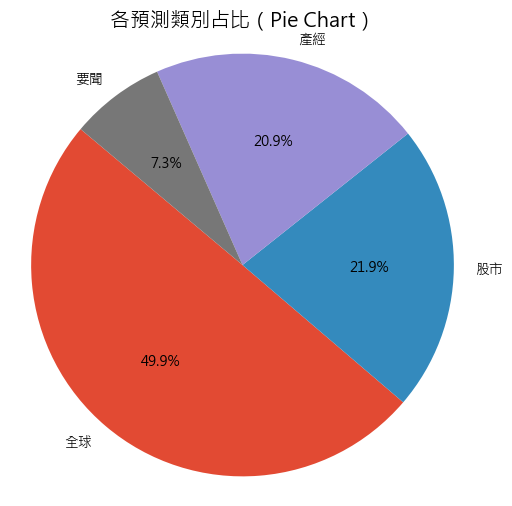

In [104]:
import matplotlib.pyplot as plt

# Áµ±Ë®àÂêÑÈ°ûÂà•È†êÊ∏¨Êï∏Èáè
pred_counts = pd.Series(y_pred).value_counts()

# Áï´Âá∫È§ÖÂúñ
plt.figure(figsize=(6, 6))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("ÂêÑÈ†êÊ∏¨È°ûÂà•Âç†ÊØîÔºàPie ChartÔºâ")
plt.axis('equal')  # ËÆìÈ§ÖÂúñÂúìÂΩ¢
plt.show()

ÂÖ®ÁêÉÁöÑ‰ΩîÊØîÊúÄÈ´òÔºåÊàëÂÄëÊé®Ë´ñÁî±ÊñºÈÄôÊÆµÊúüÈñìÂ∑ùÊôÆÂ∞±‰ªªÔºåÂÆπÊòìËàáÂúãÈöõÊîøÊ≤ª„ÄÅÊîøÁ≠ñ„ÄÅÂúãÈöõÈáëËûç‰∫ã‰ª∂ÔºåÊ®°ÂûãÂ∞áÈÄôÈ°ûÂÖ∑„ÄåÂÖ®ÁêÉË¶ñÈáé„ÄçÊàñÂúãÈöõËÉåÊôØÁöÑÊñáÁ´†ÔºåÂÇæÂêëÂàÜÈ°ûÁÇ∫„ÄåÂÖ®ÁêÉ„Äç

In [101]:
ptt['pred'] = y_pred
ptt.loc[:,['words', 'artCatagory',"pred"]]

words artCatagory pred
0    ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Ê®ôÈ°å ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ ‰æÜÊ∫ê ÊúÄÊñ∞ ÁôºÊñá Á∂≤ÂùÄ https ...       Stock   ÂÖ®ÁêÉ
1    Êñ∞ËÅû ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Palantir ÂéüÊñá Ê®ôÈ°å ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Pa...       Stock   ÂÖ®ÁêÉ
2    Re ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Â•áÊÄ™ ËÇ°Áâà Ë∂ä‰æÜË∂ä ËÇ°Èªû ÊñáÁ´† ‰πçÁúã ÈÇÑ‰ª• ÈöîÂ£Å Â∞çÂ≤∏ Êüµ...       Stock   ÂÖ®ÁêÉ
3    Ë´ãÁõä ÈÄôÊ≥¢ ÊäÄË°ì ‰øùË≠∑ Âè∞Á©ç ÈõªË∑å ‰∏ãÂéª Âè∞Á©çÈõª Âº∑Âà∂ ÁæéÂúã ‰∏ÄÂ∫ß Á±≥Âª† ÊäïË≥á 150 ÂÑÑÁæé...       Stock   ËÇ°Â∏Ç
4    Êñ∞ËÅû Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää ÁúºÊ∑ö ÁæéÂúã ÂéüÊñá Ê®ôÈ°å Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää...       Stock   ÂÖ®ÁêÉ
..                                                 ...         ...  ...
698  Êñ∞ËÅû Â∑ùÊôÆË¶Å ‰∏≠Âúã Ë£ΩÈÄ† ËàπÈöª ÂæµÊî∂ Â§©ÂÉπ Ê∏ØÂè£ Ë≤ªÁæé ÂéüÊñá Ê®ôÈ°å Â∑ùÊôÆË¶Å ‰∏≠Âúã Ë£ΩÈÄ† ËàπÈöª...       Stock   ÂÖ®ÁêÉ
699  Êñ∞ËÅû ÊäïË≥á‰∫∫ Ë©ï‰º∞ Á∂ìÊøü ÁèæÊ≥Å ÁæéÂÇµÊÆñ Âà©Áéá ‰∏ãË∑å ÂéüÊñá Ê®ôÈ°å ÊäïË≥á‰∫∫ Ë©ï‰º∞ Á∂ìÊøü ÁèæÊ≥Å Áæé...       Stock   ËÇ°Â∏Ç
700  Êñ∞ËÅû Ê•äÈáëÈæç Ëã•Êº≤ ÈõªÂÉπ CPI ‰øÆËá≥ 2.04% Â§ÆË°å ÂéüÊñá Ê®ôÈ°å Ê•äÈáëÈæç Ëã•Êº≤ ÈõªÂÉπ C...       Stock   Áî¢Á∂ì
701  Êñ∞ËÅû Á∏ΩÁµ± Âè∞Á©çÈõª ‰ª•Â§ñ Áî¢Ê•≠ Â∞áÊù±Êãì ÂéüÊñá Ê®ôÈ°å Âá∫Â∏≠ ÂïÜÊúÉ Âπ¥È£Ø Á∏ΩÁµ± Âè∞Á©çÈõª ‰ª•Â§ñ Áî¢...       Stock   Ë¶ÅËÅû
702  Ë´ãÁõä 0050 ÊâìÁÆó ËΩâÂ≠ò ÂÆöÊúü ÂÆöÈ°ç ‰∏Ä‰∏ã ÂÆöÊúü ÂÆöÈ°ç ÊñáÁ´† 10 Ë®éË´ñ 2021 ÈÄôÈ†Ö ...       Stock   ÂÖ®ÁêÉ

[702 rows x 3 columns]

In [102]:
ptt.loc[ptt['pred'] == 'ÂÖ®ÁêÉ', ['words', 'pred']].head(20)

words pred
0   ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Ê®ôÈ°å ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ ‰æÜÊ∫ê ÊúÄÊñ∞ ÁôºÊñá Á∂≤ÂùÄ https ...   ÂÖ®ÁêÉ
1   Êñ∞ËÅû ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Palantir ÂéüÊñá Ê®ôÈ°å ‰∫îËßíÂ§ßÂªà È†êÁÆó Êï∏ÊìöÂàÜÊûê Pa...   ÂÖ®ÁêÉ
2   Re ÊÉÖÂ†± ÂÄ´ÊñØÂü∫ ‰∏Ä‰Ωç Áç®Ë£ÅËÄÖ Â•áÊÄ™ ËÇ°Áâà Ë∂ä‰æÜË∂ä ËÇ°Èªû ÊñáÁ´† ‰πçÁúã ÈÇÑ‰ª• ÈöîÂ£Å Â∞çÂ≤∏ Êüµ...   ÂÖ®ÁêÉ
4   Êñ∞ËÅû Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää ÁúºÊ∑ö ÁæéÂúã ÂéüÊñá Ê®ôÈ°å Âè∞Á©ç È≠èÂì≤ÂÆ∂ ‰∏ÄÊää ÈºªÊ∂ï ‰∏ÄÊää...   ÂÖ®ÁêÉ
5   Re Êñ∞ËÅû Trumpthreatens25% tariffsonforeign ÂøΩÁï• ÈÅ∏Âú®...   ÂÖ®ÁêÉ
6   Êñ∞ËÅû ÂÉπÂÄº ÁæéÂÖÉ ÁæéÂúã Êô∂Áâá Â§ßÁ•û ÈáçË©± ÂéüÊñá Ê®ôÈ°å ÂÉπÂÄº ÁæéÂÖÉ ÁæéÂúã Êô∂Áâá Â§ßÁ•û ÈáçË©± ÂàÜ...   ÂÖ®ÁêÉ
10  Êñ∞ËÅû Èô∏Á©© Â§ñË≥á Ë°åÂãï ÊñπÊ°à ÂÆòÂì° ÊäïË≥á ‰∏≠Âúã Êú™‰æÜ ÂéüÊñá Ê®ôÈ°å Èô∏Á©© Â§ñË≥á Ë°åÂãï ÊñπÊ°à ÂÆò...   ÂÖ®ÁêÉ
11  Êñ∞ËÅû Êé®Ë°å ‰øÉÈÄ≤ ÊàêÈï∑ Ë≠∞Á®ã ÊªØËÑπ Êé®Ë°å ‰øÉÈÄ≤ ÊàêÈï∑ Ë≠∞Á®ã ÊªØËÑπ ÊìîÊÜÇ Âõ∞Êìæ ÁæéÂúãÂ∏ÇÂ†¥ ht...   ÂÖ®ÁêÉ
12  Êñ∞ËÅû ‰∏≠Âúã ÈÅîÊàê Ë≤øÊòì ÂçîË≠∞ È†êÊúü ‰∏≠Â§ÆÁ§æ https bit ly 41jnRk5 ‰∏≠Âúã ...   ÂÖ®ÁêÉ
13  Êñ∞ËÅû ÈóúÁ®Ö ÊîøÁ≠ñ È¢®Èö™ ÁëûÈäÄ ÈáëÂÉπ ‰ªäÂπ¥ 30 ÈóúÁ®Ö ÊîøÁ≠ñ È¢®Èö™ ÁëûÈäÄ ÈáëÂÉπ ‰ªäÂπ¥ 3000...   ÂÖ®ÁêÉ
14  Êñ∞ËÅû ÈóúÁ®Ö ÊîøÁ≠ñ Â∏∂‰æÜ È¢®Èö™ ËÄÉÊÖÆ Êö´ÂÅú QT ÂéüÊñá Ê®ôÈ°å Fed ÊúÉË≠∞Á¥ÄË¶Å ÈóúÁ®Ö ÊîøÁ≠ñ Â∏∂...   ÂÖ®ÁêÉ
15  Êñ∞ËÅû ÂÜçÊèÆ ÈóúÁ®Ö Â§ßÊ£í Êì¨Â∞ç Ê±ΩËªä Ë™≤Âæµ 25% ÂçäÂ∑ùÊôÆ ÂÜçÊèÆ ÈóúÁ®Ö Â§ßÊ£í Êì¨Â∞ç Ê±ΩËªä Ë™≤Âæµ...   ÂÖ®ÁêÉ
17  Êñ∞ËÅû ÈóúÁ®Ö ÂÆ≥ÊÖò ÊàêÊó• ‰ºÅÂòÜ ÁîüÊÑè ÂÅöÂ∑ùÊôÆ ÈóúÁ®Ö ÂÆ≥ÊÖò ÊàêÊó• ‰ºÅÂòÜ ÁîüÊÑè 11 502025...   ÂÖ®ÁêÉ
18  Êñ∞ËÅû Â∑ùÊôÆÂ∞ç Ê≥¢Èü≥ Á©∫Ëªç‰∏ÄËôü È£õÊ©ü ÊªøÊÑè Â∑ùÊôÆÂ∞ç Ê≥¢Èü≥ Á©∫Ëªç‰∏ÄËôü È£õÊ©ü ÊªøÊÑè https i...   ÂÖ®ÁêÉ
20  Êñ∞ËÅû Â∑ùÊôÆÂ∞á Êú®Êùê ÂàóÂÖ• ‰∏ãÂÄãÊúà ÂæµÊî∂ ÈóúÂ∑ù ÊôÆÂ∞á Êú®Êùê ÂàóÂÖ• ‰∏ãÂÄãÊúà ÂæµÊî∂ ÈóúÁ®Ö ÂïÜÂìÅ Ê∏Ö...   ÂÖ®ÁêÉ
21  Êñ∞ËÅû ÁæéÂúãÈò≤ÈÉ® Ë®àÂäÉ Â∞áËªç ÂâäÊ∏õ 8% ÊúÄÊÖò ËªçÂ∑• ÁæéÂúãÈò≤ÈÉ® Ë®àÂäÉ Â∞áËªç ÂâäÊ∏õ 8% ÊúÄÊÖò ...   ÂÖ®ÁêÉ
22  Êñ∞ËÅû ÈÅîÊàê Ë≤øÊòì ÂçîË≠∞ Ëá™Áî± Ë≤°Á∂ì https bit ly 4bcbPfV ÈÅîÊàê Ë≤øÊòì Âçî...   ÂÖ®ÁêÉ
23  Êñ∞ËÅû Ë±™Ë™û ÈóúÁ®Ö ÊîøÁ≠ñ ÊàêÂäü ÁæéÂúã ‰∏çÂ∑ùÊôÆ Ë±™Ë™û ÈóúÁ®Ö ÊîøÁ≠ñ ÊàêÂäü ÁæéÂúã ÊâÄÂæóÁ®Ö https...   ÂÖ®ÁêÉ
25  Êñ∞ËÅû Ê≠êÁæé Ë≤øÊòìË´áÂà§ Ê≠êÁõü ÊéíÈô§ Ë™øÈôç ÁæéÂúã ÈÄ≤Âè£Ëªä ÈóúÁ®Ö ÂéüÊñá ‰æÜÊ∫ê ‰∏≠Â§Æ Âª£Êí≠ ÈõªÂè∞ Âéü...   ÂÖ®ÁêÉ
27  Êñ∞ËÅû ÈòøÈáåÂ∑¥Â∑¥ Â∏∂Âãï ÁßëÊäÄËÇ° Ë≤∑Ê∞£ Ê∏ØËÇ° ÂãÅÊèö‰∫ûËÇ° ÂéüÊñá Ê®ôÈ°å ÈòøÈáåÂ∑¥Â∑¥ Â∏∂Âãï ÁßëÊäÄËÇ° Ë≤∑Ê∞£...   ÂÖ®ÁêÉ

È´òÈ†ªË©ûÂåÖÂê´Ôºö„ÄåÈóúÁ®Ö„Äç„ÄåËÅØÊ∫ñÊúÉ„Äç„ÄåFed„Äç„ÄåÁæéÂÖÉ„Äç„ÄåÁæéÂúã„Äç„ÄåÂà∂Ë£Å„Äç„ÄåÁ∂ìÊøü„Äç„Äå‰∏≠ÁæéË≤øÊòì„Äç„ÄåPalantir„ÄçÁ≠â

ÈÄô‰∫õË©ûÂΩôÈ´òÂ∫¶ËàáÂúãÈöõÊñ∞ËÅû„ÄÅÊîøÊ≤ªËàáÁ∂ìÊøüË≠∞È°åÁõ∏ÈóúÔºåÂ∞§ÂÖ∂ÊòØ„ÄåÂ∑ùÊôÆ + ÈóúÁ®Ö/ÊîøÁ≠ñ„ÄçÂπæ‰πéÊòØÂÖ®ÁêÉÊñ∞ËÅûÁöÑÊ®ôÈÖç„ÄÇ

ÊñáÁ´†Èõñ‰æÜËá™ËÇ°Á•®ÁâàÔºå‰ΩÜÂÖßÂÆπÂÅèÂêë„ÄåÂúãÈöõÂ±ÄÂã¢ÂΩ±ÈüøÂè∞ÁÅ£Á∂ìÊøü„ÄçÔºåÂõ†Ê≠§ÂàÜÈ°ûÂô®ÊúÉË™çÁÇ∫ÂÆÉÊõ¥Ë≤ºËøë„ÄåÂÖ®ÁêÉ„ÄçËÄåÈùû„ÄåËÇ°Â∏Ç„ÄçÊàñ„ÄåÁî¢Á∂ì„Äç„ÄÇ

In [103]:
pprint(ptt.loc[14, 'words'])

('Êñ∞ËÅû ÈóúÁ®Ö ÊîøÁ≠ñ Â∏∂‰æÜ È¢®Èö™ ËÄÉÊÖÆ Êö´ÂÅú QT ÂéüÊñá Ê®ôÈ°å Fed ÊúÉË≠∞Á¥ÄË¶Å ÈóúÁ®Ö ÊîøÁ≠ñ Â∏∂‰æÜ È¢®Èö™ ËÄÉÊÖÆ Êö´ÂÅú QT ÂéüÊñá ÈÄ£Áµê https '
 'reurl cc XZnv2M ÁôºÂ∏É ÊôÇÈñì 2025.02 20 06 57 Ë®òËÄÖ ÁΩ≤Âêç Â∑•ÂïÜÊôÇÂ†± ÂëÇ‰Ω≥ÊÅ© ÂéüÊñá ÂÖßÂÆπ ÂúãËÅØ Ê∫ñÊúÉ 19 ÂÖ¨Â∏É ÂâçÊ¨° '
 'ÊúÉË≠∞ ÊúÉË≠∞Á¥ÄË¶Å ËàáÊúÉ ÂÆòÂì° ‰∏ÄËá¥ Ë™çÁÇ∫ ÈÄ≤‰∏ÄÊ≠• ÈôçÊÅØ ‰πãÂâç ÁúãÂà∞ ÁπºÁ∫å ‰∏ãÈôç Â∞§ÂÖ∂ ËÄÉÈáè Ë≤øÊòì ÁßªÊ∞ë ÊîøÁ≠ñ ÊΩõÂú® ËÆäÂåñ ÂΩ±Èüø ÂâçÊôØ Â≠òÂú® È¢®Èö™ ËÄÉÊÖÆ '
 'ÁæéÂúãËÅØÈÇ¶ ÂÇµÂãô ‰∏äÈôê ÂïèÈ°å ÂÆòÂì° Ë®éË´ñ ÊîæÁ∑© Êö´ÂÅú ÈáèÂåñ Á∑äÁ∏Æ QT ÈÅéÁ®ã ÁæéÂúãËÅØÈÇ¶ ÂÖ¨ÈñãÂ∏ÇÂ†¥ ÂßîÂì°ÊúÉ FOMC 28 Êó•Ëá≥ 29 Âè¨Èñã Âà©Áéá Ê±∫Á≠ñ '
 'ÊúÉË≠∞ ÊúÉÂæå ÂÆ£Â∏É ÊåâÂÖµ ËÅØÈÇ¶ Âü∫Èáë Âà©Áéá Á∂≠ÊåÅ 4.25 4.5 ÁõÆÊ®ô ÂçÄÈñì ÂéªÂπ¥ ÂïüÂãï ÈôçÊÅØ Âë®Êúü ‰ª•‰æÜ È¶ñÊ¨° Ë°åÂãï Âë®‰∏â ÂÖ¨Â∏É ÊúÉË≠∞Á¥ÄË¶Å ÂÅöÂá∫ Êö´ÂÅú '
 'ÈôçÊÅØ ÂÆöÊôÇ ËàáÊúÉ ÂÆòÂì° ÈáùÂ∞ç Donald Trump Êñ∞ÊîøÂ∫ú Â∏∂‰æÜ ÂΩ±Èüø ÈÄ≤Ë°å Ë®éË´ñ ÂåÖÊã¨ Âä†Âæµ ÈóúÁ®Ö Ê∏õÂ∞ë Áõ£ÁÆ° Á®ÖÊî∂ ÂãïÊÖã ËàáÊúÉ ÂÆòÂì° Ë°®Á§∫ ÁõÆÂâç '
 'Âà©ÁéáÊîøÁ≠ñ Áï∂Â±Ä ÊôÇÈñì 

Â∑≤ÂÖ∂‰∏≠‰∏ÄÊñáÁ´†ÁÇ∫‰æãÔºåÂÖßÂÆπËÅöÁÑ¶Êñº„ÄåFed Ë≤®Âπ£ÊîøÁ≠ñ„Äç„ÄÅ„ÄåFOMC Âà©ÁéáÊúÉË≠∞„Äç„ÄÅ„ÄåÂÇµÂãô‰∏äÈôê„Äç„ÄÅ„ÄåÂ∑ùÊôÆË©ïË´ñ„ÄçÁ≠âÂÖ®ÁêÉÁ∂ìÊøüÈáçÂ§ßË≠∞È°åÔºåÂ∞éËá¥ÂàÜÈ°ûÂô®Ê†πÊìöÈóúÈçµË©ûÂ∞áÂÖ∂Ë™§Âà§ÁÇ∫„ÄåÂÖ®ÁêÉ„ÄçÈ°ûÂà•„ÄÇ

# 3. ‰∏ªÈ°åÊ®°ÂûãÔºà‰∏≠ÊñáÔºâ

### 3.1 Â•ó‰ª∂Ë™™Êòé

In [106]:
import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

In [107]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [108]:
# ‰ΩøÂúñ‰∏≠‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
# plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] # MacOS
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# ‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫ 
plt.rcParams['axes.unicode_minus'] = False

### 3.2 Ë≥áÊñôÂâçËôïÁêÜ

In [109]:
# ÂåØÂÖ•Ë≥áÊñô
udn = pd.read_csv("raw_data/udn3.csv")
udn.head(3)

system_id                          artTitle              artDate  \
0          1          ÁæéÈÄÄÂ∞áÁ±≤ÁæéÂè∞Âä†Âº∑ËÅØË®ìÂêà‰Ωú ÁôºÊèÆ„Äå2+2=5„ÄçÊà∞Âäõ  2025-02-21 21:58:00   
1          2  ÊàëÂúãÈò≤È†êÁÆóÁõÆÊ®ôÈÅîGDP3%‰ª•‰∏ä ÈªÉ‰ªÅÔºöÂè∞ÁÅ£ÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÊñπÂêëÈåØË™§  2025-02-22 18:51:00   
2          3          ÁæéËªçÂ∞ëÂ∞áÂèÉËàáÊº¢ÂÖâÂÖµÊé®Ôºü Â∞àÂÆ∂ÔºöÊúâÂâç‰æãÂèØÂπ≥Â∏∏ÂøÉÁúãÂæÖ  2025-02-22 19:33:00   

  artCatagory                                    artUrl  \
0          Ë¶ÅËÅû  https://udn.com/news/story/10930/8563859   
1          Ë¶ÅËÅû  https://udn.com/news/story/10930/8565217   
2          Ë¶ÅËÅû  https://udn.com/news/story/10930/8565244   

                                          artContent  artSecondCategory  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫ÔºåÁî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÔºåÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâ...                NaN   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÔºåÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóÔºåËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞GDP3%‰ª•‰∏ä„ÄÇÂúã...                NaN   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÔºåÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâå„ÄÇÂúãÈò≤Èô¢...                NaN   

  dataSource  artSecondCatagory  
0        UDN                NaN  
1        UDN                NaN  
2        UDN                NaN

In [110]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn["artContent"].str.replace("(http|https)://.*", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("(http|https)://.*", "", regex=True)
udn["artContent"] = udn["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn['artDate'] = pd.to_datetime(udn['artDate'])
udn['content'] = udn['artContent']
udn["content"] = udn["content"].fillna("")  # ÊâÄÊúâÁöÑÁ©∫ÂÄºÈÉΩÁî®Á©∫Â≠ó‰∏≤""‰æÜÂèñ‰ª£

# ÊñáÁ´†ÂÖßÂÆπ„ÄÅÊñáÁ´†ÈÄ£Áµê„ÄÅÁúãÊùø„ÄÅÊó•Êúü
udn = udn.loc[:,["content", "artUrl", "artCatagory", 'artDate']]  
udn.head(3)

content  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâÂ¶ÇÈõô...   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞‰ª•‰∏äÂúãÊ∞ëÈª®Á´ãÂßîÈªÉ‰ªÅ‰ªäÂ§©...   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâåÂúãÈò≤Èô¢Êà∞Áï•...   

                                     artUrl artCatagory             artDate  
0  https://udn.com/news/story/10930/8563859          Ë¶ÅËÅû 2025-02-21 21:58:00  
1  https://udn.com/news/story/10930/8565217          Ë¶ÅËÅû 2025-02-22 18:51:00  
2  https://udn.com/news/story/10930/8565244          Ë¶ÅËÅû 2025-02-22 19:33:00

In [111]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢û stopwords
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº 1 ÁöÑË©ûÂΩô
    return seg_list

udn["words"] = udn["content"].apply(getToken)
udn.head()

Building prefix dict from d:\113-2 SMA\ËÆÄÊõ∏ÊúÉ\report2\dict\dict.txt.big ...
2025-04-20 22:40:14,379 : DEBUG : Building prefix dict from d:\113-2 SMA\ËÆÄÊõ∏ÊúÉ\report2\dict\dict.txt.big ...
Loading model from cache C:\Users\HM-B01\AppData\Local\Temp\jieba.uc38b0eb146461e7dac235730a431b7c0.cache
2025-04-20 22:40:14,383 : DEBUG : Loading model from cache C:\Users\HM-B01\AppData\Local\Temp\jieba.uc38b0eb146461e7dac235730a431b7c0.cache
Loading model cost 0.920 seconds.
2025-04-20 22:40:15,303 : DEBUG : Loading model cost 0.920 seconds.
Prefix dict has been built successfully.
2025-04-20 22:40:15,304 : DEBUG : Prefix dict has been built successfully.


content  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâÂ¶ÇÈõô...   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞‰ª•‰∏äÂúãÊ∞ëÈª®Á´ãÂßîÈªÉ‰ªÅ‰ªäÂ§©...   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâåÂúãÈò≤Èô¢Êà∞Áï•...   
3  Ë∑ØÈÄèÁ§æÂ†±Â∞éÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊîøÂ∫úÈáãÂá∫ÂÖàÂâçÂáçÁµêÁöÑÂÑÑÁæéÂÖÉÂ§ñ‰∫§Êè¥Âä©ÂåÖÊã¨Áî®ÊñºÂè∞ÁÅ£Ë®àÁï´ÁöÑÂÑÑÁæéÂÖÉÂ≠∏ËÄÖÂàÜÊûêÂ∑ùÊôÆÊîø...   
4  ÂÖ©ÂêçÁæéÂúãÂ≠∏ËÄÖ‰ªäÂ§©ÁôºË°®Â∞àÊñáÂª∫Ë≠∞ÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÂ∞áÂ∞çÂè∞ÁÅ£ÁöÑËªç‰∫ãÊè¥Âä©ËàáÂè∞ÁÅ£ÁöÑÂúãÈò≤ÊîØÂá∫ÂèäÊîπÈù©ÊéõÈâ§ËÆìÂè∞ÁÅ£Âª∫...   

                                     artUrl artCatagory             artDate  \
0  https://udn.com/news/story/10930/8563859          Ë¶ÅËÅû 2025-02-21 21:58:00   
1  https://udn.com/news/story/10930/8565217          Ë¶ÅËÅû 2025-02-22 18:51:00   
2  https://udn.com/news/story/10930/8565244          Ë¶ÅËÅû 2025-02-22 19:33:00   
3  https://udn.com/news/story/10930/8565329          Ë¶ÅËÅû 2025-02-22 21:05:00   
4  https://udn.com/news/story/10930/8571966          Ë¶ÅËÅû 2025-02-26 09:02:00   

                                               words  
0  [ÁæéÂúã, Êµ∑Ëªç, ÈÄÄÂΩπ, Â∞ëÂ∞á, ËíôÂì•È¶¨Âà©, ‰ªäÂ§©, Ë°®Á§∫, ÁæéÂè∞, ÁèæÂú®, Êï¥Âêà, ÂçîË™ø,...  
1  [Ë≥¥Ê∏ÖÂæ∑, Á∏ΩÁµ±, Êó•Ââç, ËàâË°å, ÂúãÂÆâ, È´òÂ±§, ÊúÉË≠∞, ÊúÉÂæå, Ë°®Á§∫, ÂÑ™ÂÖà, Á∑®Âàó, ...  
2  [ÂúãÈò≤ÈÉ®Èï∑, È°ßÁ´ã, ÈõÑË¶ñ, Êº¢ÂÖâ, ÊºîÁøí, Âúñ‰∏ä, Êé®Âçª, ÁôºÁèæ, Ë∫´ÊóÅ, Â∫ß‰Ωç, Âá∫Áèæ,...  
3  [Ë∑ØÈÄèÁ§æ, Â†±Â∞é, ÁæéÂúã, Á∏ΩÁµ±, Â∑ùÊôÆ, ÊîøÂ∫ú, ÈáãÂá∫, ÂÖàÂâç, ÂáçÁµê, ÂÑÑÁæéÂÖÉ, Â§ñ‰∫§,...  
4  [ÂÖ©Âêç, ÁæéÂúã, Â≠∏ËÄÖ, ‰ªäÂ§©, ÁôºË°®, Â∞àÊñá, Âª∫Ë≠∞, ÁæéÂúã, Á∏ΩÁµ±, Â∑ùÊôÆÂ∞á, Âè∞ÁÅ£, ...

### 3.3 LDA ‰∏ªÈ°åÊ®°Âûã
#### 3.3.1 Ê≠£ÂºèËôïÁêÜÊñ∞ËÅû

In [112]:
# Â∞áÊñ∑Ë©ûÂæåÁöÑ doc['words'] ËΩâÊèõÊàê list
docs = udn['words'].to_list()
docs[0]

['ÁæéÂúã',
 'Êµ∑Ëªç',
 'ÈÄÄÂΩπ',
 'Â∞ëÂ∞á',
 'ËíôÂì•È¶¨Âà©',
 '‰ªäÂ§©',
 'Ë°®Á§∫',
 'ÁæéÂè∞',
 'ÁèæÂú®',
 'Êï¥Âêà',
 'ÂçîË™ø',
 'ÁõÆÂâç',
 'ÁæéÂè∞',
 'ËÅØÂêà',
 'Êà∞Âäõ',
 'ÊúâÂ¶Ç',
 'ÈõôÊñπ',
 'Èô∏Êµ∑Á©∫Ëªç',
 'ÂÖ±Âêå',
 'Ë®ìÁ∑¥',
 'ÂøÖË¶ÅÊÄß',
 'Âπ¥ÂÖß',
 'Â•ΩÂ•Ω',
 'Âü∑Ë°å',
 'Â∞áËÉΩ',
 'ÁôºÊèÆ',
 'Êà∞Âäõ',
 'ÁèæÂú®',
 'ËêΩÂØ¶',
 'Âë®Âàä',
 '‰ªäÂ§©‰∏ãÂçà',
 'Âú®Êîø',
 'Â§ßÂÖ¨',
 '‰∏≠ÂøÉ',
 'ËàâË°å',
 'Ê≤∏È®∞',
 'Ë≠∑ÂüéÊ≤≥',
 'Êñ∞Êõ∏',
 'ÁôºË°®',
 'Â∫ßË´áÊúÉ',
 '‰ΩúËÄÖ',
 'ÁæéÂúã',
 'ÁôΩÂÆÆ',
 'ÂúãÂÆ∂',
 'ÂÆâÂÖ®',
 'È°ßÂïè',
 'ÂçöÊòé',
 'ÂÖ±Âêå',
 '‰ΩúËÄÖ',
 'ÁæéÂúã',
 'Êµ∑Ëªç',
 'ÈÄÄÂΩπ',
 'Â∞ëÂ∞á',
 'ËíôÂì•È¶¨Âà©',
 'Âá∫Â∏≠',
 'Â∫ßË´á',
 'Âè∞ÁÅ£',
 'ÈòªÁµï',
 '‰∏≠Âúã',
 'ÂÑ™Âã¢',
 'ÂçöÊòé',
 'ÊåáÂá∫',
 'Âè∞ÁÅ£',
 'ÂÑ™Âã¢',
 'Âè∞ÁÅ£',
 'Êµ∑Â≥Ω',
 'Â∞áÂè∞ÁÅ£',
 '‰∏≠Âúã',
 'Â§ßÈô∏',
 'ÈöîÈñã',
 'Âè∞ÁÅ£',
 'Êµ∑Â≥Ω',
 'ÈõôÈù¢',
 'Âè∞ÁÅ£',
 'Êà∞ÊôÇ',
 'Èù¢Ëá®',
 'Ë£úÁµ¶',
 'Âõ∞Èõ£',
 'Âè∞ÁÅ£',
 'Âπ≥ÊôÇ',
 'ÂÑ≤ÂÇô',
 'Â∞çÁ®±',
 '‰ΩúÊà∞',
 'Ë≥áÊ∫ê',
 'ÂåÖÂê´',
 'Êà∞Ëªä',
 'È£õÂΩà',
 'Ê∞¥Èõ

In [113]:
# Âª∫Á´ã‰∏¶ÈÅéÊøæË©ûÂΩôË°®ÔºàdictionaryÔºâÔºåÂè™‰øùÁïôÁâπÂÆöÊ¢ù‰ª∂ÁöÑË©ûÂΩô
dictionary = Dictionary(docs)

# no_below=5ÔºåÂá∫ÁèæÂú®Â∞ëÊñº 5 ÁØáÊñáÁ´†‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§
# no_above=0.99ÔºåÂá∫ÁèæÂú®Ë∂ÖÈÅé 99% Êñá‰ª∂‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§
dictionary.filter_extremes(no_below=5, no_above=0.99)
print(dictionary)

2025-04-20 22:40:59,953 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-04-20 22:41:00,955 : INFO : built Dictionary<67127 unique tokens: ['‰∏≠Âúã', '‰∏≠ÂúãËªçÂäõ', '‰∏≠ÂøÉ', '‰∏≠ËÉΩ', '‰ªäÂ§©']...> from 5829 documents (total 1488752 corpus positions)
2025-04-20 22:41:00,956 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<67127 unique tokens: ['‰∏≠Âúã', '‰∏≠ÂúãËªçÂäõ', '‰∏≠ÂøÉ', '‰∏≠ËÉΩ', '‰ªäÂ§©']...> from 5829 documents (total 1488752 corpus positions)", 'datetime': '2025-04-20T22:41:00.956663', 'gensim': '4.3.3', 'python': '3.11.0 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:21) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-04-20 22:41:01,001 : INFO : discarding 49964 tokens: [('‰∏≠ÂúãËªçÂäõ', 3), ('Âà∞Ê¨°', 2), ('ÂçöÊòé', 2), ('Âú®Êîø', 1), ('Â§ßÂÖ¨', 2), ('Â•Ω‰∫∫', 4), ('Âø´‰∏î', 4), ('ÊúÉË¥è', 4), ('Ê∞¥Èõ∑', 4), ('Ê≤∏È®∞', 2)]...
2025-04-20 22:41:01,002 : INFO : keeping 17163 tokens wh

Dictionary<17163 unique tokens: ['‰∏≠Âúã', '‰∏≠ÂøÉ', '‰∏≠ËÉΩ', '‰ªäÂ§©', '‰ªäÂ§©‰∏ãÂçà']...>


In [114]:
# ÁúãË©ûÂΩôË∑ü ID ÁöÑÂ∞çÊáâ
for idx, (k, v) in enumerate(dictionary.token2id.items()):
    print(f"{k}: {v}")
    if idx > 10:
        break

‰∏≠Âúã: 0
‰∏≠ÂøÉ: 1
‰∏≠ËÉΩ: 2
‰ªäÂ§©: 3
‰ªäÂ§©‰∏ãÂçà: 4
‰ª•Ëâ≤Âàó: 5
‰ªªÊúü: 6
‰ªªËÅ∑: 7
‰ΩúÊà∞: 8
‰ΩúËÄÖ: 9
‰øùÊåÅ: 10
‰ø°ÂøÉ: 11


Â∞áÊñ∑Ë©ûÁµêÊûúÂª∫ÊßãË™ûÊñôÂ∫´(corpus)‰πãÂæåÔºåÂà©Áî®Ë™ûÊñôÂ∫´ÊääÊØèÁØáÊñáÁ´†Êï∏Â≠óÂåñ„ÄÇ<br>
ÊØèÂÄãË©ûÂΩôÈÉΩË¢´Ë≥¶‰∫à‰∏ÄÂÄã ID ÂèäÈ†ªÁéá(word_idÔºåword_frequency)„ÄÇ<br>

Ëàâ‰æã‰æÜË™™Ôºö<br>
Á¨¨‰∏ÄÁØáÊñáÁ´†Êï∏Â≠óÂåñÁµêÊûúÁÇ∫Ôºöcorpus[600]:[(2, 2), (6, 1), (20, 2), .... ]Ôºåelement ÁÇ∫ÊñáÁ´†‰∏≠ÊØèÂÄãË©ûÂΩôÁöÑ id ÂíåÈ†ªÁéá„ÄÇ<br>
‰ª£Ë°®Ôºö'‰∏ñÁïå'Âá∫Áèæ 2 Ê¨°„ÄÅ'‰πãÊà∞'Âá∫Áèæ‰∏ÄÊ¨°...‰ª•Ê≠§È°ûÊé®

In [115]:
# Á¨¨ 600 ÁØáÊñáÁ´†
pprint(" ".join(udn['words'].iloc[600]))

('ËèØÁõõÈ†ì ÊôÇÂ†± Â†±Â∞é ÁæéÂúã Á∏ΩÁµ± Â∑ùÊôÆ ÂâØÊâã ËåÉÊñØ Êó•Ââç ÁÉèÂÖãËò≠ Á∏ΩÁµ± ÁôΩÂÆÆ Èô∑ÂÖ• ÊøÄÁÉà Âè£Ëßí ÈõôÊñπ Êú™ËÉΩ Á∞ΩÁΩ≤ Á§¶Áî¢ ÂçîË≠∞ ‰∏çÊ≠°ËÄåÊï£ Â∑ùÊôÆ ÂúãÂÆâ È°ßÂïè '
 'Ê≤ÉËå≤ ÂèóË®™ Á®±Êæ§ ÂÄ´ÊñØÂü∫ ÊêûÁ†∏ ÂâçÂ•≥Âèã ÁøªËàäÂ∏≥ ÁæéÁÉè ÊúÉË´á Áï∂ÊôÇ ËåÉÊñØ ÊèêÂà∞ Êà∞Áà≠ Â§ñ‰∫§ ÊñπÂºè ÁµêÊùü ÂÄ´ÊñØÂü∫ ÂõûÂïè Âì™ÈñÄÂ≠ê Â§ñ‰∫§ ËåÉÊñØÊé• ÊèêÈ´ò ÂóìÈñÄ '
 'ÈõôÊñπ Èô∑ÂÖ• Áà≠Âü∑ Èö®Âæå Á§¶Áî¢ ÂçîË≠∞ ‰∏ç‰∫Ü‰∫Ü‰πã Ê≤ÉËå≤ ÂúãÂãôÂçø È≠ØÊØî ‰∫§‰ª£ Ë´ãÊæ§ ÂÄ´ÊñØÂü∫ Èõ¢Èñã ÁôΩÂÆÆ Ê≤ÉËå≤ Êé•Âèó ‰øùÂÆàÊ¥æ Â™íÈ´î Â∏ÉËêä Â∑¥Áâπ Âª£Êí≠ ÈõªÂè∞ Ë®™Âïè '
 'ÊèèËø∞ ÂÄ´ÊñØÂü∫ ÊêûÁ†∏ ÂÄ´ÊñØÂü∫ È°ØÁÑ∂ Â∞àÊ≥® ‰∫ãÂØ¶ Êü•Ê†∏ Á≥æÊ≠£ ÊØèÂÄã Á¥∞ÂæÆ Â∑ÆÁï∞ Ê≤ÉËå≤ ÈÄôÂ∞± ÂâçÂ•≥Âèã Âπ¥Ââç Â∏≥‰∏çÊîæ Âä™Âäõ Êé®ÈÄ≤ ÂÖ©‰∫∫ Èóú‰øÇ Â†±Â∞é ÊåáÂá∫ ÈÉ®ÂàÜ '
 'ÂÖ±ÂíåÈª®‰∫∫ ‰∏ÄËá¥ Ë™çÁÇ∫Êæ§ ÂÄ´ÊñØÂü∫ ÁôΩÂÆÆ Ë°®Áèæ Â∞äÈáç ‰∏¶Â∞çÂ∑ùÊôÆ ‰ΩúÊ≥ï Ë°®Á§∫ Á®±ËÆö Ê≤ÉËå≤ Ë°®ÈÅî Áõ∏Âêå ÁúãÊ≥ï ÂÆ£Á®± È≠ØÊØî Ê≠êÁÇ∫ Á∞ΩË®Ç Á§¶Áî¢ ÂçîË≠∞ ‰ªòÂá∫ ÂæàÂ§ß '
 'ÂøÉÂäõ Â∞±ÈÄ£ Èï∑Êúü ÊîØÊåÅ ÂÄ´ÊñØÂü∫ ÂçóÂç° ÂèÉË≠∞Âì° ËëõÁêÜÊº¢ Ë°®Á§∫ ÈÄôÊ¨

In [116]:
# Á¨¨ 600 ÁØáÊñáÁ´†ÁöÑÂâçÂçÅÂÄãË©ûÂΩôÁöÑË™ûÊñôÂ∫´ ID ÂíåÈ†ªÁéá
dictionary.doc2bow(udn['words'].iloc[600])[:10]

[(51, 3),
 (67, 1),
 (70, 1),
 (75, 1),
 (76, 1),
 (89, 4),
 (90, 1),
 (98, 5),
 (105, 2),
 (107, 1)]

In [117]:
# Â∞á docs ËΩâÊèõÊàê BOW ÂΩ¢ÂºèÔºàBag-of-words ‰ΩúÁÇ∫ÊñáÁ´†ÁöÑÁâπÂæµË°®Á§∫Ôºâ
# ÊääÊØèÁØáÊñá‰ª∂ÁöÑ token list ËΩâÊèõÊàê‰∏ÄÁµÑ (token_id, count) ÁöÑ list 
corpus = [dictionary.doc2bow(doc) for doc in docs]

#### 3.3.2 ÈñãÂßãË®ìÁ∑¥ LDA topic model

+ ÂèÉÊï∏Ë™™ÊòéÔºö
    + corpus = ÊñáÊ™îË™ûÊñôÂ∫´
    + id2word = Ë©ûÂΩôÂ≠óÂÖ∏
    + num_topics = ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    + random_state = Âõ∫ÂÆö‰∫ÇÊï∏ÂÄºÔºåÊØèÊ¨°ÁöÑÊ®°ÂûãÁµêÊûúÊúÉ‰∏ÄÊ®£
    + iteration = ÊØèÂÄãÊñáÁ´†Ë®ìÁ∑¥ÁöÑÊ¨°Êï∏ÔºåÂèØ‰ª•Ë®≠ÂÆöÈ´ò‰∏ÄÈªûËÆìÊ®°ÂûãÊî∂ÊñÇ
    + passes(epoch) = Êï¥ÂÄã corpus Ë®ìÁ∑¥Ê®°ÂûãÁöÑÊ¨°Êï∏
    + alpha = ÊñáÁ´†‰∏ªÈ°åÂàÜ‰Ωà
    + eta = ‰∏ªÈ°åÂ≠óÂàÜ‰Ωà

Ê®°ÂûãÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [118]:
ldamodel = LdaModel(
    corpus=corpus, 
    id2word=dictionary, # Â≠óÂÖ∏
    num_topics=10, # ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    random_state=2024, # ‰∫ÇÊï∏
    iterations=100,
    passes = 7
)

2025-04-20 22:41:01,689 : INFO : using symmetric alpha at 0.1
2025-04-20 22:41:01,690 : INFO : using symmetric eta at 0.1
2025-04-20 22:41:01,693 : INFO : using serial LDA version on this node
2025-04-20 22:41:01,706 : INFO : running online (multi-pass) LDA training, 10 topics, 7 passes over the supplied corpus of 5829 documents, updating model once every 2000 documents, evaluating perplexity every 5829 documents, iterating 100x with a convergence threshold of 0.001000
2025-04-20 22:41:01,707 : INFO : PROGRESS: pass 0, at document #2000/5829
2025-04-20 22:41:03,280 : INFO : merging changes from 2000 documents into a model of 5829 documents
2025-04-20 22:41:03,293 : INFO : topic #0 (0.100): 0.014*"ÁæéÂúã" + 0.013*"‰∏≠Âúã" + 0.011*"Â∑ùÊôÆ" + 0.009*"Âè∞ÁÅ£" + 0.007*"Ë°®Á§∫" + 0.006*"Á∏ΩÁµ±" + 0.006*"ÂúãÂÆ∂" + 0.006*"Ê≠êÊ¥≤" + 0.005*"Âæ∑Âúã" + 0.005*"ÁÉèÂÖãËò≠"
2025-04-20 22:41:03,294 : INFO : topic #8 (0.100): 0.019*"ÁæéÂúã" + 0.013*"ÁÉèÂÖãËò≠" + 0.013*"Â∑ùÊôÆ" + 0.009*"ÂÄ´ÊñØÂü∫" + 0.007

#### 3.3.3 Êü•Áúã LDA ‰∏ªÈ°å‰ª£Ë°®Â≠ó

Áï∂ LDA Ê®°ÂûãË®ìÁ∑¥Â•Ω‰πãÂæåÔºåÊàëÂÄëÂèØ‰ª•Êü•ÁúãÊØèÂÄã‰∏ªÈ°åÁöÑÂñÆË©ûÂàÜ‰Ωà„ÄÇ<br>
num_words = ÈÅ∏ÊìáË¶ÅÊü•ÁúãÊØèÂÄã‰∏ªÈ°åÂâçÂπæÂÄãÂ≠ó„ÄÇ<br>

In [119]:
ldamodel.print_topics()

2025-04-20 22:41:29,659 : INFO : topic #0 (0.100): 0.016*"‰∏≠Âúã" + 0.015*"Âè∞ÁÅ£" + 0.011*"ÁæéÂúã" + 0.007*"ÂúãÂÆ∂" + 0.006*"Âæ∑Âúã" + 0.006*"ÊîøÂ∫ú" + 0.006*"ÊîøÁ≠ñ" + 0.005*"Â∑ùÊôÆ" + 0.005*"Á∂ìÊøü" + 0.005*"Ë°®Á§∫"
2025-04-20 22:41:29,661 : INFO : topic #1 (0.100): 0.009*"Â∑ùÊôÆ" + 0.007*"Âä†ÊãøÂ§ß" + 0.007*"Ë°®Á§∫" + 0.007*"ÈóúÁ®Ö" + 0.006*"ÂÄ´ÊñØÂü∫" + 0.006*"Êó•Êú¨" + 0.005*"ÁôºÁîü" + 0.005*"Â†±Â∞é" + 0.004*"ÊïôÂÆó" + 0.004*"Ë™øÊü•"
2025-04-20 22:41:29,663 : INFO : topic #2 (0.100): 0.012*"Â∞àÂÆ∂" + 0.010*"Â∑ùÊôÆ" + 0.009*"ÁæéÂúã" + 0.007*"Â•ΩËôï" + 0.006*"Ë°®Á§∫" + 0.005*"Â†±Â∞é" + 0.005*"ÊØçË¶™" + 0.005*"Á®ÄÂúü" + 0.005*"‰∏ªÂ∏≠" + 0.005*"ÂçîË≠∞"
2025-04-20 22:41:29,666 : INFO : topic #3 (0.100): 0.029*"ÈóúÁ®Ö" + 0.029*"ÁæéÂúã" + 0.011*"‰∏≠Âúã" + 0.011*"Â∑ùÊôÆ" + 0.008*"ÂÖ¨Âè∏" + 0.008*"Êô∂Áâá" + 0.008*"Â§ßÈô∏" + 0.007*"Ë°®Á§∫" + 0.007*"ÁîüÁî¢" + 0.006*"Âè∞ÁÅ£"
2025-04-20 22:41:29,667 : INFO : topic #4 (0.100): 0.033*"ÁæéÂúã" + 0.028*"Âè∞ÁÅ£" + 0.020*"ÊäïË≥á" + 0.019*"Âè∞Á©çÈõª

[(0,
  '0.016*"‰∏≠Âúã" + 0.015*"Âè∞ÁÅ£" + 0.011*"ÁæéÂúã" + 0.007*"ÂúãÂÆ∂" + 0.006*"Âæ∑Âúã" + 0.006*"ÊîøÂ∫ú" + 0.006*"ÊîøÁ≠ñ" + 0.005*"Â∑ùÊôÆ" + 0.005*"Á∂ìÊøü" + 0.005*"Ë°®Á§∫"'),
 (1,
  '0.009*"Â∑ùÊôÆ" + 0.007*"Âä†ÊãøÂ§ß" + 0.007*"Ë°®Á§∫" + 0.007*"ÈóúÁ®Ö" + 0.006*"ÂÄ´ÊñØÂü∫" + 0.006*"Êó•Êú¨" + 0.005*"ÁôºÁîü" + 0.005*"Â†±Â∞é" + 0.004*"ÊïôÂÆó" + 0.004*"Ë™øÊü•"'),
 (2,
  '0.012*"Â∞àÂÆ∂" + 0.010*"Â∑ùÊôÆ" + 0.009*"ÁæéÂúã" + 0.007*"Â•ΩËôï" + 0.006*"Ë°®Á§∫" + 0.005*"Â†±Â∞é" + 0.005*"ÊØçË¶™" + 0.005*"Á®ÄÂúü" + 0.005*"‰∏ªÂ∏≠" + 0.005*"ÂçîË≠∞"'),
 (3,
  '0.029*"ÈóúÁ®Ö" + 0.029*"ÁæéÂúã" + 0.011*"‰∏≠Âúã" + 0.011*"Â∑ùÊôÆ" + 0.008*"ÂÖ¨Âè∏" + 0.008*"Êô∂Áâá" + 0.008*"Â§ßÈô∏" + 0.007*"Ë°®Á§∫" + 0.007*"ÁîüÁî¢" + 0.006*"Âè∞ÁÅ£"'),
 (4,
  '0.033*"ÁæéÂúã" + 0.028*"Âè∞ÁÅ£" + 0.020*"ÊäïË≥á" + 0.019*"Âè∞Á©çÈõª" + 0.016*"Âè∞ËÇ°" + 0.012*"Á∏ΩÁµ±" + 0.011*"Â∑ùÊôÆ" + 0.011*"Âè∞Á©ç" + 0.010*"Ë°®Á§∫" + 0.009*"Á©çÈõª"'),
 (5,
  '0.028*"ÁæéÂúã" + 0.026*"ÁÉèÂÖãËò≠" + 0.021*"Â∑ùÊôÆ" + 0.011*"Á∏ΩÁµ±" + 0.011*"ÂÄ´ÊñØÂü∫"

Ê†πÊìöÊØèÂÄã‰∏ªÈ°åÁöÑË©ûÂΩôÂàÜ‰Ωà‰æÜÁåúÊ∏¨ÔºåË©≤‰∏ªÈ°åÂèØËÉΩÊòØÊúâÈóú‰ªÄÈ∫ºÊ®£ÁöÑË≠∞È°åÔºö
+ ‰∏ªÈ°å‰∏ÄÔºö‰∏≠ÁæéÂè∞Èóú‰øÇËàáÊîøÁ≠ñ
+ ‰∏ªÈ°å‰∫åÔºöÂúãÈöõÊîøÊ≤ª‰∫ã‰ª∂
+ ‰∏ªÈ°å‰∏âÔºöÂ∞àÂÆ∂Ë©ïË´ñËàáÂ∑ùÊôÆÊîøÁ≠ñÂΩ±Èüø
+ ‰∏ªÈ°åÂõõÔºöÈóúÁ®ÖË≤øÊòìÁõ∏Èóú
+ ‰∏ªÈ°å‰∫îÔºöÁßëÊäÄÁî¢Ê•≠Áõ∏Èóú
+ ‰∏ªÈ°åÂÖ≠Ôºö‰øÑÁÉèÊà∞Áà≠ÊÉÖÂã¢
+ ‰∏ªÈ°å‰∏ÉÔºöÁ∂ìÊøüË∂®Âã¢
+ ‰∏ªÈ°åÂÖ´ÔºöÂ∑ùÊôÆÁõ∏ÈóúÁà≠Ë≠∞‰∫ã‰ª∂
+ ‰∏ªÈ°å‰πùÔºöÁôΩÂÆÆÂ§ñ‰∫§ÁôºË®Ä
+ ‰∏ªÈ°åÂçÅÔºö‰øÑÁÉèÊà∞Áà≠Ë´áÂà§

In [120]:
# ‰πüÂèØ‰ª•‰ΩøÁî® get_document_topics() ÂõûÂéªÁúãÊØèÁØáÊñáÁ´†ÁöÑ‰∏ªÈ°åÂàÜ‰Ωà (`theta`)
ldamodel.get_document_topics(corpus[0])

[(0, 0.6376317),
 (3, 0.050079554),
 (4, 0.2405255),
 (7, 0.048077103),
 (8, 0.021425037)]

ÈÄôÈÇäÂèØ‰ª•ÁúãÂà∞ corpus[0] ÈÄôÁØáÊñáÁ´†ÊòØÁî±Â§öÂÄã‰∏ªÈ°åÊ∑∑ÂêàÁµÑÊàêÔºåÊØèÂÄã‰∏ªÈ°åÈÉΩÊúâÂÖ∂Ê©üÁéáÔºàÊ¨äÈáçÔºâ
ÂÖ∂‰∏≠‰∏ªÈ°å 0 ÁöÑ‰ΩîÊØîÊúÄÈ´ò 0.64

#### 3.3.4 Êü•Áúã LDA Ê®°ÂûãÊåáÊ®ô
+ **Pointwise Mutual Information (PMI)** : <br>
Ëá™ÁÑ∂Ë™ûË®ÄËôïÁêÜ‰∏≠ÔºåÊÉ≥Ë¶ÅÊé¢Ë®éÂÖ©ÂÄãÂ≠ó‰πãÈñìÊòØÂê¶Â≠òÂú®ÊüêÁ®ÆÈóú‰øÇ„ÄÇ<br>
‰æãÂ¶ÇÔºöÊüê‰∫õÂ≠óÊúÉ‰∏ÄËµ∑Âá∫ÁèæÔºåÂèØËÉΩÂ∏∂ÊúâÊüê‰∫õË®äÊÅØÔºåÂõ†Ê≠§ÈÄôÂÄãÂèØ‰ª•Áî® PMI ‰æÜË®àÁÆóÔºåÊï∏Â≠óË∂äÂ§ßË∂äÂ•Ω„ÄÇ
+ **perplexity** :<br>
perplexity ‰πüÊòØË©ï‰º∞ÁöÑÊåáÊ®ô‰πã‰∏ÄÔºåÂª£Ê≥õÁî®ÊñºË™ûË®ÄÊ®°ÂûãÁöÑË©ï‰º∞ÔºåÊÑèÊÄùÁÇ∫Ë§áÈõúÂ∫¶ÔºåÂõ†Ê≠§Êï∏Â≠óË¶ÅË∂äÂ∞èË∂äÂ•Ω„ÄÇ

In [121]:
# perplexity
perplexity = ldamodel.log_perplexity(corpus)
perplexity

2025-04-20 22:41:33,337 : INFO : -7.987 per-word bound, 253.8 perplexity estimate based on a held-out corpus of 5829 documents with 1393042 words


-7.987305787808446

In [122]:
# Â∞áÂ∞çÊï∏ perplexity ÂÄºËΩâÂõûÂéüÂßãÁöÑ perplexity ÂÄº
np.exp2(-perplexity)

253.75734787752563

In [123]:
# npmi
NPMI_model_lda = CoherenceModel(model=ldamodel, texts=docs, coherence='c_npmi')
NPMI_lda = NPMI_model_lda.get_coherence()
print('ÈÄôÂÄã‰∏ªÈ°åÊ®°ÂûãÁöÑ PMI score: ', NPMI_lda)

2025-04-20 22:41:33,372 : INFO : using ParallelWordOccurrenceAccumulator<processes=11, batch_size=64> to estimate probabilities from sliding windows
2025-04-20 22:41:46,196 : INFO : 1 batches submitted to accumulate stats from 64 documents (14026 virtual)
2025-04-20 22:41:46,200 : INFO : 2 batches submitted to accumulate stats from 128 documents (30824 virtual)
2025-04-20 22:41:46,205 : INFO : 3 batches submitted to accumulate stats from 192 documents (46218 virtual)
2025-04-20 22:41:46,208 : INFO : 4 batches submitted to accumulate stats from 256 documents (61505 virtual)
2025-04-20 22:41:46,212 : INFO : 5 batches submitted to accumulate stats from 320 documents (77334 virtual)
2025-04-20 22:41:46,217 : INFO : 6 batches submitted to accumulate stats from 384 documents (94800 virtual)
2025-04-20 22:41:46,221 : INFO : 7 batches submitted to accumulate stats from 448 documents (112072 virtual)
2025-04-20 22:41:46,226 : INFO : 8 batches submitted to accumulate stats from 512 documents (12

ÈÄôÂÄã‰∏ªÈ°åÊ®°ÂûãÁöÑ PMI score:  -0.02114221187002808


In [124]:
# ÂàóÂá∫‰∏ªÈ°åÊ®°Âûã‰∏≠ÔºåÊØèÂÄã‰∏ªÈ°åË©ûË™û‰πãÈñìÁöÑ PMI score
NPMI_model_lda.get_coherence_per_topic()

[0.023330737995494365,
 -0.029343550024358296,
 -0.18620900160136183,
 0.04623159522756409,
 0.0444796889346524,
 0.020199927358466454,
 0.036084727718766516,
 -0.07852144760709076,
 -0.11115849073638134,
 0.023483694033967654]

`NPMI` ÁöÑÂÄºÂüüÊòØ[-1,1]Ôºå-1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÊ≤í‰∏ÄËµ∑Âá∫ÁèæÈÅéÔºå0 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠ó‰πãÈñìÁç®Á´ãÔºå1 ‰ª£Ë°®ÂÖ©ÂÄãÂ≠óÂÆåÂÖ®Áõ∏Èóú

#### 3.3.5 ÈÄèÈÅéÊåáÊ®ôÊâæÂá∫ÊúÄ‰Ω≥‰∏ªÈ°åÊï∏

ÈÄèÈÅéÂª∫Á´ã‰∏çÂêå‰∏ªÈ°åÊï∏ÁöÑÊ®°ÂûãÔºå‰∏¶‰ª•‰∏äËø∞ÊâÄË™™ÁöÑ**Âà§Êñ∑ÊåáÊ®ô**‰æÜÊâæÂá∫ÊúÄ‰Ω≥ÁöÑ‰∏ªÈ°åÊï∏„ÄÇ<br>
ÈÄôË£°ÊàëÂÄëÈÅ∏Êìá‰∏ªÈ°åÊï∏ 2~10 ‰æÜÂÅöÂàÜÊûê„ÄÇ

**ÂÜçÊ¨°Âº∑Ë™ø**Ôºö‰∏ªÈ°åÊï∏ÂèäÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÊ≠£Á¢∫ÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥„ÄÅ‰∏ªÈ°åÊï∏ÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [125]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # Ë®ìÁ∑¥Ê¨°Êï∏
        )
    
    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)
    
    # model_set[f'k_{topic_num}'] = model
    
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)
    
print(f"Ëä±Ë≤ªÊôÇÈñì: {time.time() - t0} sec")


2025-04-20 22:41:49,346 : INFO : using symmetric alpha at 0.5
2025-04-20 22:41:49,348 : INFO : using symmetric eta at 0.5
2025-04-20 22:41:49,351 : INFO : using serial LDA version on this node
2025-04-20 22:41:49,356 : INFO : running online (multi-pass) LDA training, 2 topics, 5 passes over the supplied corpus of 5829 documents, updating model once every 2000 documents, evaluating perplexity every 5829 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-20 22:41:49,358 : INFO : PROGRESS: pass 0, at document #2000/5829
2025-04-20 22:41:50,239 : INFO : merging changes from 2000 documents into a model of 5829 documents
2025-04-20 22:41:50,241 : INFO : topic #0 (0.500): 0.023*"ÁæéÂúã" + 0.015*"Â∑ùÊôÆ" + 0.011*"ÈóúÁ®Ö" + 0.011*"ÁÉèÂÖãËò≠" + 0.010*"Á∏ΩÁµ±" + 0.009*"Ë°®Á§∫" + 0.006*"Âè∞ÁÅ£" + 0.006*"‰øÑÁæÖÊñØ" + 0.006*"‰∏≠Âúã" + 0.005*"ÂÄ´ÊñØÂü∫"
2025-04-20 22:41:50,242 : INFO : topic #1 (0.500): 0.015*"ÁÉèÂÖãËò≠" + 0.015*"ÁæéÂúã" + 0.012*"Â∑ùÊôÆ" + 0.011*"ÂÄ´ÊñØÂü∫" + 0

Ëä±Ë≤ªÊôÇÈñì: 247.8681046962738 sec


In [126]:
result = pd.DataFrame(result)
result

topic_num   perplexity       pmi
0          2  3403.008650  0.023991
1          3  3205.125452  0.017060
2          4  3024.316954  0.024947
3          5  2898.228585  0.033145
4          6  2846.264672  0.019607
5          7  2802.702322  0.002038
6          8  2768.923903  0.000628
7          9  2779.468277  0.001152

<Axes: xlabel='topic_num'>

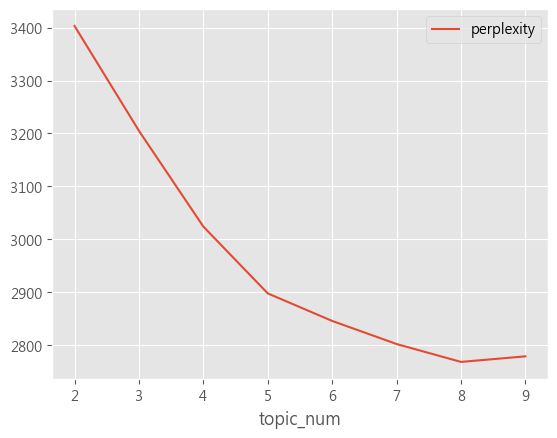

In [127]:
result.plot.line(x='topic_num', y='perplexity')

<Axes: xlabel='topic_num'>

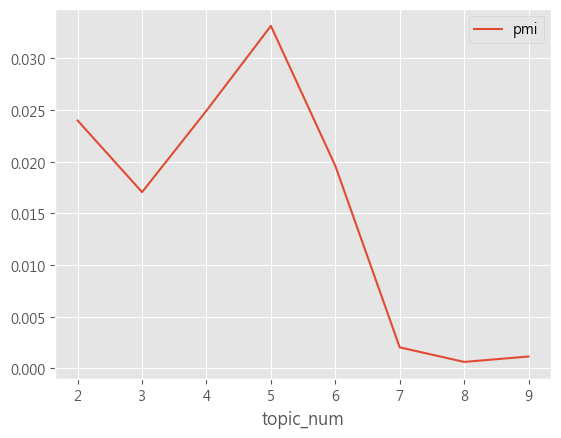

In [128]:
result.plot.line(x='topic_num', y='pmi')

Â∞±Ë®ìÁ∑¥ÁµêÊûú‰æÜÁúãÔºåperplexity ÊúÄ‰Ω≥Âú® 8Ôºåcoherence ÊúÄÈ´òÂâáÊòØ 5

### 3.4 Ë¶ñË¶∫ÂåñÂëàÁèæ

LDAvis ÊòØÊàëÂÄëÁ∂ìÂ∏∏ÊúÉ‰ΩøÁî®ÁöÑË¶ñË¶∫ÂåñÂ∑•ÂÖ∑ÔºåÁõÆÁöÑÁÇ∫Âπ´Âä©ÊàëÂÄëËß£Èáã‰∏ªÈ°åÊ®°Âûã‰∏≠ÔºåÂú®ÊàëÂÄëÂª∫ÊßãÂ•Ω‰∏ªÈ°åÊ®°ÂûãÂæóÂà∞ Œ∏(Êñá‰ª∂ÁöÑ‰∏ªÈ°åÂàÜ‰Ωà) Ë∑ü œÜ(‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà)ÔºåÈÄèÈÅé pyLDAvis Â∞á‰∏ªÈ°åÈôçÁ∂≠Êàê‰∫åÁ∂≠Ôºå‰ª•Á∂≤È†ÅÁöÑÂΩ¢Âºè‰æõÊàëÂÄëÊü•Áúã„ÄÇ

+ ÂúìÂúàÊï∏Èáè‰ª£Ë°®‰∏ªÈ°åÊï∏ÈáèÔºåÊúâÂπæÂÄã‰∏ªÈ°åÂ∞±ÊúÉÊúâÂπæÂÄãÂúìÂúà
+ ÂúìË∂äÂ§ß‰ª£Ë°® document Ë∂äÂ§ß
+ Âè≥ÈÇäÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°åÁöÑÂ≠óÂàÜ‰Ωà
+ Âè≥‰∏äÂπ´Êúâ‰∏ÄÂÄã bar Ë™øÊï¥ lambdaÔºöÁï∂ lambda=1 ‰πüÂ∞±ÊòØ‰ª£Ë°®Êú¨‰æÜÁöÑÂ≠óÂàÜ‰Ωà œÜÔºåÂ∞á lambda Á∏ÆË∂äÂ∞èÂèØ‰ª•ÁúãÂà∞Ë∂äÂîØ‰∏ÄÁöÑÂ≠óÔºåÂ•ΩÁöÑÂàÜ‰ΩàÊòØ œÜ È´ò‰∏îÂîØ‰∏ÄÔºåÂõ†Ê≠§ÊàëÂÄëË¶ÅÂú®ÈÄôÂÖ©ËÄÖÈñìÂèñÂπ≥Ë°°
+ ÂúìÂøÉË∂äÁõ∏ËøëÔºå‰ª£Ë°®‰∏ªÈ°åÊúÉË∂äÁõ∏‰ººÔºõÂèç‰πãÔºåÂúìÂøÉÂàÜË∂äÈñã‰ª£Ë°®‰∏ªÈ°åÊúâÂîØ‰∏ÄÊÄß<br>
  --> ÂÅáË®≠Ë©ûÂΩôÊú¨‰æÜÊúâ 100 Â≠óÔºåÁ∂≠Â∫¶ÊáâË©≤ÊòØ 100ÔºåÂÅáÂ¶ÇÊú¨‰æÜÁ∂≠Â∫¶Êé•Ëøë(Áõ∏Ëøë)ÁöÑË©±ÔºåÈôçÁ∂≠Âæå‰πüÊúÉÊé•Ëøë(Áõ∏Ëøë)

‰ª•‰∏ãÁî®‰∏ªÈ°åÊï∏ 8 ‰æÜÂÅö LDAvis ÁöÑÁµêÊûúÁØÑ‰æã

In [129]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 8,
    id2word=dictionary,
    random_state = 1500,
    iterations=60,
    passes = 8 # Ë®ìÁ∑¥Ê¨°Êï∏
    )

2025-04-20 22:45:57,517 : INFO : using symmetric alpha at 0.125
2025-04-20 22:45:57,519 : INFO : using symmetric eta at 0.125
2025-04-20 22:45:57,522 : INFO : using serial LDA version on this node
2025-04-20 22:45:57,534 : INFO : running online (multi-pass) LDA training, 8 topics, 8 passes over the supplied corpus of 5829 documents, updating model once every 2000 documents, evaluating perplexity every 5829 documents, iterating 60x with a convergence threshold of 0.001000
2025-04-20 22:45:57,535 : INFO : PROGRESS: pass 0, at document #2000/5829
2025-04-20 22:45:58,484 : INFO : merging changes from 2000 documents into a model of 5829 documents
2025-04-20 22:45:58,490 : INFO : topic #4 (0.125): 0.022*"ÁæéÂúã" + 0.015*"ÈóúÁ®Ö" + 0.014*"Â∑ùÊôÆ" + 0.009*"‰∏≠Âúã" + 0.008*"Ë°®Á§∫" + 0.007*"Ê≠êÊ¥≤" + 0.007*"Âè∞ÁÅ£" + 0.007*"ÂÄ´ÊñØÂü∫" + 0.006*"Á∏ΩÁµ±" + 0.005*"ÁÉèÂÖãËò≠"
2025-04-20 22:45:58,491 : INFO : topic #2 (0.125): 0.019*"ÁæéÂúã" + 0.011*"‰∏≠Âúã" + 0.008*"Âè∞ÁÅ£" + 0.008*"Â∑ùÊôÆ" + 0.007*

In [130]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.277874  0.019220       1        1  24.390438
3      0.114812 -0.106658       2        1  14.786492
2     -0.088747 -0.063207       3        1  13.595889
1      0.083687  0.190503       4        1  11.594672
4     -0.132750  0.024683       5        1  11.202484
6      0.107755  0.012150       6        1   8.998962
5      0.074497 -0.160888       7        1   8.601502
7      0.118622  0.084196       8        1   6.829561, topic_info=     Term         Freq        Total Category  logprob  loglift
27     Âè∞ÁÅ£  6619.000000  6619.000000  Default  30.0000  30.0000
89    ÁÉèÂÖãËò≠  7204.000000  7204.000000  Default  29.0000  29.0000
161   ÂÄ´ÊñØÂü∫  5332.000000  5332.000000  Default  28.0000  28.0000
1769   ÈóúÁ®Ö  9999.000000  9999.000000  Default  27.0000  27.0000
1840   Â∏ÇÂ†¥  4583.000000  4583.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
105    Á∏ΩÁµ±   550.302400  7071.261454   Topic8  -5.1526   0.1306
327    Â†±Â∞é   435.207149  3840.593910   Topic8  -5.3873   0.5063
221    ÊîøÂ∫ú   414.759338  4970.201529   Topic8  -5.4354   0.2004
8921  Â∑¥Ëè≤Áâπ   320.145700   697.421808   Topic8  -5.6943   1.9053
1258   ÂÆ£Â∏É   325.039297  2624.994796   Topic8  -5.6791   0.5950

[650 rows x 6 columns], token_table=       Topic      Freq Term
term                       
2409       1  0.001565   ‰∏ÄÂêç
2409       2  0.173720   ‰∏ÄÂêç
2409       3  0.004695   ‰∏ÄÂêç
2409       4  0.530549   ‰∏ÄÂêç
2409       5  0.004695   ‰∏ÄÂêç
...      ...       ...  ...
2615       6  0.007647   ÈªûÂá∫
2615       7  0.002549   ÈªûÂá∫
2615       8  0.010195   ÈªûÂá∫
11008      2  0.994289   ÈªûÈ§ê
7891       2  0.990786   ÈΩäÁàÜ

[1878 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5, 7, 6, 8])

ÂèØ‰ª•ÁúãÂà∞ (2,7)„ÄÅ(6,8)„ÄÅ(3,5) ÂæàÁõ∏ËøëÔºåË©¶Ë©¶ÁúãË∑ë 5 ÂÄã‰∏ªÈ°å

In [131]:
model_5 = LdaModel(
    corpus = corpus,
    num_topics = 5,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # Ë®ìÁ∑¥Ê¨°Êï∏
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_5, corpus, dictionary)
p

2025-04-20 22:46:26,101 : INFO : using symmetric alpha at 0.2
2025-04-20 22:46:26,102 : INFO : using symmetric eta at 0.2
2025-04-20 22:46:26,108 : INFO : using serial LDA version on this node
2025-04-20 22:46:26,119 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 5829 documents, updating model once every 2000 documents, evaluating perplexity every 5829 documents, iterating 50x with a convergence threshold of 0.001000
2025-04-20 22:46:26,121 : INFO : PROGRESS: pass 0, at document #2000/5829
2025-04-20 22:46:26,944 : INFO : merging changes from 2000 documents into a model of 5829 documents
2025-04-20 22:46:26,948 : INFO : topic #0 (0.200): 0.021*"ÁæéÂúã" + 0.016*"Â∑ùÊôÆ" + 0.013*"ÈóúÁ®Ö" + 0.010*"Ë°®Á§∫" + 0.009*"Á∏ΩÁµ±" + 0.008*"ÁÉèÂÖãËò≠" + 0.008*"Âè∞ÁÅ£" + 0.005*"‰øÑÁæÖÊñØ" + 0.005*"‰∏≠Âúã" + 0.005*"ÊîøÂ∫ú"
2025-04-20 22:46:26,950 : INFO : topic #1 (0.200): 0.012*"ÁæéÂúã" + 0.012*"ÁÉèÂÖãËò≠" + 0.012*"Â∑ùÊôÆ" + 0.008*"Ë°®Á§∫" + 0.007*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.239803  0.021604       1        1  27.114493
3      0.151334 -0.082454       2        1  21.642895
1      0.130583  0.129743       3        1  18.735747
2     -0.016879 -0.122306       4        1  17.167140
4     -0.025235  0.053413       5        1  15.339725, topic_info=     Term         Freq        Total Category  logprob  loglift
89    ÁÉèÂÖãËò≠  6911.000000  6911.000000  Default  30.0000  30.0000
27     Âè∞ÁÅ£  6852.000000  6852.000000  Default  29.0000  29.0000
161   ÂÄ´ÊñØÂü∫  5321.000000  5321.000000  Default  28.0000  28.0000
1840   Â∏ÇÂ†¥  4505.000000  4505.000000  Default  27.0000  27.0000
1769   ÈóúÁ®Ö  9704.000000  9704.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
511    Á†îÁ©∂   530.974238  1619.294007   Topic5  -5.9976   0.7597
228    ÊôÇÈñì   502.656697  1527.111382   Topic5  -6.0524   0.7635
105    Á∏ΩÁµ±   636.333131  7152.451359   Topic5  -5.8166  -0.5448
67     ÊåáÂá∫   560.423269  4065.298869   Topic5  -5.9436  -0.1068
2198   ÂçîË≠∞   518.975880  2982.151839   Topic5  -6.0204   0.1262

[476 rows x 6 columns], token_table=      Topic      Freq Term
term                      
8913      2  0.024386   ‰∏ÄÁîü
8913      3  0.013935   ‰∏ÄÁîü
8913      4  0.958041   ‰∏ÄÁîü
6430      1  0.937556   ‰∏äÊº≤
6430      2  0.001039   ‰∏äÊº≤
...     ...       ...  ...
2615      4  0.014626   ÈªûÂá∫
2615      5  0.940941   ÈªûÂá∫
2153      4  0.980007   Èª®Âúò
7891      1  0.006807   ÈΩäÁàÜ
7891      2  0.987051   ÈΩäÁàÜ

[1319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 5])

ÊõøÊèõÊàê 5 ÂÄã‰∏ªÈ°åÊï∏ÂæåÔºåÂèØ‰ª•ÁôºÁèæÊñáÁ´†ÊúâÊõ¥ÊòéÈ°ØÁöÑÂàÜÁæ§ÔºåÂèØ‰ª•Êõ¥Â•ΩÁöÑËßÄÂØüÊñáÊú¨‰∏≠ÁöÑË≥áË®äÔºÅ<br>
ÈÄèÈÅé‰∫∫Â∑•Âà§ÂÆöÔºåÊü•Áúã‰∏çÂêå‰∏ªÈ°åË£°Èù¢Ë©ûÂΩô‰ª£Ë°®ÁöÑ‰∏ªÈ°åÈ°ûÂà•ÔºÅ

* ‰∏ªÈ°å1Ôºö‰∏ªË¶ÅËàáÁî¢Á∂ìÁõ∏ÈóúÁöÑ‰∏ªÈ°åÔºåÂÉèÊòØËÇ°Â∏ÇÊäïË≥á„ÄÅË≤°Á∂ìÂàÜÊûêÂíåÈáëËûç‰∫§Êòì
* ‰∏ªÈ°å2Ôºö‰∏ªË¶ÅËàá‰øÑÁÉèÊà∞Áà≠„ÄÅÂúãÈöõÁõ∏Èóú
* ‰∏ªÈ°å3Ôºö‰∏ªË¶ÅËàáÁ§æÊúÉ‰∫ã‰ª∂„ÄÅÂÖ¨ÂÖ±ÂÆâÂÖ®Áõ∏Èóú
* ‰∏ªÈ°å4Ôºö‰∏ªË¶ÅËàáÁßëÊäÄÁî¢Ê•≠„ÄÅÊô∂ÁâáË≠∞È°åÁõ∏Èóú
* ‰∏ªÈ°å5Ôºö‰∏ªË¶ÅËàáË≤øÊòìÊîøÁ≠ñ„ÄÅÈóúÁ®ÖË°ùÁ™ÅËàá‰∏≠ÁæéÁ∂ìÊøüÊë©Êì¶Áõ∏Èóú

ÊàëÂÄëÂèØ‰ª•ÈÄèÈÅéÂÖ©ÂÄãÊåáÊ®ôÂéªÂÅöÁÇ∫ÈÅ∏Êìá‰∏ªÈ°åÊï∏ÁöÑÂèÉËÄÉÔºå‰ΩÜ‰∏ç‰∏ÄÂÆöÊòØÊúÄ‰Ω≥Ëß£ÔºåÈÇÑÊòØÂèØ‰ª•ÈÄèÈÅé‰∫∫Â∑•ÂéªÂà§Êñ∑

### 3.5 GuidedLDA

- ÂéüÂßãÂ•ó‰ª∂: <https://github.com/vi3k6i5/GuidedLDA>  
- 31lab ÂÆ∂Èäò‰øÆÊîπÁâàÊú¨: <https://github.com/Text-Analytics-and-Retrieval/GuidedLDA>

ÂÆâË£ùÊñπÂºè:  
`pip install git+https://github.com/Text-Analytics-and-Retrieval/GuidedLDA.git#egg=GuidedLDA`  
Á∂ìÊ∏¨Ë©¶ÔºåÂú® `python3.7~3.11.0` ÂèØÊ≠£Â∏∏Âü∑Ë°å

In [132]:
import guidedlda

In [133]:
word2id = dictionary.token2id

ÂÆöÁæ©‰∫Ü‰ª•‰∏ã 4 ÂÄã‰∏ªÈ°åÁöÑÁ®ÆÂ≠êÂ≠óÔºåËóâÁî±Áµ¶ÂÆöÊØèÂÄã‰∏ªÈ°å‰∏Ä‰∫õÈóúÈçµÂ≠óÔºåÂéªÂΩ±Èüø‰∏ªÈ°åÊ®°ÂûãÁîüÊàêÁöÑÁµêÊûúÔºÅ

In [134]:
seed_topic_list = [
    ["Âè∞Á©çÈõª", "Êô∂Áâá", "Âêà‰Ωú", "Ë£ΩÊàê", "ÂçäÂ∞éÈ´î", "‰æõÊáâÈèà", "ÊîøÁ≠ñ"],                     
    ["Â∏ÇÂ†¥", "ÊäïË≥á", "Á∂ìÊøü", "ÊåáÊï∏", "Âè∞ËÇ°", "ËÇ°ÂÉπ"],                                 
    ["‰øÑÁæÖÊñØ", "ÂÄ´ÊñØÂü∫", "ÂçîË≠∞", "ÂÅúÁÅ´", "ÁÉèÂÖãËò≠", "Êà∞Áà≠", "Ë°ùÁ™Å"],                     
    ["ÈóúÁ®Ö", "ÈÄ≤Âè£", "ÂæµÊî∂", "ÊñΩÂ£ì", "Ë≤øÊòì", "ÈãºÈãÅ", "ËÉΩÊ∫ê", "Á∂ìÊøüÈÉ®"],                                   
]

In [135]:
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

In [136]:
# guidedlda ÈúÄË¶Å DTM Ê†ºÂºè‰ΩúÁÇ∫ inputÔºåÂõ†Ê≠§ÈÄôÈÇäÂà©Áî® corpus2dense() ÊñπÊ≥ïÈÄ≤Ë°åËΩâÊèõ
X = corpus2dense(corpus, len(dictionary), len(corpus)).T.astype(np.int64)

In [137]:
model = guidedlda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)
model.fit(X, seed_topics=seed_topics, seed_confidence=1)

2025-04-20 22:46:44,901 : INFO : n_documents: 5829
2025-04-20 22:46:44,902 : INFO : vocab_size: 17163
2025-04-20 22:46:44,902 : INFO : n_words: 1393042
2025-04-20 22:46:44,903 : INFO : n_topics: 5
2025-04-20 22:46:44,903 : INFO : n_iter: 100
2025-04-20 22:46:48,873 : INFO : <0> log likelihood: -14110183
2025-04-20 22:46:49,818 : INFO : <20> log likelihood: -11667080
2025-04-20 22:46:50,718 : INFO : <40> log likelihood: -11612651
2025-04-20 22:46:51,630 : INFO : <60> log likelihood: -11593794
2025-04-20 22:46:52,519 : INFO : <80> log likelihood: -11584978
2025-04-20 22:46:53,426 : INFO : <99> log likelihood: -11579037


In [138]:
vocab = tuple(dictionary.token2id.keys())

In [139]:
# Êï¥ÁêÜÔºèÈ°ØÁ§∫‰∏ªÈ°åÊ®°ÂûãÁµêÊûú
n_top_words = 10
topic_word = model.topic_word_

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][: -(n_top_words + 1) : -1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))
    

doc_topic = model.doc_topic_ # Êñá‰ª∂-‰∏ªÈ°å ÂàÜ‰Ωà
term_freq = tuple(dictionary.cfs.values()) # ÊØèÂÄãË©ûÂú®Êï¥ÂÄãË™ûÊñô‰∏≠Âá∫ÁèæÁöÑÁ∏ΩÊ¨°Êï∏
doc_len = [sum(v for k, v in doc) for doc in corpus] # ÊØèÁØáÊñáÁ´†ÁöÑÈï∑Â∫¶

## LDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.prepare(topic_word, doc_topic, doc_len, vocab = vocab, term_frequency = term_freq)
p

Topic 0: ÁæéÂúã Âè∞ÁÅ£ ÊäïË≥á ‰∏≠Âúã Êô∂Áâá Ë°®Á§∫ Âè∞Á©çÈõª ÊîøÂ∫ú Â∑ùÊôÆ Áî¢Ê•≠
Topic 1: Â∏ÇÂ†¥ ÁæéÂúã ÈóúÁ®Ö Á∂ìÊøü ÊåáÊï∏ ÊäïË≥á ÊàêÈï∑ ‰ªäÂπ¥ È†êÊúü Â∑ùÊôÆ
Topic 2: ÁÉèÂÖãËò≠ ÁæéÂúã Â∑ùÊôÆ ÂÄ´ÊñØÂü∫ Á∏ΩÁµ± ‰øÑÁæÖÊñØ Ê≠êÊ¥≤ Ë°®Á§∫ ÂçîË≠∞ Êà∞Áà≠
Topic 3: ÈóúÁ®Ö ÁæéÂúã Â∑ùÊôÆ ‰∏≠Âúã Âä†ÊãøÂ§ß Ë°®Á§∫ Â§ßÈô∏ Ê≠êÁõü ÂÆ£Â∏É Á∏ΩÁµ±
Topic 4: Â∑ùÊôÆ ÁæéÂúã Ë°®Á§∫ Â†±Â∞é Â∞àÂÆ∂ ÊîøÂ∫ú ËÅØÈÇ¶ È¶¨ÊñØÂÖã Êó•Êú¨ Á†îÁ©∂


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.167508  0.128421       1        1  23.264577
4      0.150267 -0.225413       2        1  22.124181
1     -0.282560 -0.046518       3        1  21.977878
0     -0.061453  0.051874       4        1  18.441516
3      0.026238  0.091636       5        1  14.191848, topic_info=     Term          Freq         Total Category  logprob  loglift
89    ÁÉèÂÖãËò≠   7933.000000   7933.000000  Default  30.0000  30.0000
1769   ÈóúÁ®Ö  10344.000000  10344.000000  Default  29.0000  29.0000
27     Âè∞ÁÅ£   6573.000000   6573.000000  Default  28.0000  28.0000
161   ÂÄ´ÊñØÂü∫   5896.000000   5896.000000  Default  27.0000  27.0000
1840   Â∏ÇÂ†¥   4689.000000   4689.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
230    ÊõùÂÖâ    700.456494   2036.735793   Topic5  -5.6428   0.8851
33     ÂúãÂÆ∂    851.337267   4273.363735   Topic5  -5.4477   0.3392
105    Á∏ΩÁµ±    913.288313   7130.749340   Topic5  -5.3774  -0.1026
327    Â†±Â∞é    710.448598   3874.674505   Topic5  -5.6286   0.2562
221    ÊîøÂ∫ú    673.477813   4689.087199   Topic5  -5.6820   0.0120

[391 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6430      3  0.989635    ‰∏äÊº≤
6430      5  0.009996    ‰∏äÊº≤
3682      1  1.000349    ‰∏äÁï∂
1831      3  0.999770    ‰∏ãË∑å
9352      1  1.000345  ‰∏ãÈÄêÂÆ¢‰ª§
...     ...       ...   ...
2927      3  0.006937   È¶¨ÊñØÂÖã
2927      5  0.219331   È¶¨ÊñØÂÖã
8948      2  1.000446  È´òÈÄüÂÖ¨Ë∑Ø
5328      4  1.000511   È≠èÂì≤ÂÆ∂
2184      1  1.000427    È≠ØÊØî

[738 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])

‰∏äËø∞‰∏ªÈ°å 2 È°ûÊúâ‰∫õË©ûÁ®çÂæÆ‰∏çÊòéÁ¢∫ÔºåÂõ†Ê≠§‰øÆÊîπ‰∏ªÈ°åÁ®ÆÂ≠êÂ≠óÔºåËÅöÁÑ¶Â∑ùÊôÆÁöÑÂÖ¨ÈñãÁôºË®Ä„ÄÅÁßªÊ∞ëÊîøÁ≠ñ„ÄÅÁôΩÂÆÆÁ´ãÂ†¥„ÄÅÂ™íÈ´îË©ïË´ñÁ≠âÊîøÊ≤ªÁõ∏ÈóúÔºå
‰∏ªÈ°å 4 Ë∑ü 5 ÂèØËÉΩÊúâ‰∫õÈáçÁñäÔºå‰πüÊñ∞Â¢û‰∏Ä‰∫õÁ®ÆÂ≠êÂ≠óÔºåËÆì‰ªñÁ®çÂæÆÊòéÁ¢∫‰∏ÄÈªû„ÄÇ

In [140]:
seed_topic_list = [
    ["Â∏ÇÂ†¥", "ÊäïË≥á", "Á∂ìÊøü", "ÊåáÊï∏", "Âè∞ËÇ°", "ËÇ°ÂÉπ", "È†êÊúü", "Ê≥ï‰∫∫", "Ë≥áÈáë", "Âà©Áéá"],
    ["Âè∞Á©çÈõª", "Êô∂Áâá", "ÂçäÂ∞éÈ´î", "Ë£ΩÁ®ã", "‰æõÊáâÈèà", "Ë®≠Âª†", "ÊäÄË°ì", "ÁîüÁî¢", "Áî¢Ê•≠", "Ë£ΩÈÄ†"],
    ["‰øÑÁæÖÊñØ", "ÁÉèÂÖãËò≠", "ÂÄ´ÊñØÂü∫", "ÊôÆ‰∫≠", "Êà∞Áà≠", "ÂÅúÁÅ´", "ÂçîË≠∞", "Ê≠êÁõü", "ÂÆâÂÖ®", "ËªçÊè¥"],
    ["ÈóúÁ®Ö", "ÂæµÊî∂", "ÈÄ≤Âè£", "Ë≤øÊòì","Êé™ÊñΩ","Âä†Âæµ", "ÈãºÈãÅ", "Á¶Å‰ª§", "Âà∂Ë£Å", "Â†±Âæ©", "Âá∫Âè£", "ÂçîÂïÜ"],
    ["Á∏ΩÁµ±", "ÁôΩÂÆÆ", "ÁôºË®Ä", "Â™íÈ´î", "ÊîøÂ∫ú", "Ë°®ÊÖã", "ËÅØÈÇ¶", "Ë®òËÄÖÊúÉ", "ÁßªÊ∞ë"] # ÂÇæÂêëÊîøÊ≤ªÁõ∏Èóú
]
    
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

In [141]:
model = guidedlda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)
model.fit(X, seed_topics=seed_topics, seed_confidence=1)

2025-04-20 22:46:53,911 : INFO : n_documents: 5829
2025-04-20 22:46:53,912 : INFO : vocab_size: 17163
2025-04-20 22:46:53,913 : INFO : n_words: 1393042
2025-04-20 22:46:53,913 : INFO : n_topics: 5
2025-04-20 22:46:53,914 : INFO : n_iter: 100
2025-04-20 22:46:57,926 : INFO : <0> log likelihood: -14048714
2025-04-20 22:46:58,868 : INFO : <20> log likelihood: -11672843
2025-04-20 22:46:59,825 : INFO : <40> log likelihood: -11613887
2025-04-20 22:47:01,098 : INFO : <60> log likelihood: -11594431
2025-04-20 22:47:02,279 : INFO : <80> log likelihood: -11584171
2025-04-20 22:47:03,326 : INFO : <99> log likelihood: -11578846


In [142]:
n_top_words = 10
topic_word = model.topic_word_

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][: -(n_top_words + 1) : -1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))
    

doc_topic = model.doc_topic_
term_freq = tuple(dictionary.cfs.values())
doc_len = [sum(v for k, v in doc) for doc in corpus]

## LDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.prepare(topic_word, doc_topic, doc_len, vocab = vocab, term_frequency = term_freq)
p

Topic 0: Â∏ÇÂ†¥ ÁæéÂúã ÈóúÁ®Ö Á∂ìÊøü ÊåáÊï∏ ÊàêÈï∑ ÊäïË≥á È†êÊúü ‰ªäÂπ¥ Â∑ùÊôÆ
Topic 1: ÁæéÂúã Âè∞ÁÅ£ ÊäïË≥á ‰∏≠Âúã Ë°®Á§∫ Êô∂Áâá Âè∞Á©çÈõª ÊîøÂ∫ú Áî¢Ê•≠ Â∑ùÊôÆ
Topic 2: ÁÉèÂÖãËò≠ ÁæéÂúã Â∑ùÊôÆ ÂÄ´ÊñØÂü∫ Á∏ΩÁµ± Ê≠êÊ¥≤ ‰øÑÁæÖÊñØ Ë°®Á§∫ ÂçîË≠∞ Êà∞Áà≠
Topic 3: ÈóúÁ®Ö ÁæéÂúã Â∑ùÊôÆ Âä†ÊãøÂ§ß Ë°®Á§∫ ‰∏≠Âúã Â§ßÈô∏ Á∏ΩÁµ± ÂÆ£Â∏É Ê≠êÁõü
Topic 4: Â∑ùÊôÆ ÁæéÂúã Ë°®Á§∫ Â†±Â∞é ÊîøÂ∫ú Â∞àÂÆ∂ ËÅØÈÇ¶ È¶¨ÊñØÂÖã Âæ∑Âúã Á†îÁ©∂


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.172909  0.136800       1        1  22.955444
4     -0.139212 -0.226873       2        1  22.484867
0      0.283545 -0.038397       3        1  20.666194
1      0.084244  0.072254       4        1  17.988099
3     -0.055668  0.056216       5        1  15.905396, topic_info=     Term          Freq         Total Category  logprob  loglift
89    ÁÉèÂÖãËò≠   7933.000000   7933.000000  Default  30.0000  30.0000
27     Âè∞ÁÅ£   6573.000000   6573.000000  Default  29.0000  29.0000
1769   ÈóúÁ®Ö  10345.000000  10345.000000  Default  28.0000  28.0000
161   ÂÄ´ÊñØÂü∫   5896.000000   5896.000000  Default  27.0000  27.0000
1840   Â∏ÇÂ†¥   4689.000000   4689.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
230    ÊõùÂÖâ    669.521133   2036.786144   Topic5  -5.8019   0.7259
221    ÊîøÂ∫ú    776.443062   4689.108145   Topic5  -5.6538   0.0402
217    Êé•Âèó    630.549589   1637.011710   Topic5  -5.8619   0.8845
77     Êó•Êú¨    640.542293   2326.569926   Topic5  -5.8462   0.5487
348    ÂΩ±Èüø    617.559075   3142.053572   Topic5  -5.8827   0.2117

[389 rows x 6 columns], token_table=      Topic      Freq Term
term                      
6430      2  0.002726   ‰∏äÊº≤
6430      3  0.990566   ‰∏äÊº≤
6430      5  0.006361   ‰∏äÊº≤
3682      1  1.000355   ‰∏äÁï∂
1831      3  0.999794   ‰∏ãË∑å
...     ...       ...  ...
2896      4  1.000178  È´òÁßëÊäÄ
5328      4  1.000520  È≠èÂì≤ÂÆ∂
2184      1  1.000433   È≠ØÊØî
2615      2  0.989225   ÈªûÂá∫
2615      3  0.011241   ÈªûÂá∫

[735 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

ÂèØ‰ª•ÊØîËºÉÊòéÁ¢∫ÂàáÂàÜÂá∫ÊØèÂÄã‰∏ªÈ°åÈ°ûÂà•ÂèäÂÖ∂Â≠óË©û„ÄÇ

### 3.6 ‰∏ªÈ°åÂàÜ‰ΩàÁöÑÊáâÁî®ÔºåÊê≠ÈÖçÂÖ∂‰ªñÊñáÁ´†Ë≥áË®ä
Ë®ìÁ∑¥ÂÆå LDA Ê®°ÂûãÂæåÔºåÊàëÂÄëÂèØ‰ª•ÂòóË©¶Â∞áË®ìÁ∑¥Â•ΩÁöÑÊ®°ÂûãÊáâÁî®ÊñºË≥áÊñôÈõÜ‰∏äÔºåËßÄÂØüÊØèÂ§©‰∏ªÈ°åÊñáÁ´†ÁöÑ‰ΩîÊØîËÆäÂåñ

In [143]:
# ÂèñÂæóÊØèÊ¢ùÊñ∞ËÅûÁöÑ‰∏ªÈ°åÂàÜ‰Ωà
topics_doc = model_5.get_document_topics(corpus)

In [144]:
topics_doc[100]

[(2, 0.9967046)]

Â∞á LDA Ê®°ÂûãÊé®Ë´ñÂæåÁöÑÊØèÁØáÊñá‰ª∂ÁöÑ‰∏ªÈ°åÂàÜÂ∏ÉÔºà‰πüÂ∞±ÊòØ ùúÉÔºâËΩâÊèõÊàê‰∏ÄÂÄã NumPy Áü©Èô£ÔºàarrayÔºâ

In [145]:
# Êää gensim ÁöÑÁ®ÄÁñèË°®Á§∫Ê≥ïËΩâÊàêÁ®ÄÁñèÁü©Èô£
m_theta = corpus2csc(topics_doc).T.toarray() # ÂÄíÁΩÆËÆìshapeËÆäÁÇ∫(num_docs, num_topics)
m_theta

array([[0.        , 0.        , 0.84784627, 0.14938195, 0.        ],
       [0.        , 0.        , 0.80426753, 0.19340417, 0.        ],
       [0.        , 0.13817626, 0.80143297, 0.02851727, 0.03117562],
       ...,
       [0.99560893, 0.        , 0.        , 0.        , 0.        ],
       [0.99488354, 0.        , 0.        , 0.        , 0.        ],
       [0.93049484, 0.        , 0.        , 0.06590772, 0.        ]])

In [146]:
# Â∞á‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏ÉËΩâÊèõÊàê‰∏ªÈ°åÊ®ôÁ±§
udn['topic_label'] = m_theta.argmax(axis=1) + 1

#### Áµ±Ë®àÂêÑÂÄã‰∏ªÈ°åÁöÑÊï∏Èáè

In [147]:
udn['topic_label'].value_counts()

topic_label
1    1599
4    1236
2    1156
3     927
5     911
Name: count, dtype: int64

In [148]:
udn.head()

content  \
0  ÁæéÂúãÊµ∑ËªçÈÄÄÂΩπÂ∞ëÂ∞áËíôÂì•È¶¨Âà©‰ªäÂ§©Ë°®Á§∫Áî±ÊñºÁæéÂè∞ÂÖ©ËªçÁèæÂú®Ê≤íÊúâÂÖÖÂàÜÁöÑÊï¥ÂêàËàáÂçîË™øÁõÆÂâçÁæéÂè∞ÁöÑËÅØÂêàÊà∞ÂäõÊúâÂ¶ÇÈõô...   
1  Ë≥¥Ê∏ÖÂæ∑Á∏ΩÁµ±Êó•ÂâçËàâË°åÂúãÂÆâÈ´òÂ±§ÊúÉË≠∞ÊúÉÂæåË°®Á§∫Â∞áÂÑ™ÂÖàÁ∑®ÂàóÁâπÂà•È†êÁÆóËÆìÂúãÈò≤È†êÁÆóÈÅîÂà∞‰ª•‰∏äÂúãÊ∞ëÈª®Á´ãÂßîÈªÉ‰ªÅ‰ªäÂ§©...   
2  ÂúãÈò≤ÈÉ®Èï∑È°ßÁ´ãÈõÑË¶ñÂ∞éÊº¢ÂÖâÊºîÁøíÂúñ‰∏äÂÖµÊé®ÂçªË¢´ÁôºÁèæË∫´ÊóÅÂ∫ß‰ΩçÂá∫ÁèæÁæéÂúãÂç∞Â§™Âè∏‰ª§ÈÉ®ËÅØ‰∫îÂ∞ëÂ∞áÁöÑÂêçÁâåÂúãÈò≤Èô¢Êà∞Áï•...   
3  Ë∑ØÈÄèÁ§æÂ†±Â∞éÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÊîøÂ∫úÈáãÂá∫ÂÖàÂâçÂáçÁµêÁöÑÂÑÑÁæéÂÖÉÂ§ñ‰∫§Êè¥Âä©ÂåÖÊã¨Áî®ÊñºÂè∞ÁÅ£Ë®àÁï´ÁöÑÂÑÑÁæéÂÖÉÂ≠∏ËÄÖÂàÜÊûêÂ∑ùÊôÆÊîø...   
4  ÂÖ©ÂêçÁæéÂúãÂ≠∏ËÄÖ‰ªäÂ§©ÁôºË°®Â∞àÊñáÂª∫Ë≠∞ÁæéÂúãÁ∏ΩÁµ±Â∑ùÊôÆÂ∞áÂ∞çÂè∞ÁÅ£ÁöÑËªç‰∫ãÊè¥Âä©ËàáÂè∞ÁÅ£ÁöÑÂúãÈò≤ÊîØÂá∫ÂèäÊîπÈù©ÊéõÈâ§ËÆìÂè∞ÁÅ£Âª∫...   

                                     artUrl artCatagory             artDate  \
0  https://udn.com/news/story/10930/8563859          Ë¶ÅËÅû 2025-02-21 21:58:00   
1  https://udn.com/news/story/10930/8565217          Ë¶ÅËÅû 2025-02-22 18:51:00   
2  https://udn.com/news/story/10930/8565244          Ë¶ÅËÅû 2025-02-22 19:33:00   
3  https://udn.com/news/story/10930/8565329          Ë¶ÅËÅû 2025-02-22 21:05:00   
4  https://udn.com/news/story/10930/8571966          Ë¶ÅËÅû 2025-02-26 09:02:00   

                                               words  topic_label  
0  [ÁæéÂúã, Êµ∑Ëªç, ÈÄÄÂΩπ, Â∞ëÂ∞á, ËíôÂì•È¶¨Âà©, ‰ªäÂ§©, Ë°®Á§∫, ÁæéÂè∞, ÁèæÂú®, Êï¥Âêà, ÂçîË™ø,...            3  
1  [Ë≥¥Ê∏ÖÂæ∑, Á∏ΩÁµ±, Êó•Ââç, ËàâË°å, ÂúãÂÆâ, È´òÂ±§, ÊúÉË≠∞, ÊúÉÂæå, Ë°®Á§∫, ÂÑ™ÂÖà, Á∑®Âàó, ...            3  
2  [ÂúãÈò≤ÈÉ®Èï∑, È°ßÁ´ã, ÈõÑË¶ñ, Êº¢ÂÖâ, ÊºîÁøí, Âúñ‰∏ä, Êé®Âçª, ÁôºÁèæ, Ë∫´ÊóÅ, Â∫ß‰Ωç, Âá∫Áèæ,...            3  
3  [Ë∑ØÈÄèÁ§æ, Â†±Â∞é, ÁæéÂúã, Á∏ΩÁµ±, Â∑ùÊôÆ, ÊîøÂ∫ú, ÈáãÂá∫, ÂÖàÂâç, ÂáçÁµê, ÂÑÑÁæéÂÖÉ, Â§ñ‰∫§,...            3  
4  [ÂÖ©Âêç, ÁæéÂúã, Â≠∏ËÄÖ, ‰ªäÂ§©, ÁôºË°®, Â∞àÊñá, Âª∫Ë≠∞, ÁæéÂúã, Á∏ΩÁµ±, Â∑ùÊôÆÂ∞á, Âè∞ÁÅ£, ...            3

In [149]:
date_topic = udn.groupby(udn['artDate'].dt.date)['topic_label'].value_counts(normalize=True).unstack()
date_topic.head()

topic_label         1         2         3         4         5
artDate                                                      
2025-02-20   0.340000  0.124000  0.044000  0.388000  0.104000
2025-02-21   0.290323  0.078341  0.073733  0.552995  0.004608
2025-02-22   0.131148  0.090164  0.098361  0.254098  0.426230
2025-02-23   0.169811  0.069182  0.069182  0.125786  0.566038
2025-02-24   0.229358  0.064220  0.041284  0.142202  0.522936

#### Ë¶ñË¶∫ÂåñÂëàÁèæ‰∏ªÈ°åÊñáÁ´†Ë∂®Âã¢ËÆäÂåñ

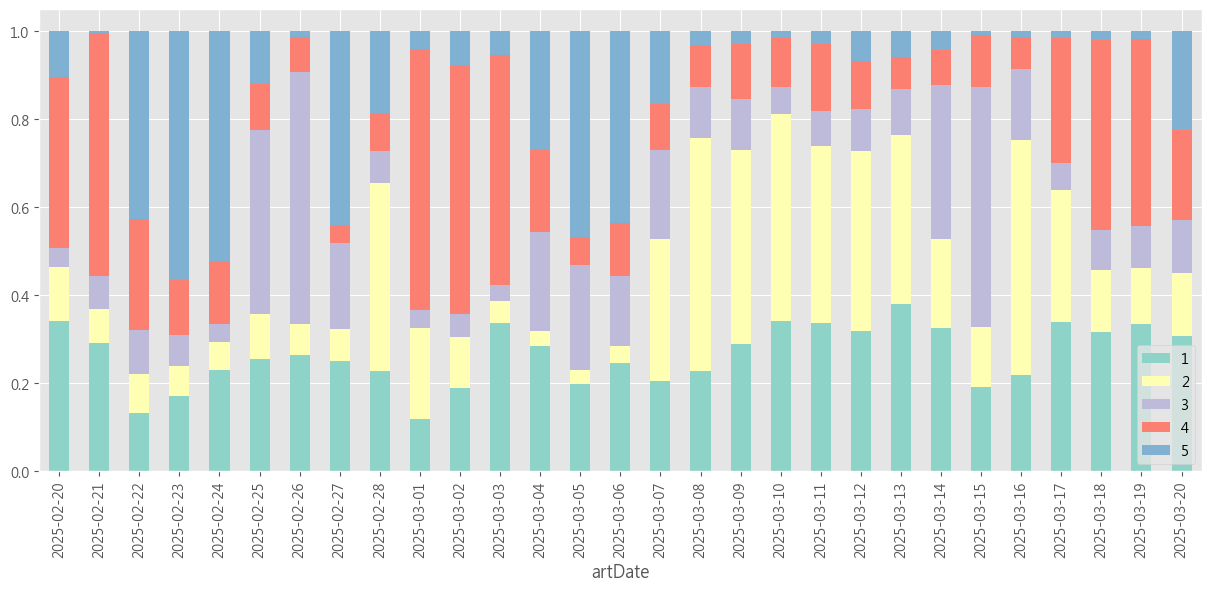

In [150]:
fig, ax = plt.subplots(figsize=(15, 6))
date_topic.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)
ax.legend(loc='lower right')

ÂèØ‰ª•ÁúãÂà∞‰∏ªÈ°å 2Ôºà‰øÑÁÉèÊà∞Áà≠„ÄÅÂúãÈöõÂÆâÂÖ®ËàáÂ§ñ‰∫§ÊîøÁ≠ñÔºâÊòéÈ°ØÈõÜ‰∏≠Âá∫ÁèæÂú® 3/7‚Äì3/13 ÔºåÂú®ÈÄô‰πãÈñìË®éË´ñÁöÑÊØî‰æãÈ´òÊñºÂÖ∂‰ªñ‰∏ªÈ°åÔºå<br>
ÂèØËÉΩËàáË©≤ÊúüÈñìÊúâÈóúÁÉè‰øÑÊà∞Áà≠ËÆäÂåñÊàñÂ§ñ‰∫§ÊúÉË´áÁöÑÊñ∞ËÅûÂ†±Â∞éÈõÜ‰∏≠ÊúâÈóúÔºåÂèçÊò†‰∫ÜÁõÆÂâçÂúãÈöõ‰∏äÁöÑÂÆâÂÖ®ÂíåÊîøÊ≤ªË≠∞È°åÔºå<br>
‰∏ªÈ°å 1ÔºàËÇ°Â∏ÇÈúáÁõ™ÔºâÂú®Êï¥È´îÊôÇÈñìÁØÑÂúç‰∏≠ÁöÜÁ©©ÂÆöÂá∫ÁèæÔºåÂèçÊò†Âá∫ÈáëËûçÂ∏ÇÂ†¥ËàáÁ∂ìÊøüÁõ∏ÈóúË≠∞È°åÊòØÂ™íÈ´îÊåÅÁ∫åÈóúÊ≥®ÁöÑÁÑ¶ÈªûÔºå<br>
‰∏¶Ëàá‰∏ªÈ°å 2 Âú®ÊôÇÂ∫è‰∏äÁî¢ÁîüÈáçÁñäÔºà3/7-3/13ÊúâÁ®çÂæÆ‰∏äÂçáÔºâÔºåÂèØËÉΩÂèçÊò†Âá∫Êà∞Áà≠ÊÉÖÂã¢Â∞çÂ∏ÇÂ†¥ÂãïÁõ™ÁöÑÈÄ£ÂãïÂΩ±Èüø„ÄÇ<br>